# Covid-19 Study: Strategy Analysis for Brazil

# Introduction

## Names: Anah Veronica, Shivani GB, Meghana Sarikonda, Prasanna DK

Video link: http://bit.ly/covid-strategy-analysis

Ppt link: http://bit.ly/covid-strategy-brazil-slides

## Problem Statement

Brazil is the most populous country in South America. We are given charge of the country's Public Health Ministry on 20th January 2020. One of the most pressing issues of the current time is COVID-19. Your main aim is to make policies that will save as many lives as possible. Every day you will have to justify to the national congress, your approach, and the number of lives you saved that day. 
One of the main advantages you have is the ability to look into the future, however, everything has its limit. You have access to the future of only the following countries:

•	India 

•	South Korea

•	Italy 

The goal of the project is to demonstrate how to use all the knowledge you have acquired during the course in a real-world setting. You are provided with the dataset that will serve as a start point to analyse the problem.


## Approach to solve the Problem

We are tasked with the job to save as many lives from covid19 virus. To do this, we first need to figure out the strategies used by other countries and analyse how good their solutions were. The information that we care about before we validate a strategy are:

•	Number of new cases per day (rise or fall?)

•	Number of deaths per day (rise or fall?)

•	Death rate - ratio of death to new positive cases (do we see a decrease?)

•	Decrease rate of covid19 cases (How fast could each country contain the spread of the virus)


•	 **Number of new cases per day**: To identify and capture the relationship between each country’s strategy and the number of cases recorded, we use a polynomial regression model. We begin by training the data on each country by using number of days as predictor and number of cases as response. We then use this model to predict on brazil data to identify if the is a decrease in the number of daily cases recorded. If there is a decrease, we take it into account as a potential solution.

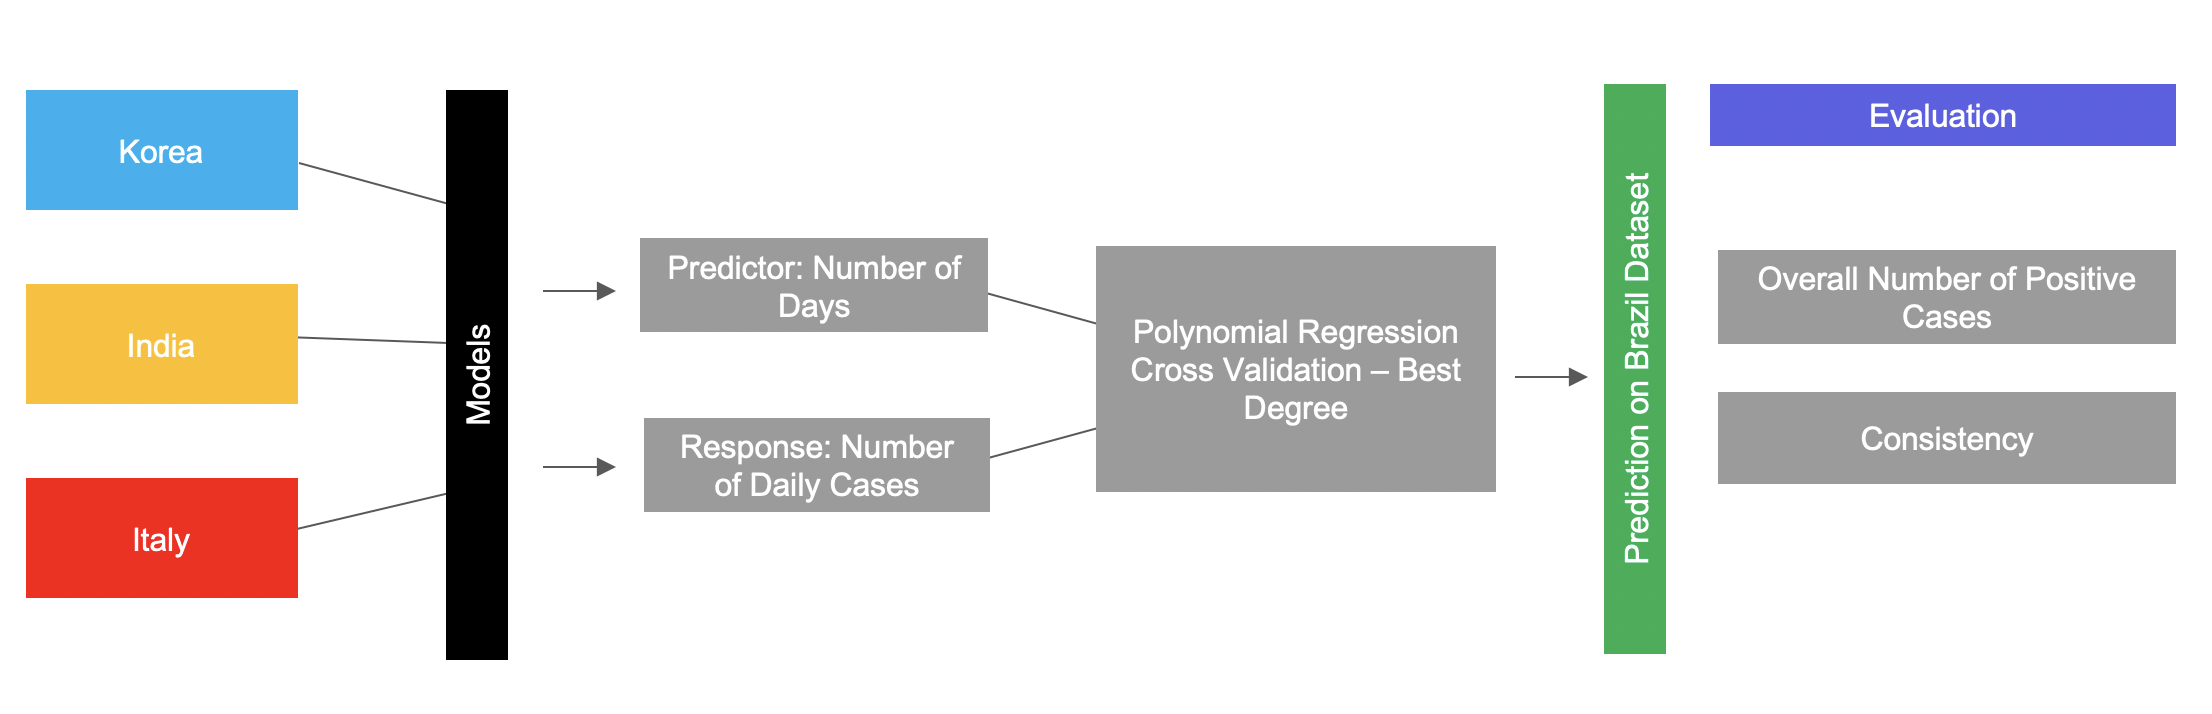



•	**Number of new deaths per day**: Brazil is keenly intent on saving as many lives as possible. So, the strategy that saves maximum lives for Brazil takes the cake. We continue and do the same thing we did for number of days. We model a polynomial regression function to capture the relationship of each country and predict of Brazil. We then identify the number of lives we save using each strategy and find out which saves the most.
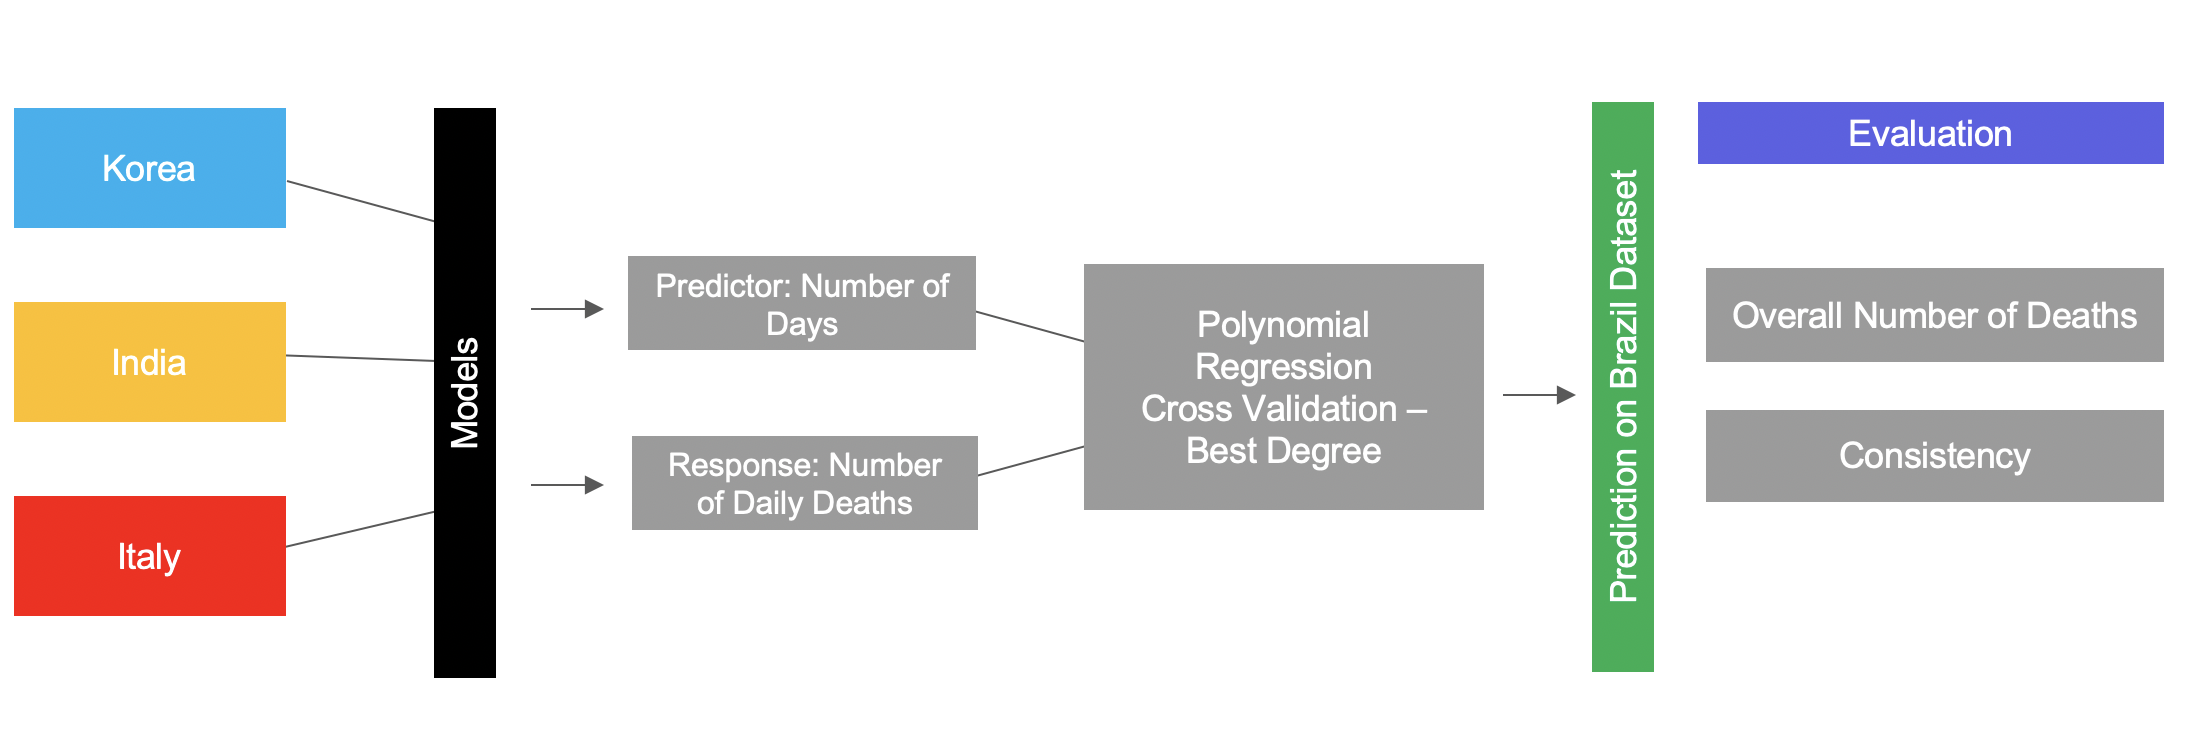

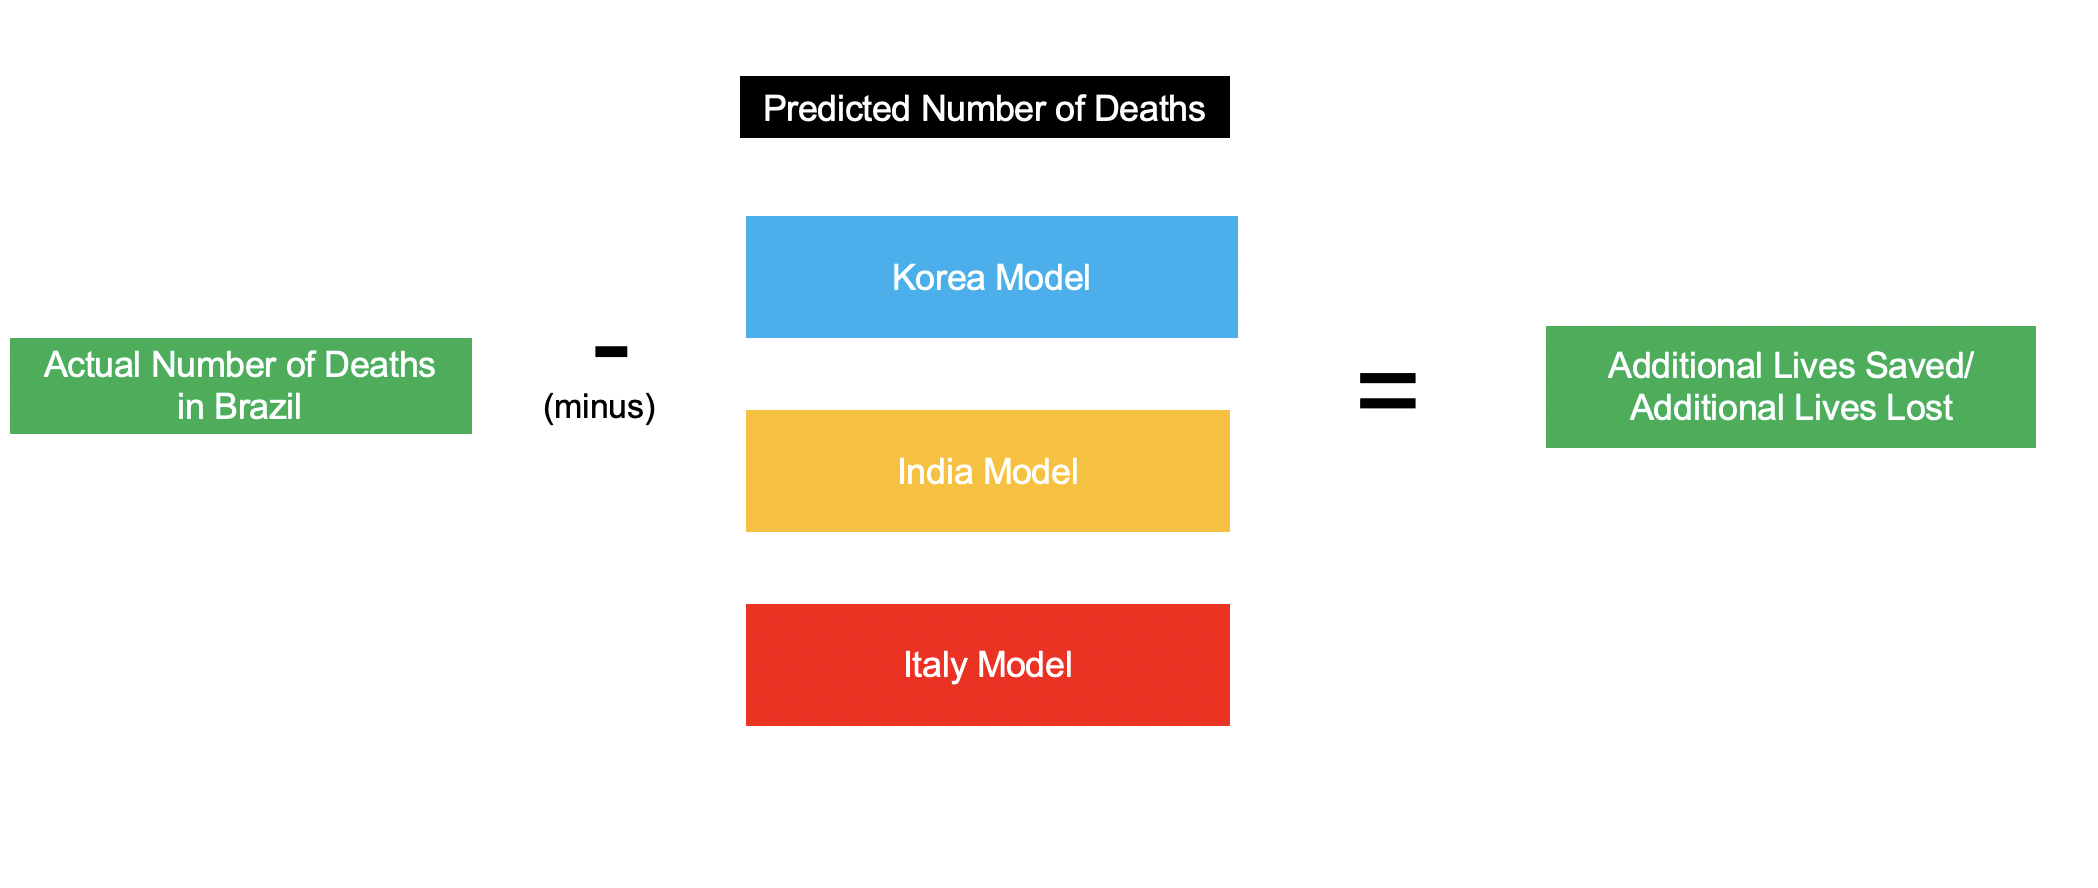


•	**Death rate**: Death rate and Decrease rate of covid19 cases are two additional information we choose to analyse to help us understand which strategy not only works but is more consistent with time. Death rate is the ratio of the number of deaths / numbers of positive cases. In spite of the soaring number of positive cases, I want to further look into what percentage of people had a severe condition and lost their lives. We really care about a decrease in the death rate.
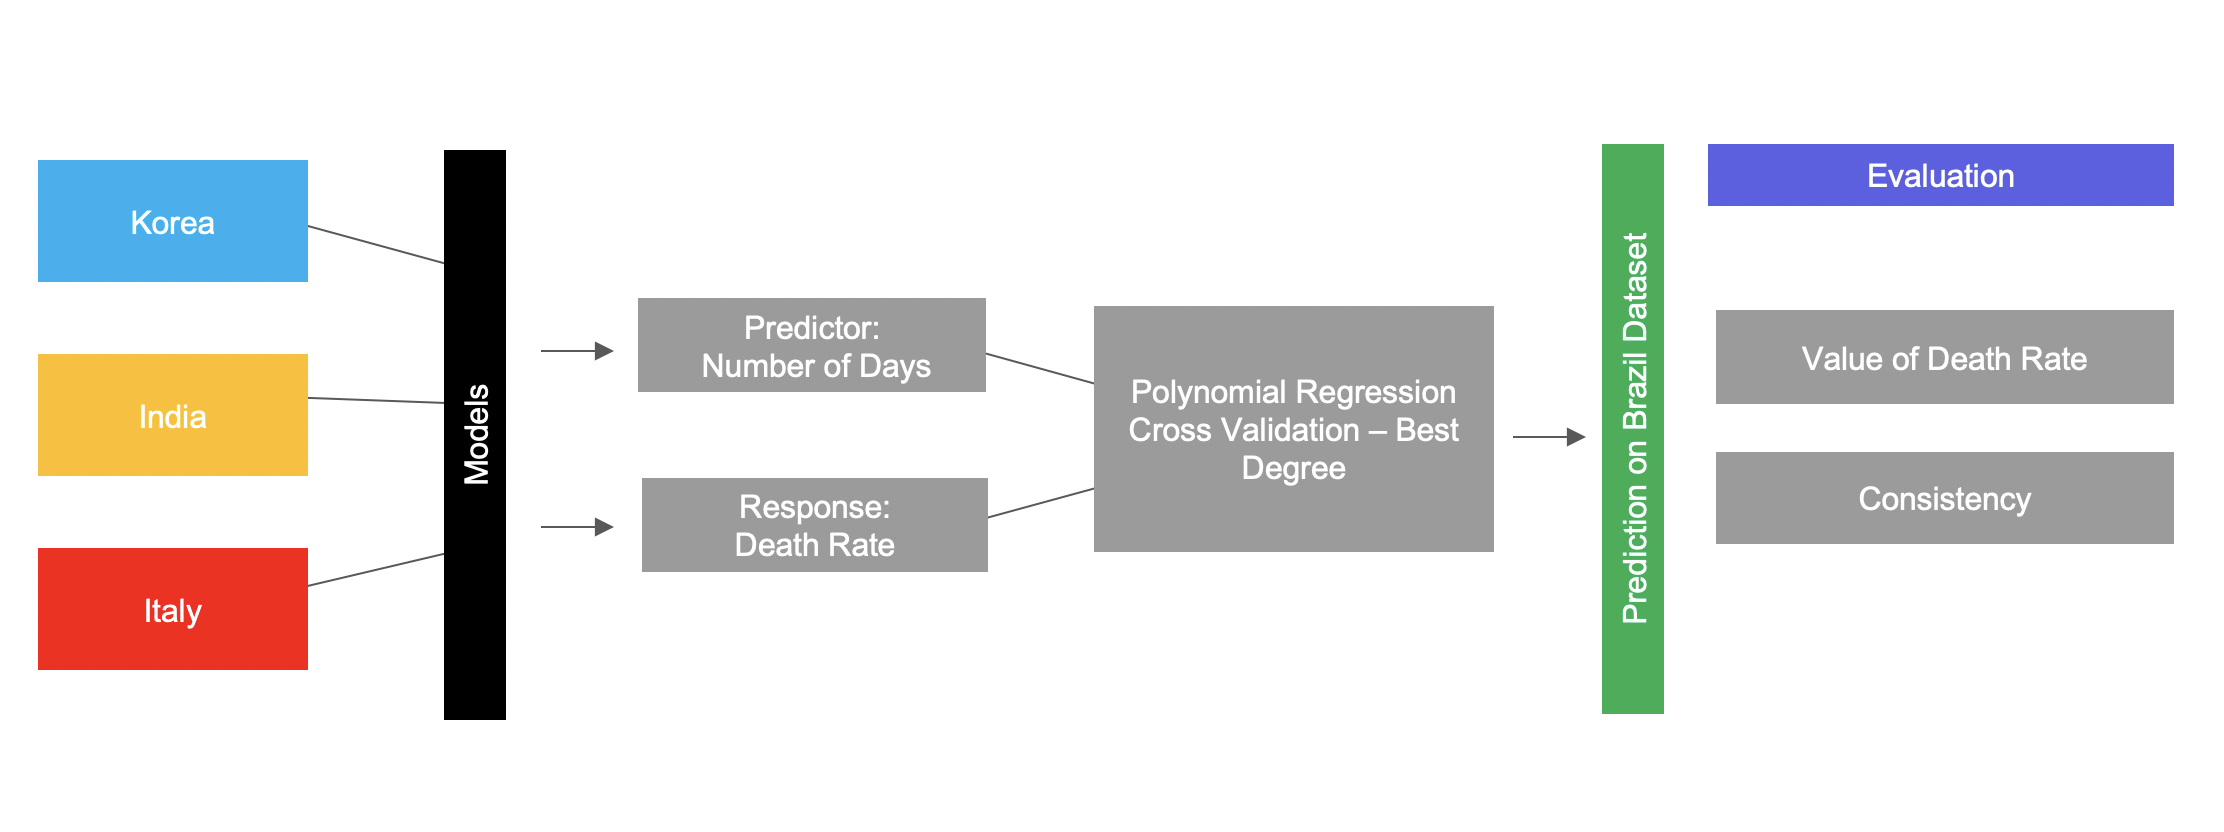

•	**Decrease rate of covid19 cases**: We use percentage decrease formula to find out the percentage of decrease in covid19 cases since worst hit day. The faster a country contains the spread and maintains consistency; more robust its response strategy is.

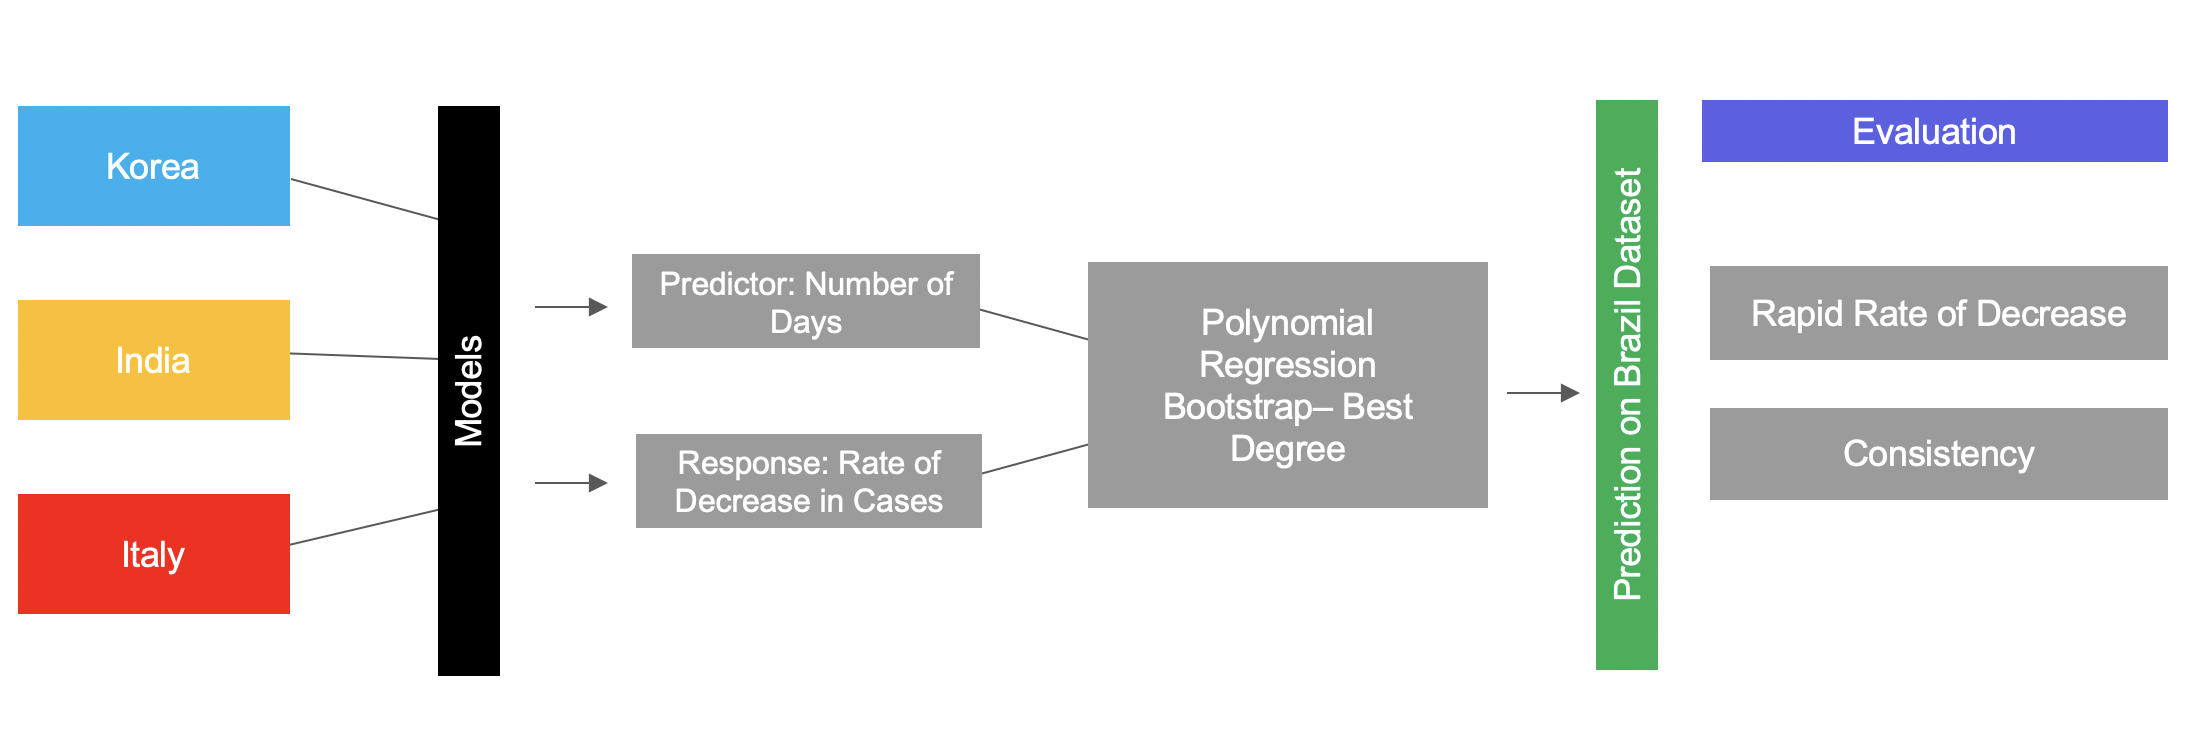

## Final Roadmap
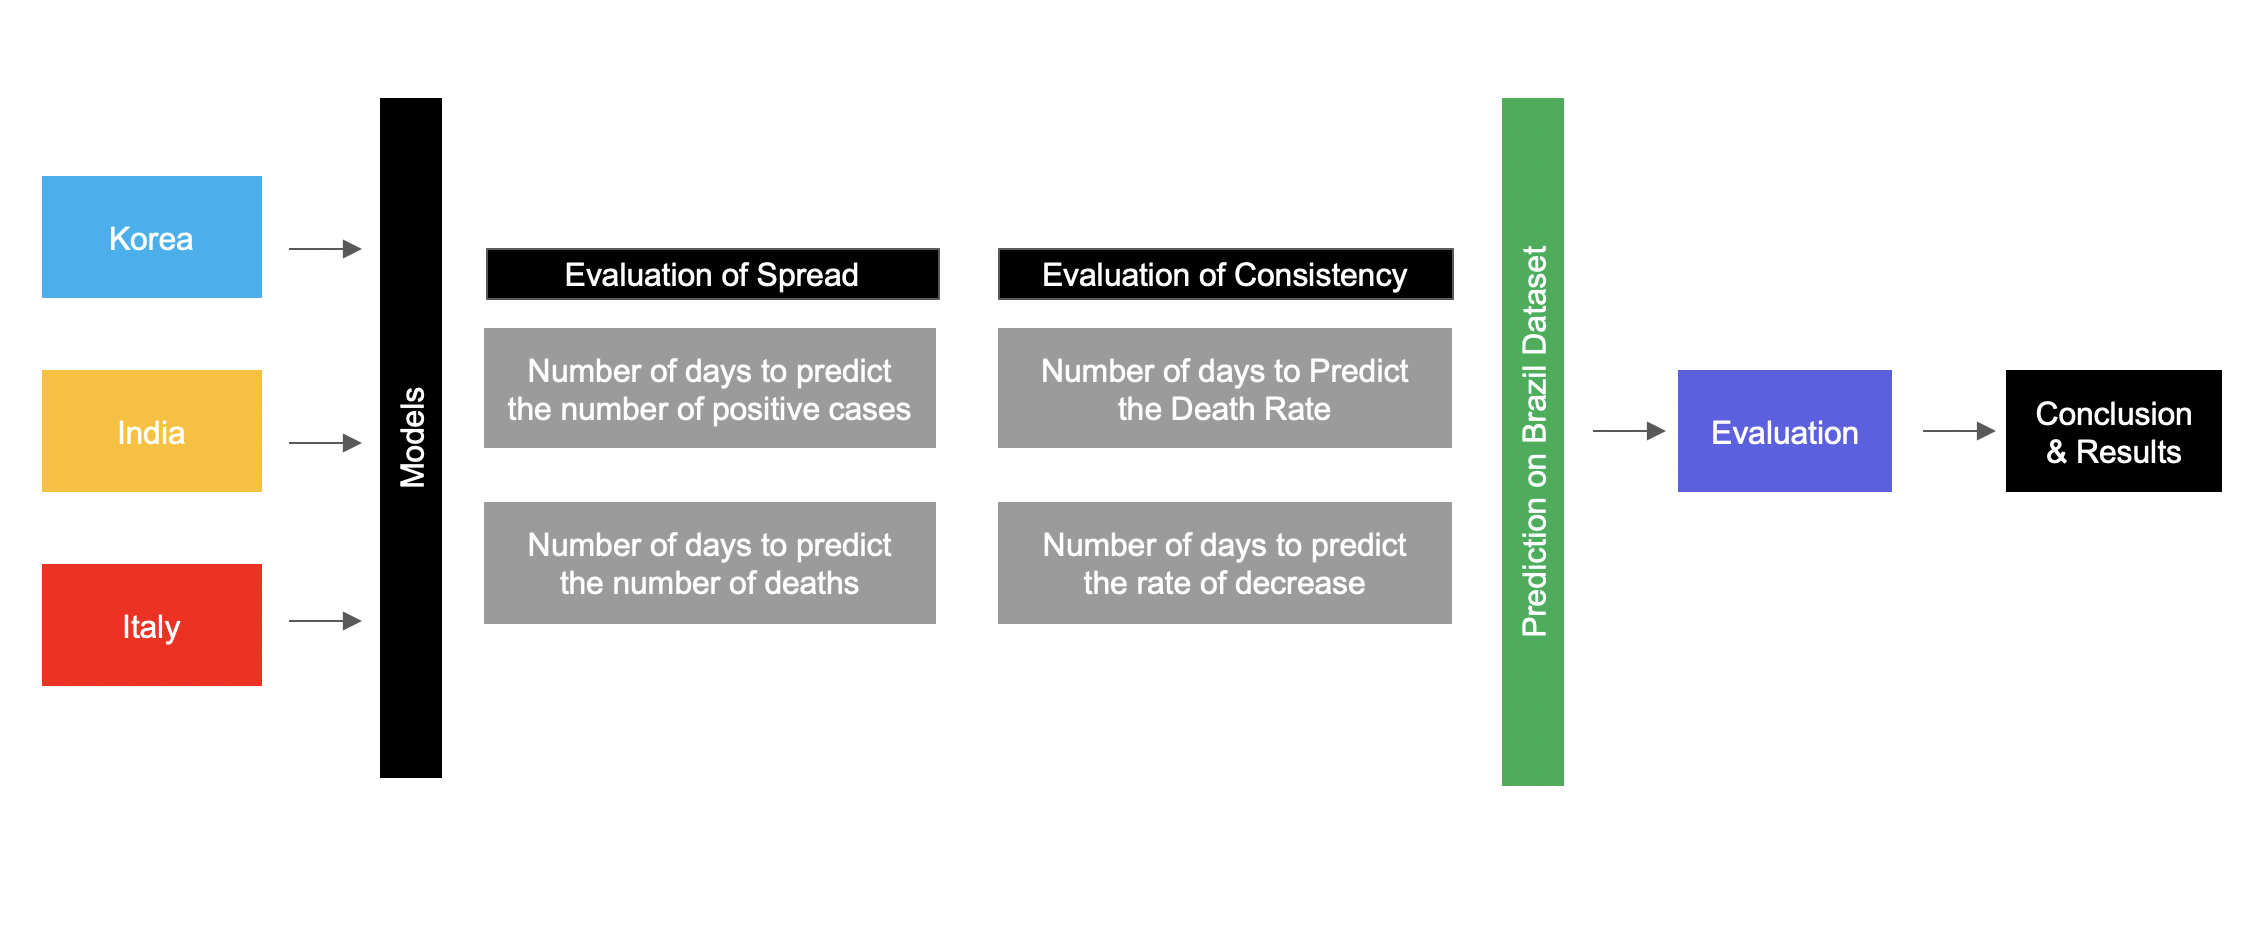

# Modelling - Polynomial Regression

Polynomial Regression is a form of linear regression in which the relationship between the independent variable x and dependent variable y is modelled as an nth degree polynomial. There are some relationships that a researcher will hypothesize is curvilinear. Clearly, such type of cases will include a polynomial term. The basic goal of regression analysis is to model the expected value of a dependent variable y in terms of the value of an independent variable x. We use mean squared error here to evaluate how well our model did. Scikit learn minimises the loss function and fits the best fitting curve. The least squared method minimises the variance of the coefficients. Polynomial models are very good in identifying rate or growth which makes it ideal to use in our model.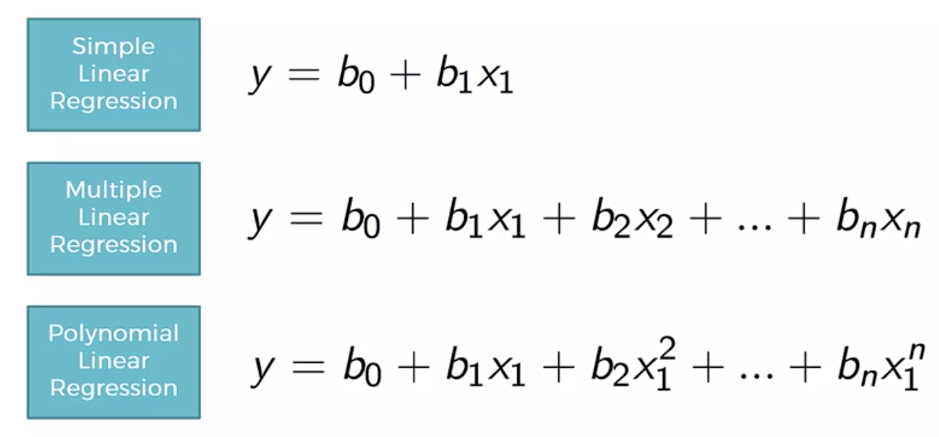

# Methodology

## Datasets Used

#### **Korea**

**Time.csv** – Includes the date, total confirmed cases, negative cases, deaths and test for South Korea.

Additional columns: Daily confirmed cases, Weekly confirmed cases, Death rate, and decrease rate, nth day, 2-day rolling mean for daily confirmed cases, 2-day rolling mean for daily deaths, 2-day rolling mean of population standardised daily confirmed cases, 2-day rolling mean of population standardised daily deaths (for further explanation refer to main notebook section xx).

**TimeAge.csv** ¬–  Includes age, confirmed and deceased.

**TimeProvince.csv** ¬–  Includes province, date, confirmed and deceased.

**TimeGender.csv** ¬–  Includes date, sex, confirmed and deceased.


#### **India**

**covid_19_india.csv** – Includes date, time, Indian cases, foreign cases, total confirmed cases, death and cured cases.

Additional columns: Daily confirmed cases, Death rate, and decrease rate, nth day, nth week 2-day rolling mean of population standardised daily confirmed cases, 2-day rolling mean of population standardised daily deaths.

**StateWisetestingDetails.csv** ¬– Includes Date, State, Total Samples and Positives.

#### **Italy**

**covid19_italy_region.csv** – Includes total positive cases, daily positive cases, total death, daily death, tests performed, hospitalized patients, intensive care patients, location and region information of Italy.

Additional columns: Death rate, daily deaths, decrease rate, nth day, nth week  2-day rolling mean of population standardised daily confirmed cases, 2-day rolling mean of population standardised daily deaths.

#### **Brazil**

**brazil_covid19_macro.csv** ¬– Includes date, week, confirmed cases, deaths, recovered, monitoring.

Additional columns: Daily confirmed cases, Death rate, and decrease rate, nth day, nth week 2-day rolling mean of population standardised daily confirmed cases, 2-day rolling mean of population standardised daily deaths.

**brazil_covid19_cities.csv** ¬– Includes date, week, cases and deaths.

**brazil_covid19_macro.csv** ¬– Includes state, cases and deaths.


# Libraries Used

**Packages:**

•	Pandas

•	Numpy

•	Scikit-learn – Polynomial features, mean_squared_error, train_test_split, cross_validate, LinearRegression

•	Matplotlib.pyplot

•	 Counter

•	 Bokeh

•	 Pretty Table

•	 Seaborn



## Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from collections import Counter
from prettytable import PrettyTable
import matplotlib.patches as mpatches
%matplotlib inline

Loading BokehJS ...

# Reading Datasets

In [4]:
india_covid_19 = pd.read_csv('data/covid_19_india.csv')
state_testing = pd.read_csv('data/StatewiseTestingDetails.csv')
korea_test = pd.read_csv('data/Time.csv')
korea_age = pd.read_csv('data/TimeAge.csv')
korea_province = pd.read_csv('data/TimeProvince.csv')
korea_gender = pd.read_csv('data/TimeGender.csv')
italy_preprocess =  pd.read_csv('data/covid19_italy_region.csv')
brazil_cities = pd.read_csv('data/brazil_covid19_cities.csv')
brazil_macro = pd.read_csv('data/brazil_covid19_macro.csv')

korea_data =  pd.read_csv('data/Time.csv')
italy_data =  pd.read_csv('data/covid19_italy_region.csv')
india_data = pd.read_csv('data/covid_19_india.csv')
brazil_data = pd.read_csv('data/brazil_covid19_macro.csv')


# Data Preperation

## Additional Columns

### Two Day Rolling Mean

Average number of increase between every two consecutive days.


### Population Standardisation
The daily cases and deaths per day are standardised by the population. This is done by taking the cases (or deaths) per 100,000 of each country's  population. By doing so, the number of cases (or deaths) per day is on a scale of 0 to 100000. 


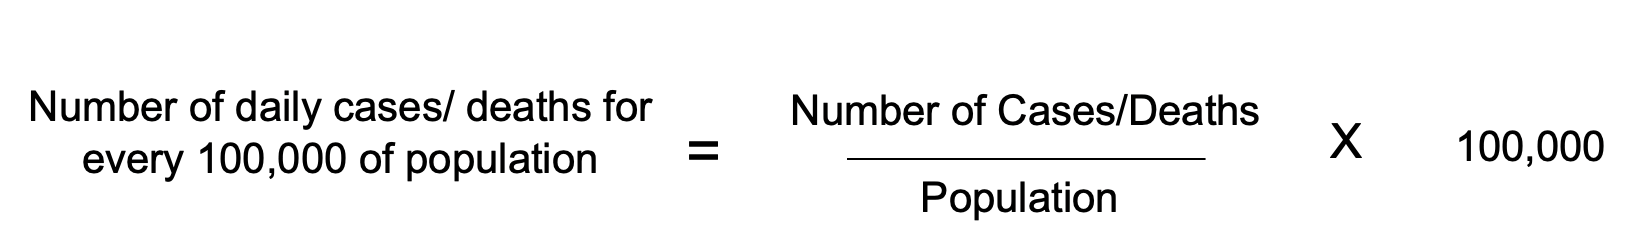

### Decrease Rate 

One way to find out which country's strategy worked best is to find out how fast they were able to contain the spread of covid cases as the day progressed and how consistent their solution was. To figure this out we are going to find out the rate of decrease in the number of covid cases since the day the response strategy was implemented. Here the original number is the highest number of one day cases recorded. We subtract this number from the daily cases and calculate the percentage of decrease. Higher the rate of decrease, smaller the number daily cases recorded.

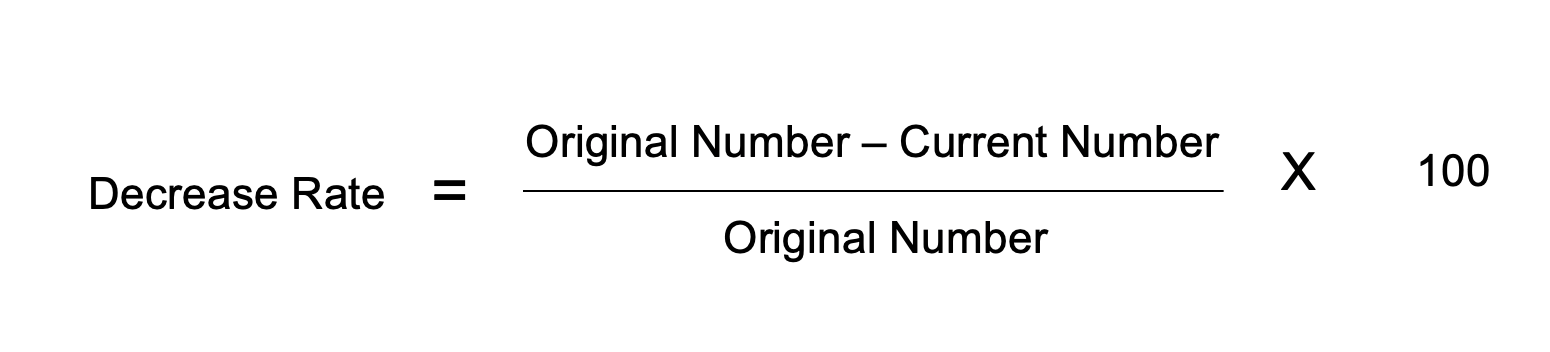

In [5]:
def decrease_rate(df, new_cases_col):
    df['cases_difference'] = max(new_cases_col) - new_cases_col
    new_cases_diff = []
    for i in range(0, len(df['cases_difference'])):
        new_cases_diff.append(df['cases_difference'][i]/ max(new_cases_col))
    df['decrease_rate'] = new_cases_diff

### Death Rate

Death rate is calculated by dividing the cumulative number of deaths by the cumulative number of confirmed cases. 

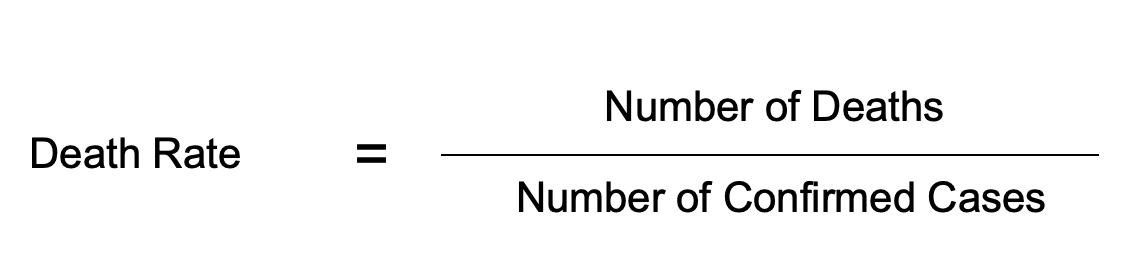

## Korea

In [6]:
#calculating death rate
korea_data['death_rate'] = korea_data['deceased']/ korea_data['confirmed']

In [7]:
#converting date to date time format
korea_data.date = pd.to_datetime(korea_data.date)

In [8]:
#dropping uneeded colulmns
korea_data.drop(['test', 'released','negative', 'time'], axis = 1, inplace = True)

In [9]:
#Confirmed Cases and Deaths given is cumulative, getting daywise numbers
new_cases = korea_data['confirmed'].diff(periods=1)
new_cases[0] = korea_data['confirmed'][0]
korea_data['new_cases'] = new_cases

new_deaths = korea_data['deceased'].diff(periods=1)
new_deaths[0] = korea_data['deceased'][0]
korea_data['new_deaths'] = new_deaths

In [10]:
decrease_rate(korea_data, korea_data.new_cases)

In [11]:
mean_2 = korea_data['new_cases'].rolling(2).mean()
mean_2[0] = mean_2[1]
korea_data['new_cases_2daymean'] = mean_2

mean_deaths_2 = korea_data['new_deaths'].rolling(2).mean()
mean_deaths_2[0] = mean_deaths_2[1]
korea_data['new_deaths_2daymean'] = mean_deaths_2

In [12]:
#standardising new_cases_2daymean & new_deaths_2daymean by population

korea_population = 51600000
korea_data['new_cases_std'] = (korea_data['new_cases']/korea_population) * 100000
korea_data['new_deaths_std'] = (korea_data['new_deaths']/korea_population) * 100000

In [13]:
#Taking 2 day rolling average
mean_cases_std = korea_data['new_cases_std'].rolling(2).mean()
mean_cases_std[0] = mean_cases_std[1]
korea_data['new_cases_std_2daymean'] = mean_cases_std

mean_deaths_std = korea_data['new_deaths_std'].rolling(5).mean()
mean_deaths_std[0] = mean_deaths_std[1]
korea_data['new_deaths_std_2daymean'] = mean_deaths_std

In [14]:
#Taking date from 29th February
korea_new = korea_data[40:]

In [15]:
#Adding day number for each day 
korea_new['day_count'] = range(1, 1 + len(korea_new))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
korea_strategy_analysis = korea_data[50:]

In [17]:
korea_strategy_analysis['day_count'] = range(1, 1 + len(korea_strategy_analysis))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Italy

In [18]:
italy_data = italy_data[['Date', 'TotalPositiveCases', 'Deaths', 'NewPositiveCases']]

In [19]:
italy_data.Date = pd.to_datetime(italy_data.Date).dt.date

In [20]:
italy_data = italy_data.groupby(['Date']).sum()

In [21]:
italy_data['death_rate'] = italy_data['Deaths']/ italy_data['TotalPositiveCases']

In [22]:
decrease_rate(italy_data, italy_data.NewPositiveCases)

In [23]:
new_deaths = italy_data['Deaths'].diff(periods=1)
new_deaths[0] = italy_data['Deaths'][0]
italy_data['new_deaths'] = new_deaths

mean_deaths_2 = italy_data['new_deaths'].rolling(2).mean()
mean_deaths_2[0] = mean_deaths_2[1]
italy_data['new_deaths_2daymean'] = mean_deaths_2

mean_cases = italy_data['NewPositiveCases'].rolling(2).mean()
mean_cases[0] = mean_cases[1]
italy_data['new_cases_2daymean'] = mean_cases


In [24]:
#using population by hundred thousand - Number of Cases/deaths per 100,000 of the population

italy_population = 60400000
italy_data['new_cases_std'] = (italy_data['NewPositiveCases']/italy_population) * 100000
italy_data['new_deaths_std'] = (italy_data['new_deaths']/italy_population) * 100000

mean_cases_std = italy_data['new_cases_std'].rolling(2).mean()
mean_cases_std[0] = mean_cases_std[1]
italy_data['new_cases_std_2daymean'] = mean_cases_std

mean_deaths_std = italy_data['new_deaths_std'].rolling(2).mean()
mean_deaths_std[0] = mean_deaths_std[1]
italy_data['new_deaths_std_2daymean'] = mean_deaths_std

In [25]:
italy_new = italy_data[23:]
italy_new['day_count'] = range(1, 1 + len(italy_new))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
italy_data.index = pd.to_datetime(italy_data.index)

In [27]:
italy_strategy_analysis = italy_data["2020-03-23": "2020"]

In [28]:
italy_strategy_analysis['day_count'] = range(1, 1 + len(italy_strategy_analysis))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## India

In [29]:
Date = india_data.Date.apply(lambda x: '2020-'+ str(x[3:5]) +'-'+ str(x[0:2]))

In [30]:
india_data.Date = pd.to_datetime(Date)

In [31]:
india_data = india_data.groupby('Date').sum().drop(['Sno', 'Cured'], axis = 1)

In [32]:
india_data['death_rate'] = india_data.Deaths / india_data.Confirmed

In [33]:
new_cases = india_data['Confirmed'].diff(periods=1)
new_cases[0] = india_data['Confirmed'][0]
india_data['new_cases'] = new_cases

new_deaths = india_data['Deaths'].diff(periods=1)
new_deaths[0] = india_data['Deaths'][0]
india_data['new_deaths'] = new_deaths

mean_2 = india_data['new_cases'].rolling(2).mean()
mean_2[0] = mean_2[1]
india_data['new_cases_2daymean'] = mean_2

mean_deaths_2 = india_data['new_deaths'].rolling(2).mean()
mean_deaths_2[0] = mean_deaths_2[1]
india_data['new_deaths_2daymean'] = mean_deaths_2


In [34]:
decrease_rate(india_data, india_data.new_cases)

In [35]:
india_data.head()

Deaths  Confirmed  death_rate  new_cases  new_deaths  \
Date                                                               
2020-01-30       0          1         0.0        1.0         0.0   
2020-01-31       0          1         0.0        0.0         0.0   
2020-02-01       0          2         0.0        1.0         0.0   
2020-02-02       0          3         0.0        1.0         0.0   
2020-02-03       0          3         0.0        0.0         0.0   

            new_cases_2daymean  new_deaths_2daymean  cases_difference  \
Date                                                                    
2020-01-30                 0.5                  0.0           97893.0   
2020-01-31                 0.5                  0.0           97894.0   
2020-02-01                 0.5                  0.0           97893.0   
2020-02-02                 1.0                  0.0           97893.0   
2020-02-03                 0.5                  0.0           97894.0   

            decrease_rate  
Date                       
2020-01-30        0.99999  
2020-01-31        1.00000  
2020-02-01        0.99999  
2020-02-02        0.99999  
2020-02-03        1.00000

In [36]:
#standardising new_cases_2daymean & new_deaths_2daymean by population

#using population by hundred thousand - Number of Cases/deaths per 100,000 of the population
India_population = 1352600000
india_data['new_cases_std'] = (india_data['new_cases']/India_population) * 100000
india_data['new_deaths_std'] = (india_data['new_deaths']/India_population) * 100000

mean_cases_std = india_data['new_cases_std'].rolling(2).mean()
mean_cases_std[0] = mean_cases_std[1]
india_data['new_cases_std_2daymean'] = mean_cases_std

mean_deaths_std = india_data['new_deaths_std'].rolling(2).mean()
mean_deaths_std[0] = mean_deaths_std[1]
india_data['new_deaths_std_2daymean'] = mean_deaths_std

In [37]:
india_new = india_data["2020-04-20":"2020"]
india_new['day_count'] = range(1, 1 + len(india_new))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [38]:
india_data.index = pd.to_datetime(india_data.index)

In [39]:
india_strategy_analysis = india_data["2020-03-23": "2020"]

In [40]:
india_strategy_analysis['day_count'] = range(1, 1 + len(india_strategy_analysis))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Brazil

In [41]:
brazil_data.drop(['country', 'recovered','monitoring'], axis = 1, inplace = True)

In [42]:
brazil_data.date = pd.to_datetime(brazil_data.date)

In [43]:
new_cases = brazil_data['cases'].diff(periods=1)
new_cases[0] = brazil_data['cases'][0]
brazil_data['new_cases'] = new_cases

In [44]:
new_deaths = brazil_data['deaths'].diff(periods=1)
new_deaths[0] = brazil_data['deaths'][0]
brazil_data['new_deaths'] = new_deaths

mean_2 = brazil_data['new_cases'].rolling(2).mean()
mean_2[0] = mean_2[1]
brazil_data['new_cases_2daymean'] = mean_2

mean_deaths_2 = brazil_data['new_deaths'].rolling(2).mean()
mean_deaths_2[0] = mean_deaths_2[1]
brazil_data['new_deaths_2daymean'] = mean_deaths_2

In [45]:
decrease_rate(brazil_data, brazil_data.new_cases)

In [46]:
#using population by hundred thousand - Number of Cases/deaths per 100,000 of the population
brazil_population = 209500000
brazil_data['new_cases_std'] = (brazil_data['new_cases']/brazil_population) * 100000
brazil_data['new_deaths_std'] = (brazil_data['new_deaths']/brazil_population) * 100000

In [47]:
mean_cases_std = brazil_data['new_cases_std'].rolling(5).mean()
mean_cases_std[0] = mean_cases_std[1]
brazil_data['new_cases_std_2daymean'] = mean_cases_std

In [48]:
mean_deaths_std = brazil_data['new_deaths_std'].rolling(5).mean()
mean_deaths_std[0] = mean_deaths_std[1]
brazil_data['new_deaths_std_2daymean'] = mean_deaths_std

In [49]:
brazil_data['death_rate'] = brazil_data['deaths']/ brazil_data['cases']
brazil_data.dropna(inplace = True)

In [50]:
brazil_new = brazil_data[:125] #Taking 125 values
brazil_new.reset_index(inplace=True)
len(brazil_new)

125

In [51]:
brazil_new['day_count'] = range(1, 1 + len(brazil_new))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [52]:
brazil_strategy_analysis = brazil_data

In [53]:
brazil_strategy_analysis['day_count'] = range(1, 1 + len(brazil_strategy_analysis))

# Exploratory Data Analysis

## India

In [54]:
state_testing.dropna(inplace = True)

In [55]:
#Cumulative Cases Vs Deaths India
Date = india_covid_19.Date.apply(lambda x: '2020-'+ str(x[3:5]) +'-'+ str(x[0:2]))

In [56]:
india_covid_19.Date = pd.to_datetime(Date)

In [57]:
india_covid_19['Week_Number'] = india_covid_19['Date'].dt.week

In [58]:
india_process = india_covid_19.groupby('Week_Number').sum().drop(['Sno', 'Cured'], axis = 1)

Text(0.5, 0, 'Week Number')

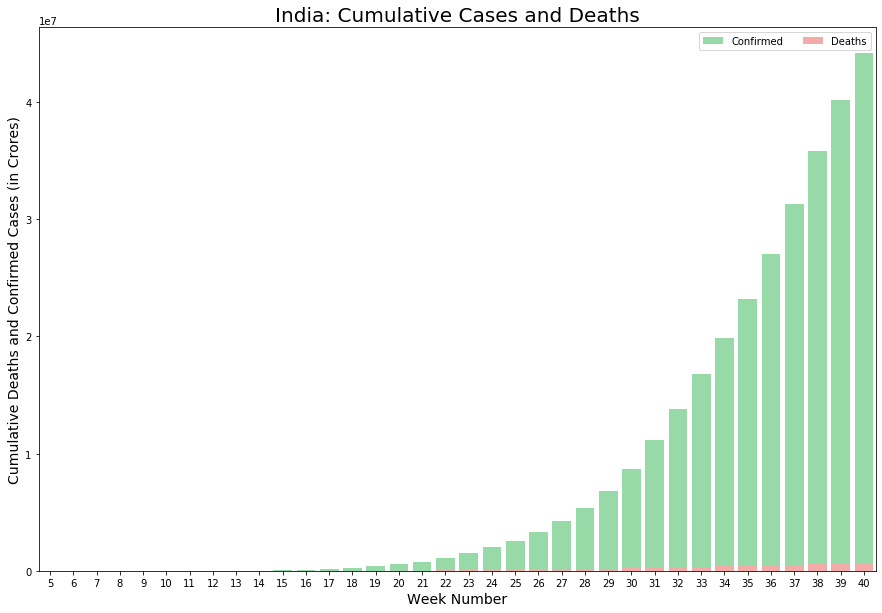

In [59]:
plt.figure(figsize=(15,10))
sns.set_color_codes("pastel")
sns.barplot(y=india_process.Confirmed[:-1], x=india_process.index[:-1], color='g', label = 'Confirmed')
sns.barplot(y=india_process.Deaths[:-1], x=india_process.index[:-1], color='r', label = 'Deaths')
plt.title('India: Cumulative Cases and Deaths',fontsize = 20)
plt.legend(ncol=2, loc="upper right", frameon=True)
plt.ylabel('Cumulative Deaths and Confirmed Cases (in Crores)', fontsize = 14)
plt.xlabel('Week Number', fontsize = 14)


Text(0.5, 1.0, 'India - Deaths')

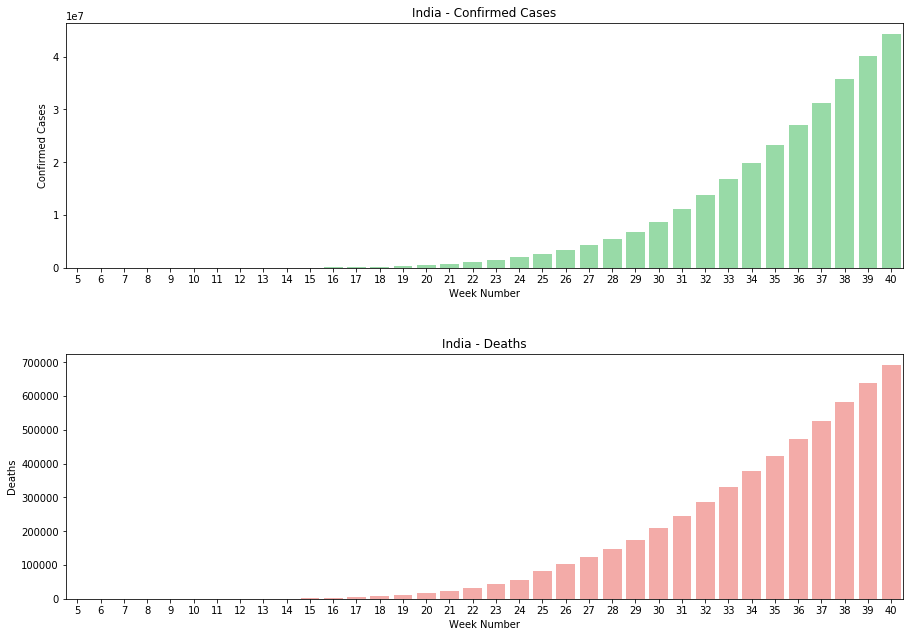

In [60]:
f, axes = plt.subplots(2, 1, figsize=(15,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.35)

sns.barplot(y= india_process.Confirmed[:-1], x = india_process.index[:-1], color = 'g', label = 'Confirmed Cases',  ax=axes[0])
axes[0].set_xlabel("Week Number")
axes[0].set_ylabel("Confirmed Cases")
axes[0].set_title("India - Confirmed Cases")

sns.barplot(y= india_process.Deaths[:-1], x = india_process.index[:-1], color = 'r', label = 'Confirmed Cases', ax=axes[1])
axes[1].set_xlabel("Week Number")
axes[1].set_ylabel("Deaths")
axes[1].set_title("India - Deaths")

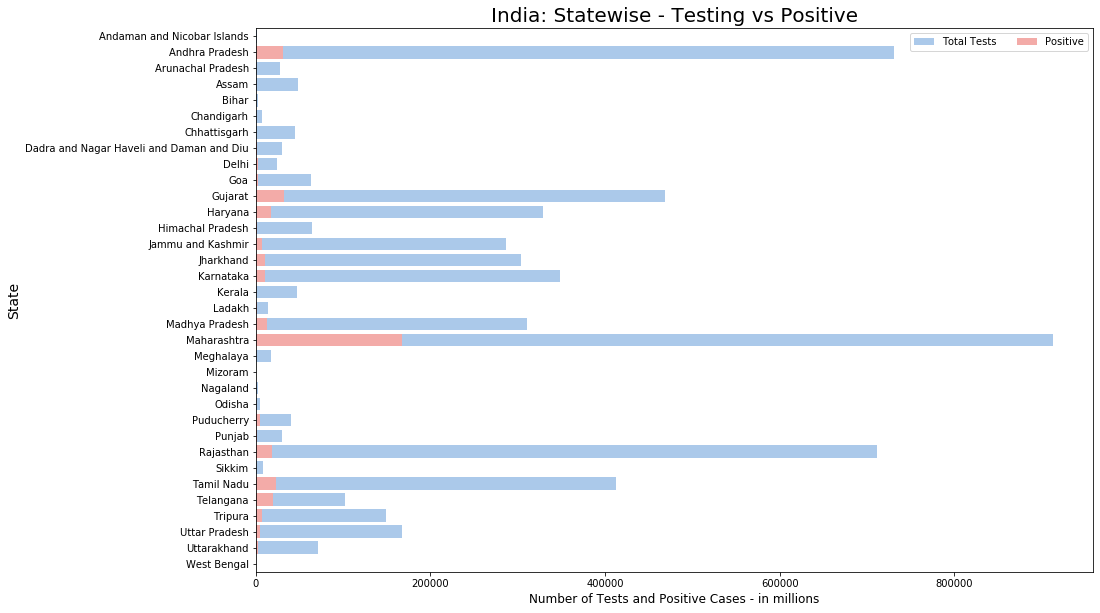

In [61]:
plt.figure(figsize=(15,10))
sns.set_color_codes("pastel")
sns.barplot(x=state_testing.TotalSamples, y= state_testing.State, data=state_testing,label="Total Tests", color = 'b', ci=None)
sns.barplot(x=state_testing.Positive, y=state_testing.State, data=state_testing,label='Positive', color='r', ci=None)
plt.title('India: Statewise - Testing vs Positive',fontsize = 20)
plt.ylabel('State', fontsize = 14)
plt.xlabel('Number of Tests and Positive Cases - in millions', fontsize = 12)
plt.legend(ncol=2, loc="upper right", frameon=True);

 In India, Maharashtra, Andhra Pradesh, Rajasthan, Gujarat and Tamil Nadu have the highest number of dailiy testing. 

Text(0.5, 0, 'Number of Positive Cases')

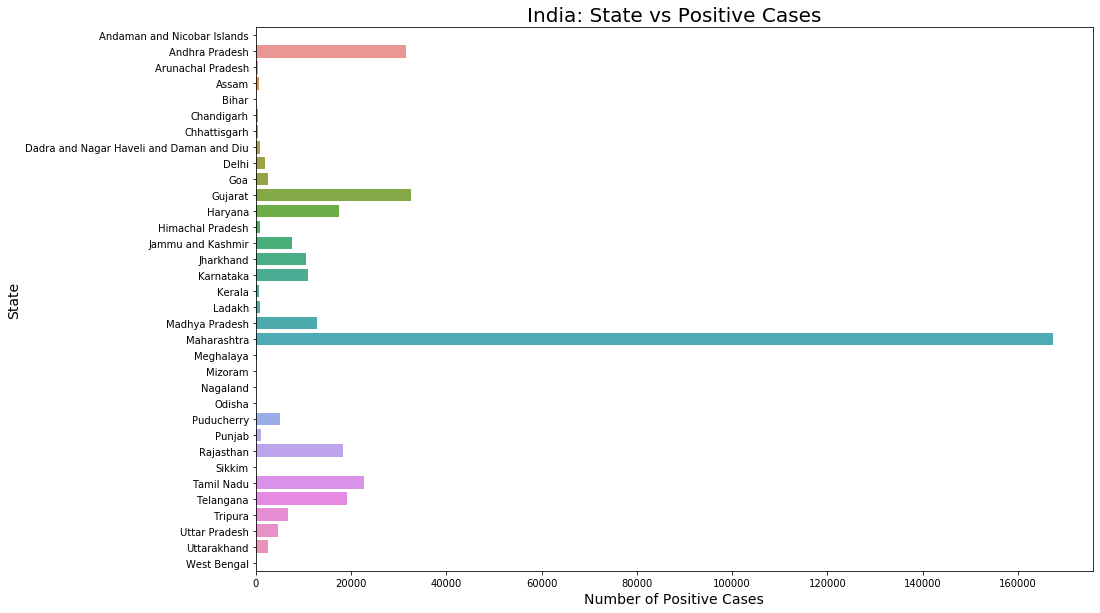

In [62]:
plt.figure(figsize=(15,10))
sns.set_color_codes("pastel")
sns.barplot(y=state_testing.State, x=state_testing.Positive, ci=None)
plt.title('India: State vs Positive Cases' ,fontsize = 20)
plt.ylabel('State', fontsize = 14)
plt.xlabel('Number of Positive Cases', fontsize = 14)

 In India, Maharashtra has the highest number of cases by state. 

# South Korea

In [63]:
Date = korea_test.date.apply(lambda x: '2020-'+ str(x[5:7]) +'-'+ str(x[8:10]))

In [64]:
korea_test.date = pd.to_datetime(Date)

In [65]:
korea_test['Week_Number'] = korea_test['date'].dt.week

In [66]:
korea_test = korea_test.groupby('Week_Number').sum()

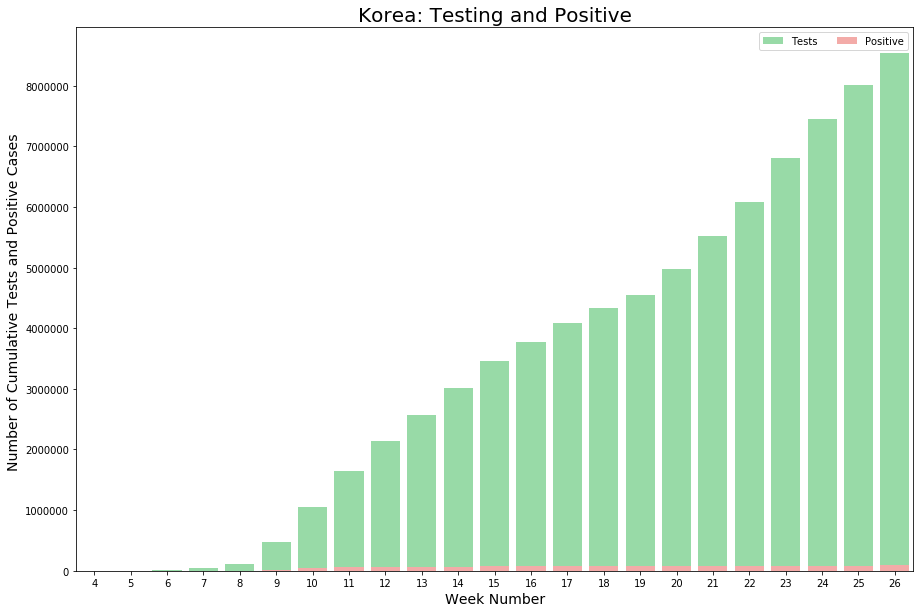

In [67]:
plt.figure(figsize=(15,10))
sns.barplot(y=korea_test.test[:-1], x=korea_test.index[:-1], color='g', label = 'Tests')
sns.barplot(y=korea_test.confirmed[:-1], x=korea_test.index[:-1], color='r', label = 'Positive')
plt.title('Korea: Testing and Positive',fontsize = 20)
plt.ylabel('Number of Cumulative Tests and Positive Cases ', fontsize = 14)
plt.xlabel('Week Number', fontsize = 14)
plt.legend(ncol=2, loc="upper right", frameon=True);

Text(0.5, 1.0, 'Korea - Tests')

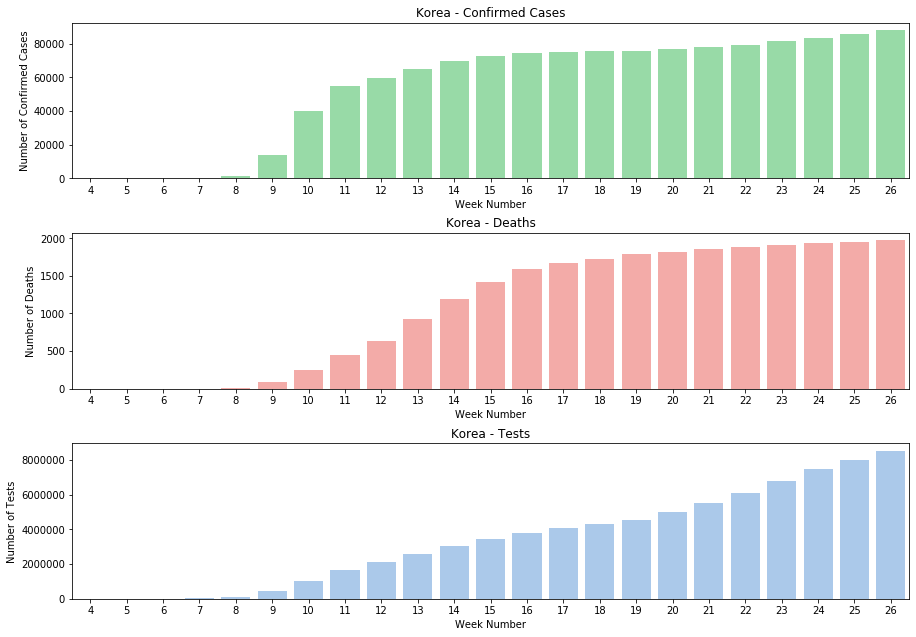

In [68]:
f, axes = plt.subplots(3, 1, figsize=(15,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.35)

sns.barplot(y= korea_test.confirmed[:-1], x = korea_test.index[:-1], color = 'g', ax=axes[0])
axes[0].set_xlabel("Week Number")
axes[0].set_ylabel("Number of Confirmed Cases")
axes[0].set_title("Korea - Confirmed Cases")

sns.barplot(y= korea_test.deceased[:-1], x = korea_test.index[:-1], color = 'r', ax=axes[1])
axes[1].set_xlabel("Week Number")
axes[1].set_ylabel("Number of Deaths")
axes[1].set_title("Korea - Deaths")

sns.barplot(y= korea_test.test[:-1], x = korea_test.index[:-1], color = 'b',ax=axes[2])
axes[2].set_xlabel("Week Number")
axes[2].set_ylabel("Number of Tests")
axes[2].set_title("Korea - Tests")


Text(0, 0.5, 'Age Group')

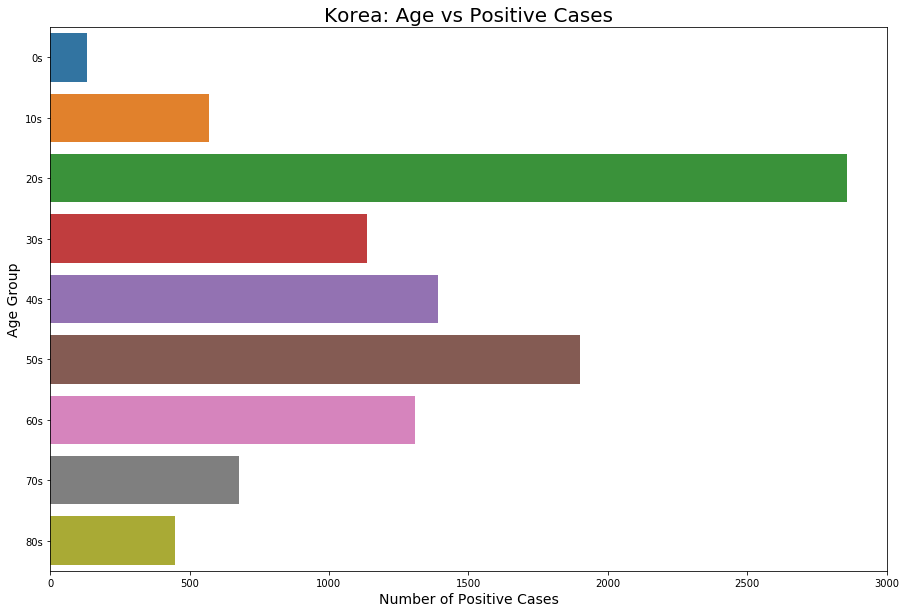

In [69]:
korea_age.head()
plt.figure(figsize=(15,10))
sns.barplot(y=korea_age.age, x=korea_age.confirmed, ci=0)
plt.title('Korea: Age vs Positive Cases', fontsize=20)
plt.xlabel('Number of Positive Cases', fontsize = 14)
plt.ylabel('Age Group', fontsize = 14)

In South Korea, the 20's age group has the highest number of positive cases. 

Text(0, 0.5, 'Province')

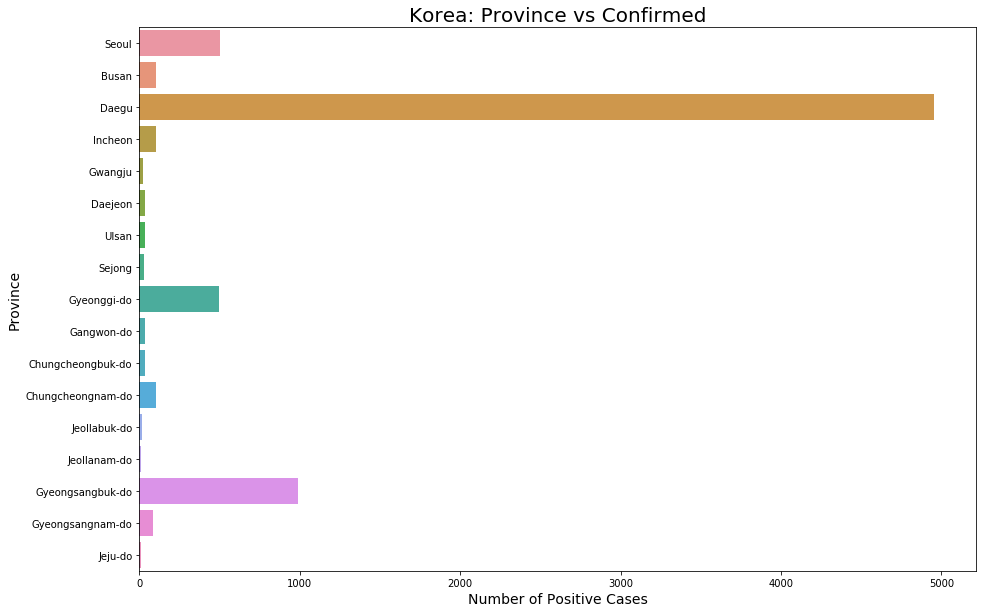

In [70]:
plt.figure(figsize=(15,10))
sns.barplot(y=korea_province.province, x=korea_province.confirmed, ci=0)
plt.title('Korea: Province vs Confirmed', fontsize=20)
plt.xlabel('Number of Positive Cases', fontsize = 14)
plt.ylabel('Province', fontsize = 14)

In South Korea, the Daegu province has the highest number of positive cases. 

Text(0, 0.5, 'Gender')

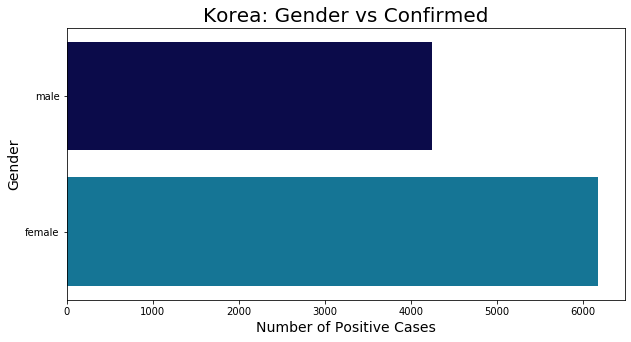

In [71]:
plt.figure(figsize=(10,5))
sns.barplot(y=korea_gender.sex, x=korea_gender.confirmed, palette = "ocean",  ci=0)
plt.title('Korea: Gender vs Confirmed', fontsize=20)
plt.xlabel('Number of Positive Cases', fontsize = 14)
plt.ylabel('Gender', fontsize = 14)

Females have had a higher number of positive cases. 

# Italy

In [72]:
italy_preprocess.Date = pd.to_datetime(italy_preprocess.Date)

In [73]:
italy_preprocess['Week_Number'] = italy_preprocess['Date'].dt.week

In [74]:
italy_cases = italy_preprocess.groupby(['Week_Number']).sum()

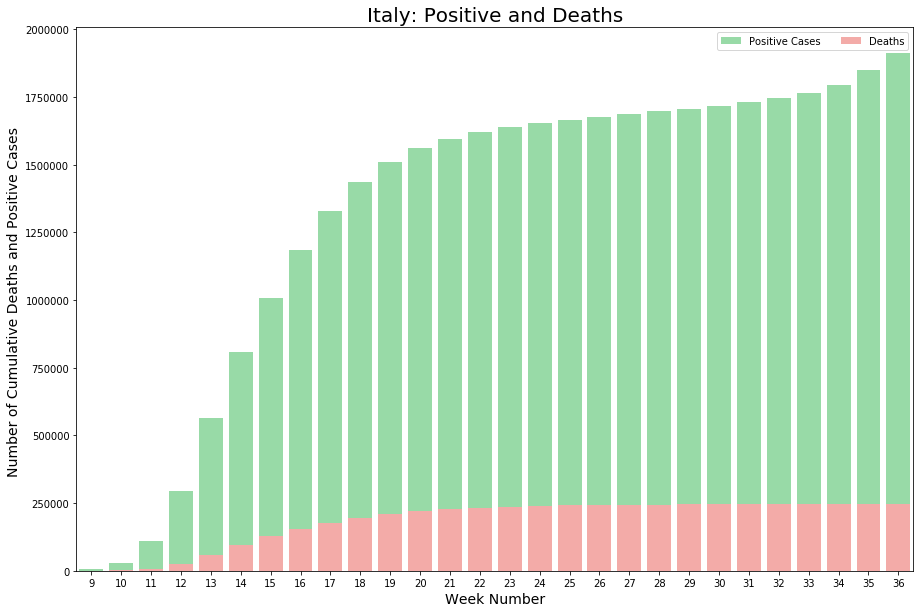

In [75]:
plt.figure(figsize=(15,10))
sns.barplot(y=italy_cases.TotalPositiveCases[:-1], x=italy_cases.index[:-1], color='g', label = 'Positive Cases')
sns.barplot(y=italy_cases.Deaths[:-1], x=italy_cases.index[:-1], color='r', label = 'Deaths')
plt.title('Italy: Positive and Deaths',fontsize = 20)
plt.ylabel('Number of Cumulative Deaths and Positive Cases ', fontsize = 14)
plt.xlabel('Week Number', fontsize = 14)
plt.legend(ncol=2, loc="upper right", frameon=True);

Italy had a higher death rate compared to other countries due to their higher elderly population group. 

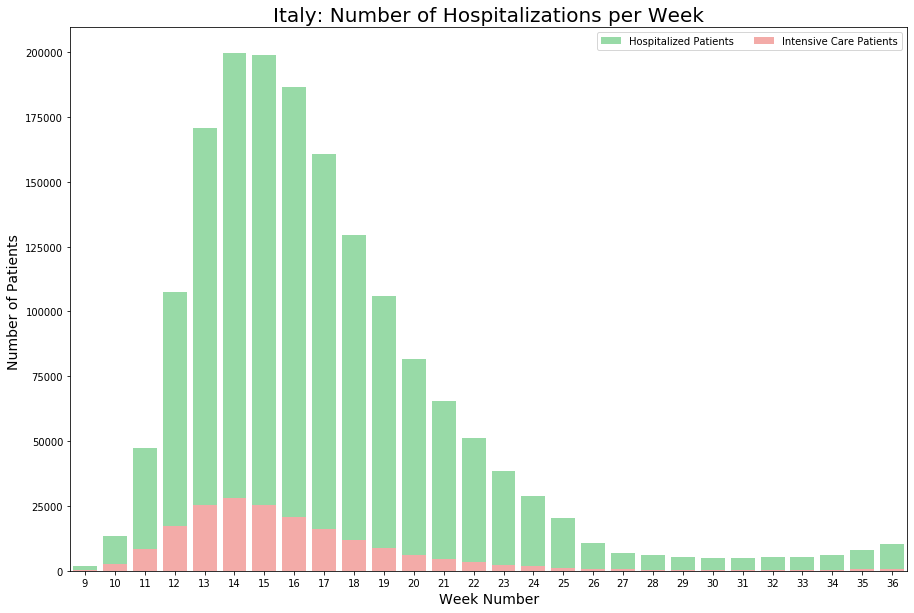

In [76]:
plt.figure(figsize=(15,10))
sns.barplot(y=italy_cases.HospitalizedPatients[:-1], x=italy_cases.index[:-1], color='g', label = 'Hospitalized Patients')
sns.barplot(y=italy_cases.IntensiveCarePatients[:-1], x=italy_cases.index[:-1], color='r', label = 'Intensive Care Patients')

plt.title('Italy: Number of Hospitalizations per Week',fontsize = 20)
plt.ylabel('Number of Patients ', fontsize = 14)
plt.xlabel('Week Number', fontsize = 14)
plt.legend(ncol=2, loc="upper right", frameon=True);

There seems to be a gradual decrease in the number of hospitalizations over the weeks. We can also see that the number of Intensive care patients have also decreased. 

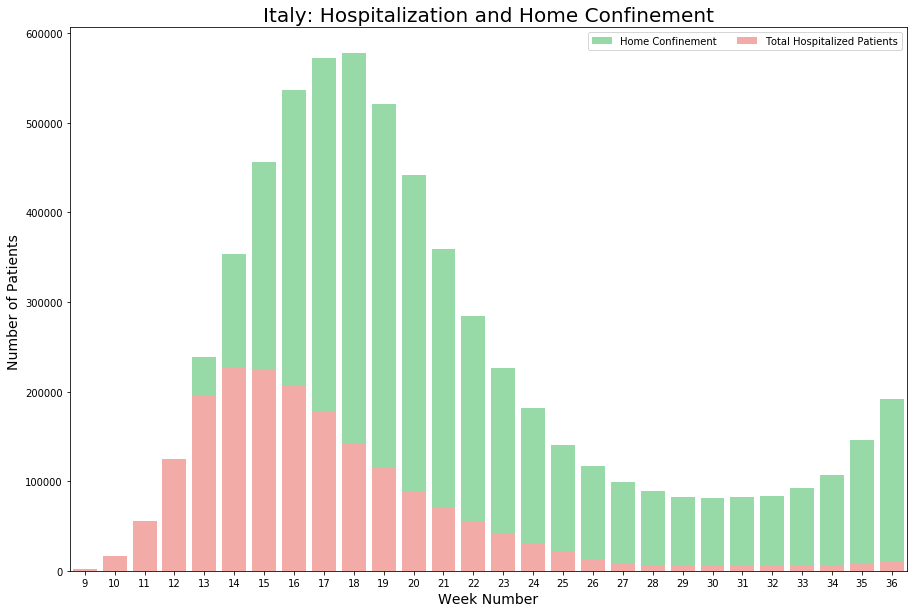

In [77]:
plt.figure(figsize=(15,10))
sns.barplot(y=italy_cases.HomeConfinement[:-1], x=italy_cases.index[:-1], color='g', label = 'Home Confinement')
sns.barplot(y=italy_cases.TotalHospitalizedPatients[:-1], x=italy_cases.index[:-1], color='r', label = 'Total Hospitalized Patients')

plt.title('Italy: Hospitalization and Home Confinement',fontsize = 20)
plt.ylabel('Number of Patients ', fontsize = 14)
plt.xlabel('Week Number', fontsize = 14)
plt.legend(ncol=2, loc="upper right", frameon=True);

We see that there has been a decrease in hospitalizations over time. However, there seems to be an increase in hospitalizations starting from week 31.

In [78]:
italy_region = italy_preprocess.groupby(['RegionName']).sum()

Text(0, 0.5, 'Region')

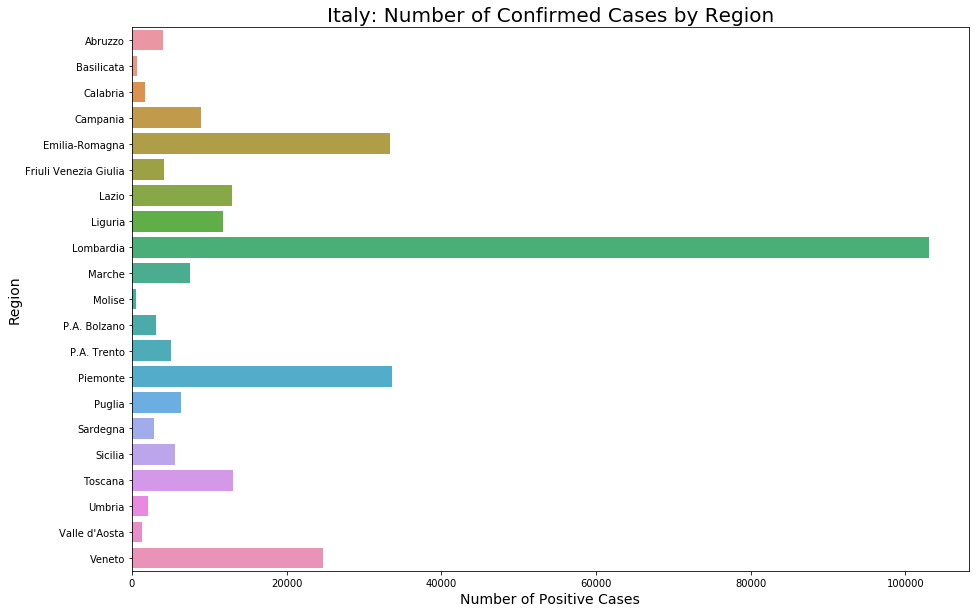

In [79]:
plt.figure(figsize=(15,10))
sns.barplot(y=italy_region.index, x=italy_region.NewPositiveCases, ci=0)
plt.title('Italy: Number of Confirmed Cases by Region', fontsize=20)
plt.xlabel('Number of Positive Cases', fontsize = 14)
plt.ylabel('Region', fontsize = 14)

The Lombardia region in Italy has the highest number of positive cases. 

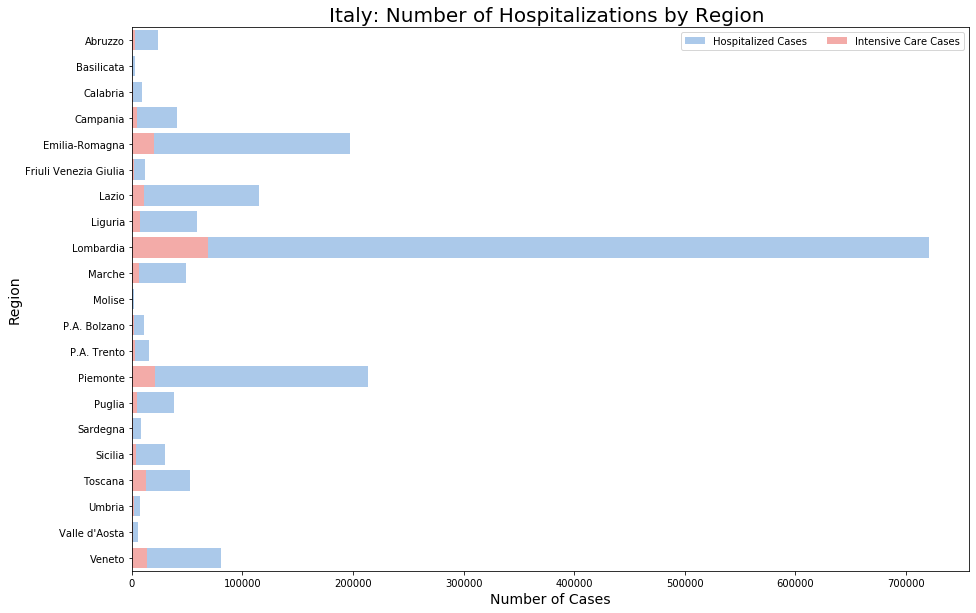

In [80]:
plt.figure(figsize=(15,10))
sns.barplot(y=italy_region.index, x=italy_region.HospitalizedPatients, ci=0, label = 'Hospitalized Cases', color = 'b')
sns.barplot(y=italy_region.index, x=italy_region.IntensiveCarePatients, ci=0, label = 'Intensive Care Cases', color= 'r')
plt.title('Italy: Number of Hospitalizations by Region ', fontsize=20)
plt.xlabel('Number of Cases', fontsize = 14)
plt.ylabel('Region', fontsize = 14)
plt.legend(ncol=2, loc="upper right", frameon=True);

The Lombardia region in Italy has the highest number of Hospitalized cases and Intensive care cases.  

# Brazil

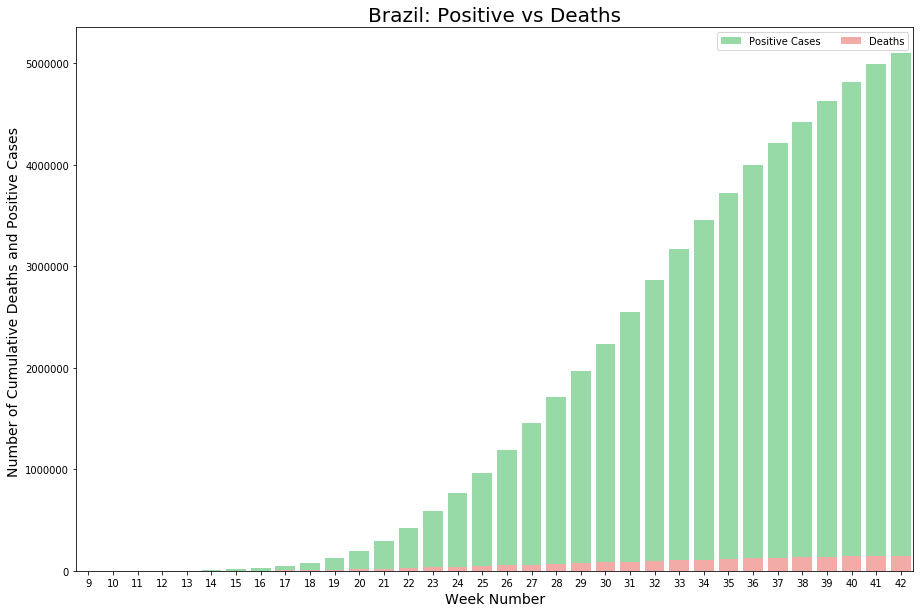

In [81]:
plt.figure(figsize=(15,10))
sns.barplot(y=brazil_macro.cases, x=brazil_macro.week, color='g', label = 'Positive Cases', ci=0)
sns.barplot(y=brazil_macro.deaths, x=brazil_macro.week, color='r', label = 'Deaths', ci=0)
plt.title('Brazil: Positive vs Deaths',fontsize = 20)
plt.ylabel('Number of Cumulative Deaths and Positive Cases ', fontsize = 14)
plt.xlabel('Week Number', fontsize = 14)
plt.legend(ncol=2, loc="upper right", frameon=True);

Text(0.5, 1.0, 'Brazil - Deaths')

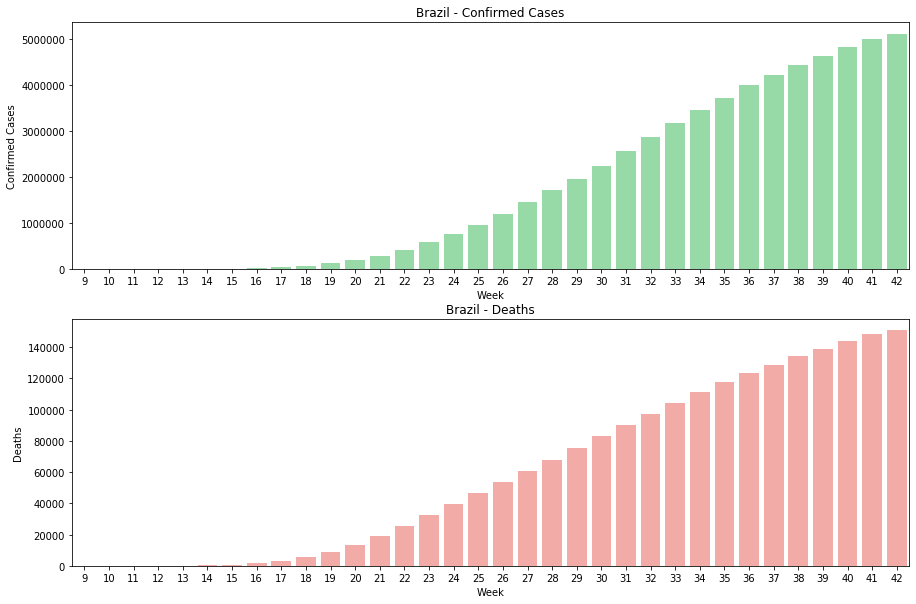

In [82]:
f, axes = plt.subplots(2, 1, figsize=(15,10))
sns.barplot(y= brazil_macro.cases, x = brazil_macro.week, color = 'g', label = 'Confirmed Cases',  ax=axes[0], ci=0)
axes[0].set_xlabel("Week")
axes[0].set_ylabel("Confirmed Cases")
axes[0].set_title("Brazil - Confirmed Cases")

sns.barplot(y= brazil_macro.deaths, x = brazil_macro.week, color = 'r', label = 'Confirmed Cases', ax=axes[1], ci=0)
axes[1].set_xlabel("Week")
axes[1].set_ylabel("Deaths")
axes[1].set_title("Brazil - Deaths")


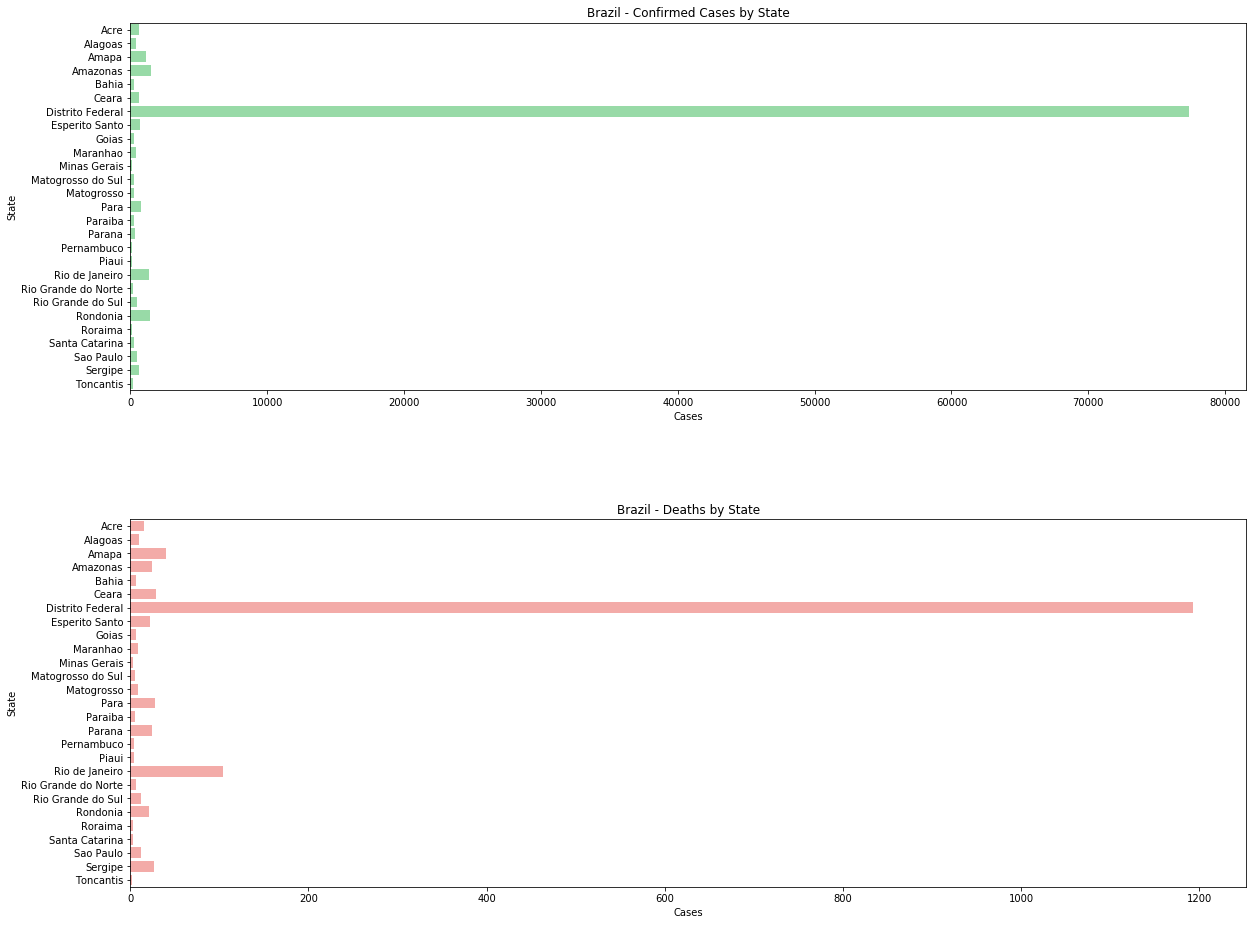

In [83]:
f, axes = plt.subplots(2, 1, figsize=(20,15))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.35)

sns.barplot(y= brazil_cities.state, x = brazil_cities.cases, color = 'g', label = 'Confirmed Cases', ax=axes[0], ci=0)
axes[0].set_ylabel("State")
axes[0].set_xlabel("Cases")
axes[0].set_title("Brazil - Confirmed Cases by State")
axes[0].set_yticklabels(['Acre','Alagoas','Amapa','Amazonas', 'Bahia', 'Ceara', 'Distrito Federal', 'Esperito Santo', 'Goias', 'Maranhao', 'Minas Gerais', 'Matogrosso do Sul', 'Matogrosso', 'Para', 'Paraiba', 'Parana', 'Pernambuco', 'Piaui', 'Rio de Janeiro', 'Rio Grande do Norte', 'Rio Grande do Sul', 'Rondonia', 'Roraima', 'Santa Catarina', 'Sao Paulo', 'Sergipe', 'Toncantis'])

sns.barplot(y= brazil_cities.state, x = brazil_cities.deaths, color = 'r', label = 'Deaths' , ax=axes[1], ci=0)
axes[1].set_ylabel("State")
axes[1].set_xlabel("Cases")
axes[1].set_title("Brazil - Deaths by State")
axes[1].set_yticklabels(['Acre','Alagoas','Amapa','Amazonas', 'Bahia', 'Ceara', 'Distrito Federal', 'Esperito Santo', 'Goias', 'Maranhao', 'Minas Gerais', 'Matogrosso do Sul', 'Matogrosso', 'Para', 'Paraiba', 'Parana', 'Pernambuco', 'Piaui', 'Rio de Janeiro', 'Rio Grande do Norte', 'Rio Grande do Sul', 'Rondonia', 'Roraima', 'Santa Catarina', 'Sao Paulo', 'Sergipe', 'Toncantis'])

plt.show()

The Distrito Federal state in Brazil has had the highest number of positive cases and deaths. 

# Modelling

## 1. Predicting Number of Positive Cases using Number of Days

### Korea

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Date')

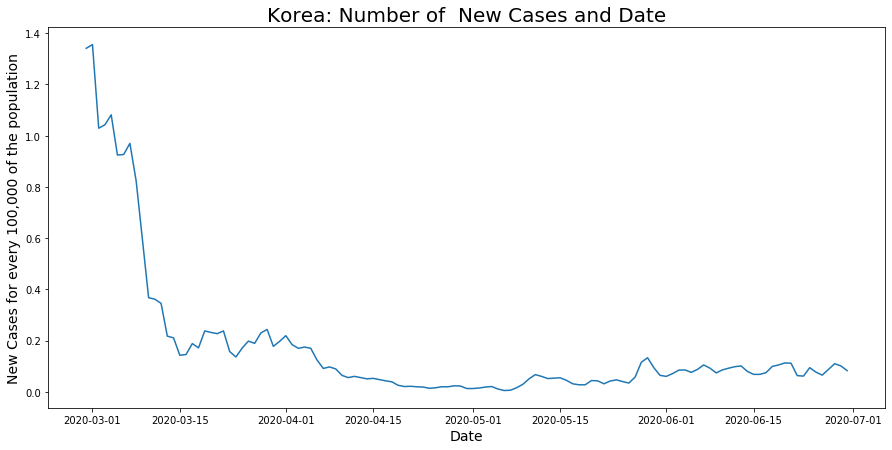

In [84]:
plt.figure(figsize=(15,7))
plt.plot(korea_new.date, korea_new.new_cases_std_2daymean)
plt.title('Korea: Number of  New Cases and Date',fontsize = 20)
plt.ylabel('New Cases for every 100,000 of the population', fontsize = 14)
plt.xlabel('Date', fontsize = 14)

Korea had high numbers of new cases intially, however they have a had a quick and abprupt decrease in cases. 

In [85]:
#Polynomial Regression 

x = korea_new[['day_count']]
y = korea_new.new_cases_std_2daymean

maxdeg = 50

training_error, validation_error = [],[]

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.8, random_state = 121)

#Run a for loop through the degrees of the polynomial, fit linear regression, predict y values and calculate the training and testing errors and update it to the list
for d in range(maxdeg):
    
    #Compute the polynomial features for the entire data, train data and validation data
    x_poly_train = PolynomialFeatures(d).fit_transform(x_train)
    x_poly_test = PolynomialFeatures(d).fit_transform(x_test)
    x_poly = PolynomialFeatures(d).fit_transform(x)

    lreg = LinearRegression()
    
    mse_score = cross_validate(lreg, x_poly, y, cv=10, scoring = "neg_mean_squared_error", return_train_score = True )
    
    train_score = (-np.mean(mse_score['train_score']))
    test_score = (-np.mean(mse_score['test_score']))

    #Compute the train and validation MSE
    training_error.append(train_score)
    validation_error.append(test_score)


In [86]:
#The best degree with the lowest validation error
min_mse = min(validation_error)
best_degree_km1 = validation_error.index(min_mse)

print("The best degree of the model using validation is",best_degree_km1, "with MSE=", np.round(min_mse,8))


The best degree of the model using validation is 3 with MSE= 0.05085438


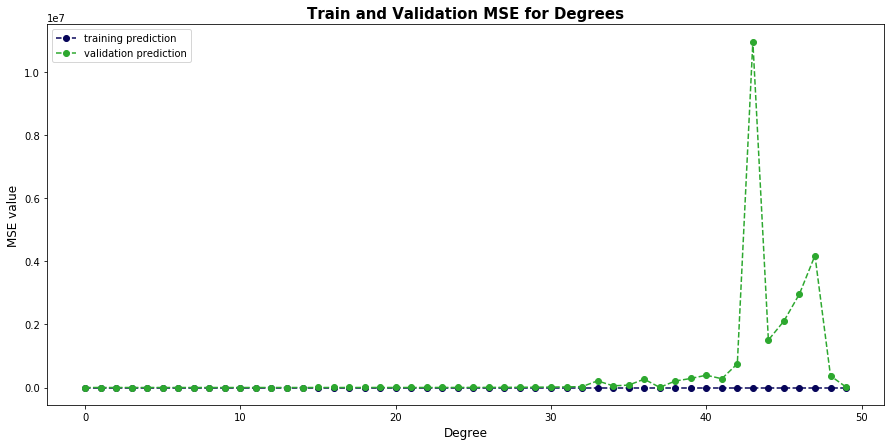

In [87]:
#plotting train vs validation MSE
plt.figure(figsize = (15, 7))
plt.plot(list(range(maxdeg)), training_error, marker = 'o', linestyle = 'dashed', color = "#060459", label = "training prediction")
plt.plot(list(range(maxdeg)), validation_error, marker = 'o', linestyle = 'dashed', color = "#2da82f", label = "validation prediction")
plt.xlabel("Degree", fontsize=12)
plt.ylabel("MSE value", fontsize=12)
plt.title("Train and Validation MSE for Degrees", fontweight="bold", fontsize=15)

plt.legend()

The model with the lowest MSE on the validation data is at degree 1. 

In [88]:
x_train_poly = PolynomialFeatures(best_degree_km1).fit_transform(x_train)
x_test_poly = PolynomialFeatures(best_degree_km1).fit_transform(x_test)

korea_model1 = LinearRegression()

korea_model1.fit(x_train_poly, y_train)

y_train_pred = korea_model1.predict(x_train_poly)
y_test_pred = korea_model1.predict(x_test_poly)

residuals_train = (y_train - y_train_pred)
residuals_test = (y_test - y_test_pred)


In [89]:
print("The MSE Value for", best_degree_km1, "degree model is", np.round(mean_squared_error(y_test, y_test_pred),8))

The MSE Value for 3 degree model is 0.01078537


In [90]:
idx_train = np.argsort(x_train, axis=0).day_count.values
idx_test = np.argsort(x_test, axis=0).day_count.values

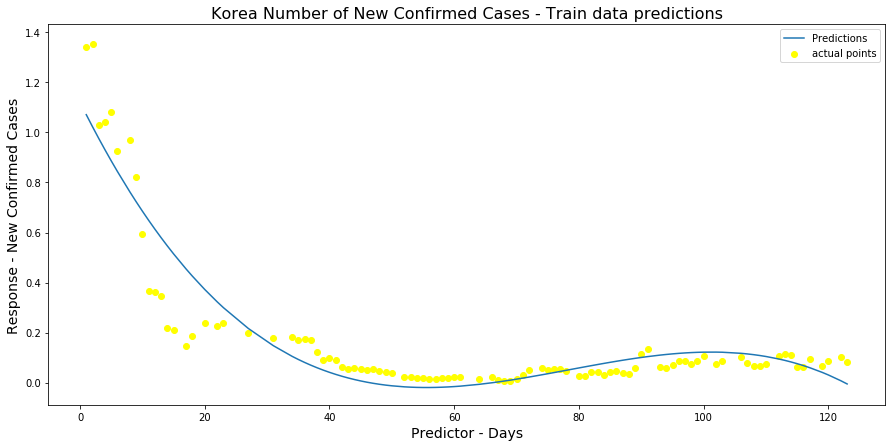

In [91]:
plt.figure(figsize = (15, 7))
plt.scatter(x_train, y_train, c = "yellow", label = "actual points")
plt.plot(x_train.iloc[idx_train].values, y_train_pred[idx_train], label = "Predictions")
plt.title("Korea Number of New Confirmed Cases - Train data predictions", fontsize=16)
plt.xlabel("Predictor - Days", fontsize =14)
plt.ylabel("Response - New Confirmed Cases", fontsize =14)
plt.legend()
plt.show()

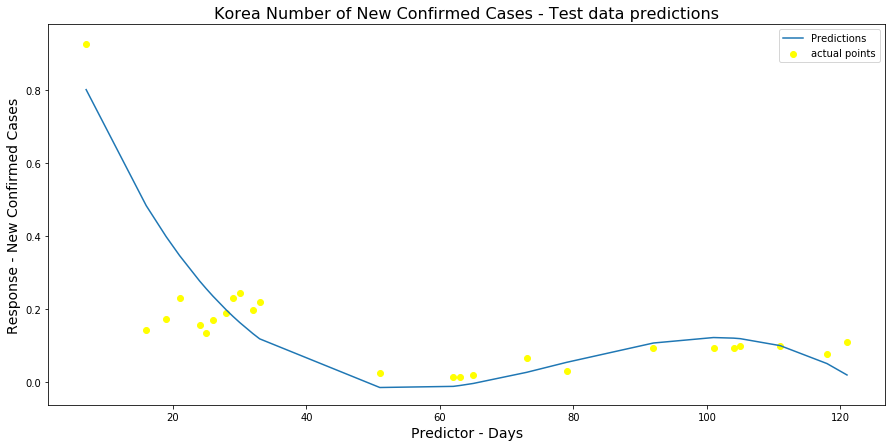

In [92]:
plt.figure(figsize = (15, 7))
plt.scatter(x_test, y_test, c = "yellow", label = "actual points")
plt.plot(x_test.iloc[idx_test].values, y_test_pred[idx_test], label = "Predictions")
plt.title("Korea Number of New Confirmed Cases - Test data predictions", fontsize = 16)
plt.xlabel("Predictor - Days", fontsize =14)
plt.ylabel("Response - New Confirmed Cases", fontsize =14)
plt.legend()
plt.show()

### Italy

Text(0.5, 0, 'Date')

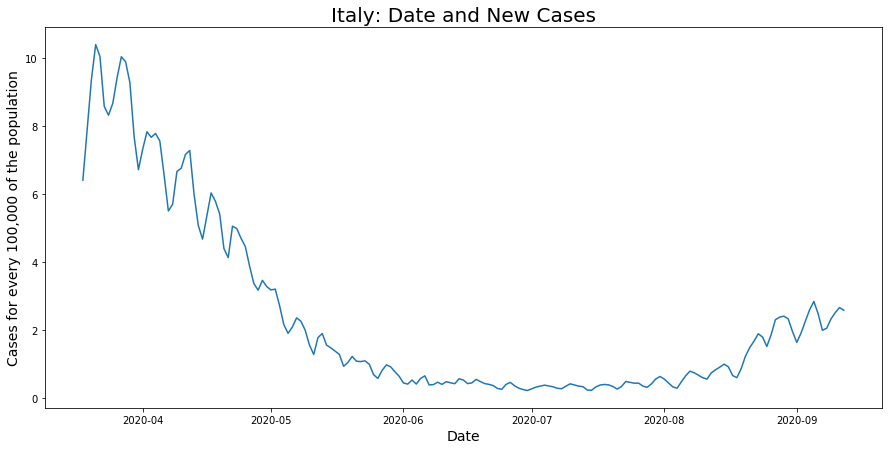

In [93]:
plt.figure(figsize=(15,7))
plt.plot(italy_new.index, italy_new.new_cases_std_2daymean)
plt.title('Italy: Date and New Cases',fontsize = 20)
plt.ylabel('Cases for every 100,000 of the population', fontsize = 14)
plt.xlabel('Date', fontsize = 14)


New Cases have decreased rapidly initially and started to flatten around June. However, it seem like the cases are increasing September onwards. 

In [94]:
#Polynomial Regression 

x = italy_new[['day_count']]
y = italy_new.new_cases_std_2daymean

maxdeg = 50

training_error, validation_error = [],[]

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.8, random_state = 121)

#Run a for loop through the degrees of the polynomial, fit linear regression, predict y values and calculate the training and testing errors and update it to the list
for d in range(maxdeg):
    
    #Compute the polynomial features for the entire data, train data and validation data
    x_poly_train = PolynomialFeatures(d).fit_transform(x_train)
    x_poly_test = PolynomialFeatures(d).fit_transform(x_test)
    x_poly = PolynomialFeatures(d).fit_transform(x)

    lreg = LinearRegression()
    
    mse_score = cross_validate(lreg, x_poly, y, cv=10, scoring = "neg_mean_squared_error", return_train_score = True )
    
    train_score = (-np.mean(mse_score['train_score']))
    test_score = (-np.mean(mse_score['test_score']))

    #Compute the train and validation MSE
    training_error.append(train_score)
    validation_error.append(test_score)


In [95]:
#The best degree with the lowest validation error
min_mse = min(validation_error)
best_degree_it1 = validation_error.index(min_mse)

print("The best degree of the model using validation is",best_degree_it1, "with MSE=", (np.round(min_mse, 3)))


The best degree of the model using validation is 3 with MSE= 0.45


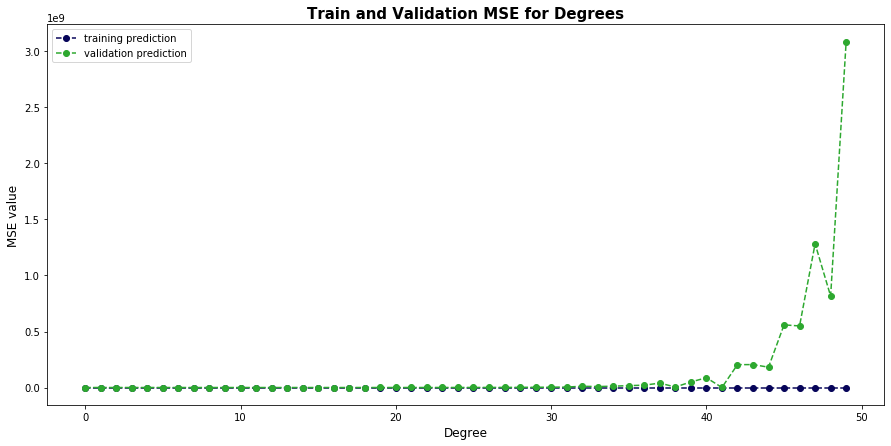

In [96]:
#plotting train vs validation MSE

plt.figure(figsize = (15, 7))
plt.plot(list(range(maxdeg)), training_error, marker = 'o', linestyle = 'dashed', color = "#060459", label = "training prediction")
plt.plot(list(range(maxdeg)), validation_error, marker = 'o', linestyle = 'dashed', color = "#2da82f", label = "validation prediction")
plt.xlabel("Degree", fontsize=12)
plt.ylabel("MSE value", fontsize=12)
plt.title("Train and Validation MSE for Degrees", fontweight="bold", fontsize=15)

plt.legend()

The model with the lowest MSE on the validation data is at degree 3.

In [97]:
x_train_poly = PolynomialFeatures(best_degree_it1).fit_transform(x_train)
x_test_poly = PolynomialFeatures(best_degree_it1).fit_transform(x_test)

italy_model1 = LinearRegression()

italy_model1.fit(x_train_poly, y_train)

y_train_pred = italy_model1.predict(x_train_poly)
y_test_pred = italy_model1.predict(x_test_poly)

residuals_train = (y_train - y_train_pred)
residuals_test = (y_test - y_test_pred)

In [98]:
print("The MSE Value for", best_degree_it1, "degree model is", np.round(mean_squared_error(y_test, y_test_pred),3))

The MSE Value for 3 degree model is 0.176


In [99]:
idx_train = np.argsort(x_train, axis=0).day_count.values
idx_test = np.argsort(x_test, axis=0).day_count.values

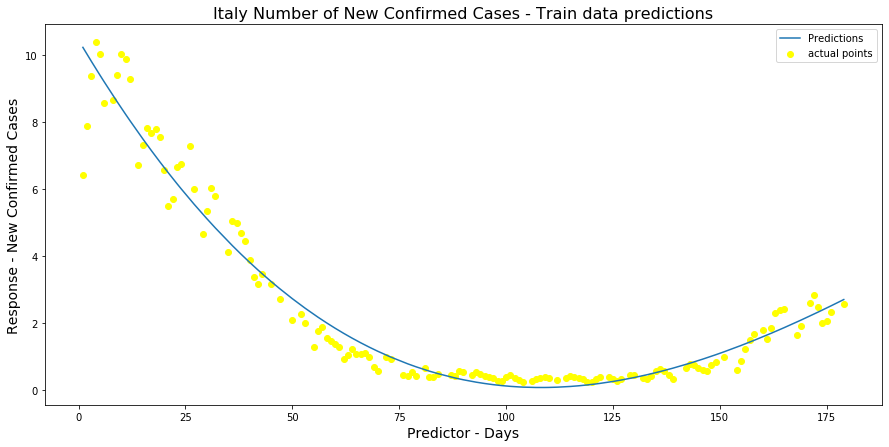

In [100]:
plt.figure(figsize = (15, 7))
plt.scatter(x_train, y_train, c = "yellow", label = "actual points")
plt.plot(x_train.iloc[idx_train].values, y_train_pred[idx_train], label = "Predictions")
plt.title("Italy Number of New Confirmed Cases - Train data predictions", fontsize=16)
plt.xlabel("Predictor - Days", fontsize =14)
plt.ylabel("Response - New Confirmed Cases", fontsize =14)
plt.legend()
plt.show()


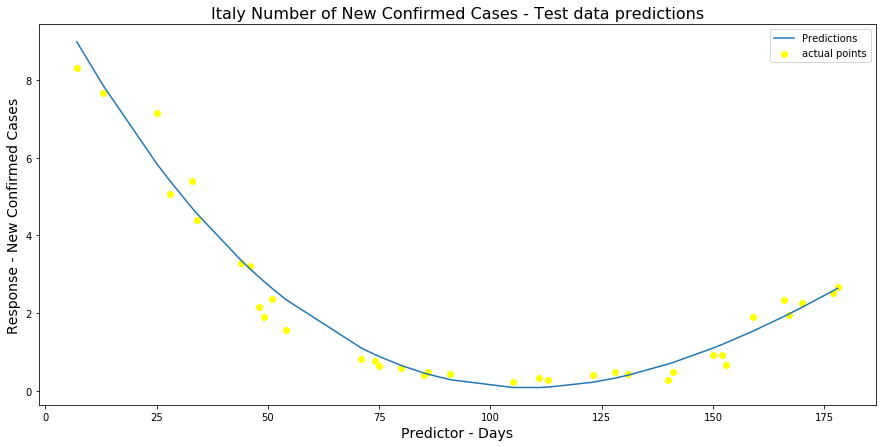

In [101]:
plt.figure(figsize = (15, 7))
plt.scatter(x_test, y_test, c = "yellow", label = "actual points")
plt.plot(x_test.iloc[idx_test].values, y_test_pred[idx_test], label = "Predictions")
plt.title("Italy Number of New Confirmed Cases - Test data predictions", fontsize =16)
plt.xlabel("Predictor - Days", fontsize =14)
plt.ylabel("Response - New Confirmed Cases", fontsize =14)
plt.legend()
plt.show()

### India

Text(0.5, 0, 'Date')

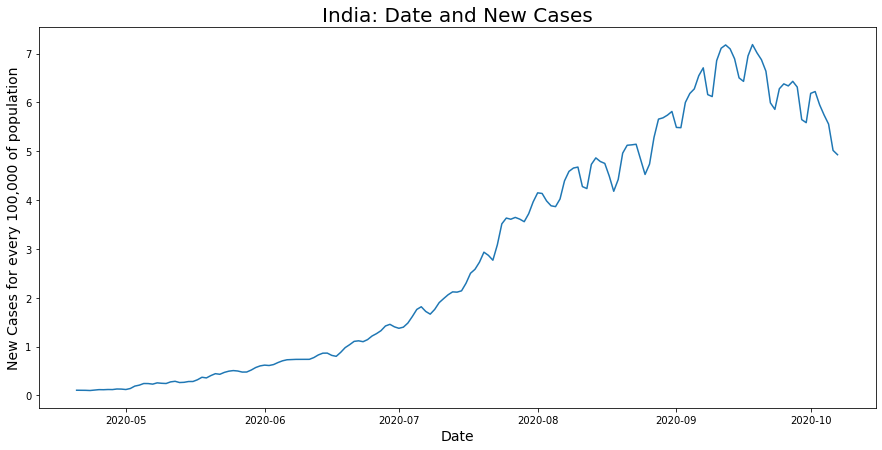

In [102]:
plt.figure(figsize=(15,7))
plt.plot(india_new.index, india_new.new_cases_std_2daymean)
plt.title('India: Date and New Cases',fontsize = 20)
plt.ylabel('New Cases for every 100,000 of population', fontsize = 14)
plt.xlabel('Date', fontsize = 14)

Cases have been increasing consistently througout May to September, after which there seems to be a decrease

In [103]:
#Polynomial Regression 

x = india_new[['day_count']]
y = india_new.new_cases_std_2daymean

maxdeg = 30

training_error, validation_error = [],[]

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.8, random_state = 121)

#Run a for loop through the degrees of the polynomial, fit linear regression, predict y values and calculate the training and testing errors and update it to the list
for d in range(maxdeg):
    
    #Compute the polynomial features for the entire data, train data and validation data
    x_poly_train = PolynomialFeatures(d).fit_transform(x_train)
    x_poly_test = PolynomialFeatures(d).fit_transform(x_test)
    x_poly = PolynomialFeatures(d).fit_transform(x)

    lreg = LinearRegression()
    
    mse_score = cross_validate(lreg, x_poly, y, cv=10, scoring = "neg_mean_squared_error", return_train_score = True )
    
    train_score = (-np.mean(mse_score['train_score']))
    test_score = (-np.mean(mse_score['test_score']))

    #Compute the train and validation MSE
    training_error.append(train_score)
    validation_error.append(test_score)


In [104]:
#The best degree with the lowest validation error
min_mse = min(validation_error)
best_degree_ind1 = validation_error.index(min_mse)

print("The best degree of the model using validation is",best_degree_ind1, "with MSE=", (np.round(min_mse, 3)))

The best degree of the model using validation is 7 with MSE= 0.191


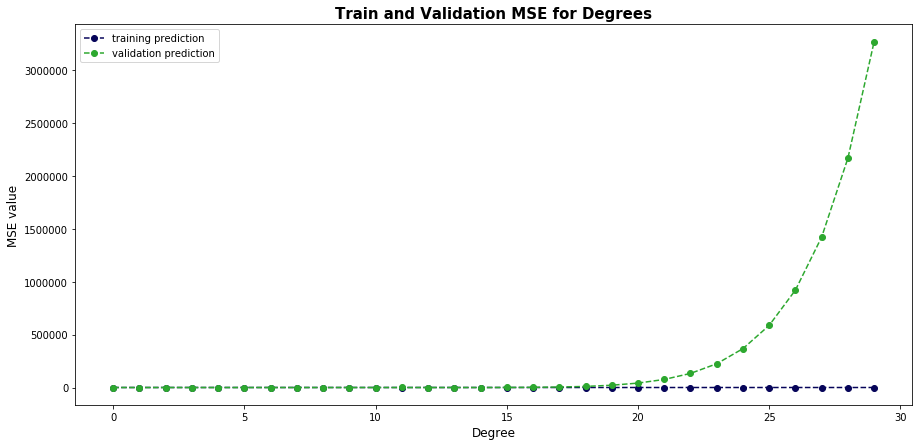

In [105]:
#plotting train vs validation MSE

plt.figure(figsize = (15, 7))
plt.plot(list(range(maxdeg)), training_error, marker = 'o', linestyle = 'dashed', color = "#060459", label = "training prediction")
plt.plot(list(range(maxdeg)), validation_error, marker = 'o', linestyle = 'dashed', color = "#2da82f", label = "validation prediction")
plt.xlabel("Degree", fontsize=12)
plt.ylabel("MSE value", fontsize=12)
plt.title("Train and Validation MSE for Degrees", fontweight="bold", fontsize=15)

plt.legend()

The model with the lowest MSE on the validation data is at degree 7. 

In [106]:
x_train_poly = PolynomialFeatures(best_degree_ind1).fit_transform(x_train)
x_test_poly = PolynomialFeatures(best_degree_ind1).fit_transform(x_test)

india_model1 = LinearRegression()

india_model1.fit(x_train_poly, y_train)

y_train_pred = india_model1.predict(x_train_poly)
y_test_pred = india_model1.predict(x_test_poly)

residuals_train = (y_train - y_train_pred)
residuals_test = (y_test - y_test_pred)

In [107]:
print("The MSE Value for", best_degree_ind1, "degree model is", np.round(mean_squared_error(y_test, y_test_pred),3))

The MSE Value for 7 degree model is 0.067


In [108]:
idx_train = np.argsort(x_train, axis=0).day_count.values
idx_test = np.argsort(x_test, axis=0).day_count.values

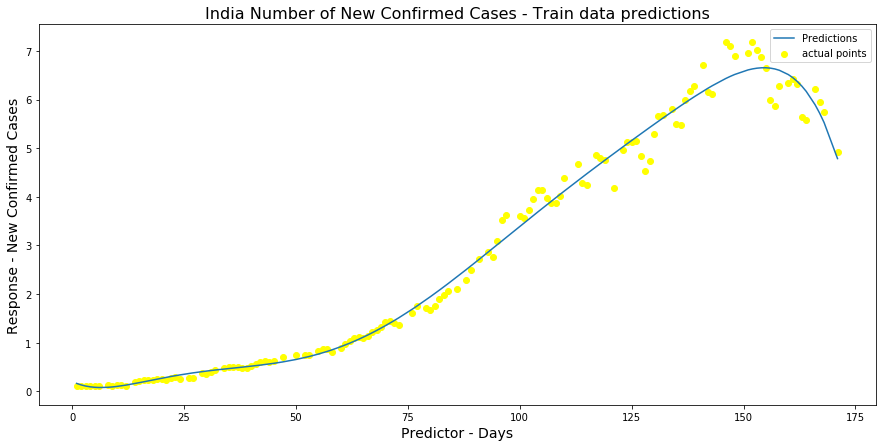

In [109]:
plt.figure(figsize = (15, 7))
plt.scatter(x_train, y_train, c = "yellow", label = "actual points")
plt.plot(x_train.iloc[idx_train].values, y_train_pred[idx_train], label = "Predictions")
plt.title("India Number of New Confirmed Cases - Train data predictions" ,fontsize = 16)
plt.xlabel("Predictor - Days", fontsize =14)
plt.ylabel("Response - New Confirmed Cases", fontsize =14)
plt.legend()
plt.show()


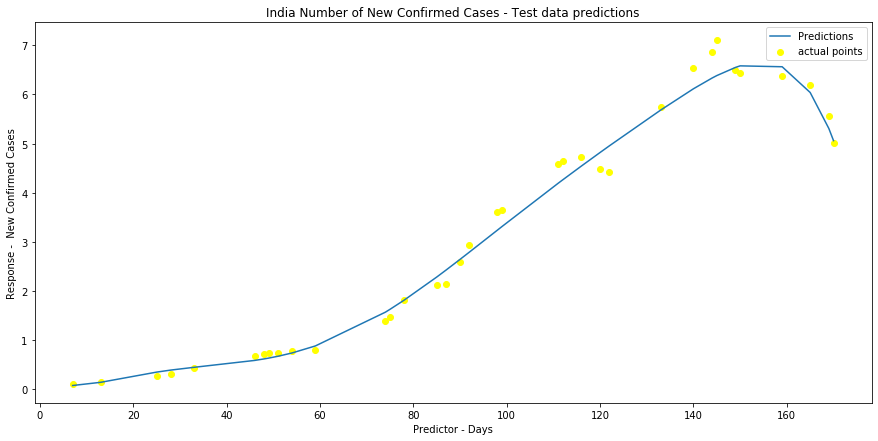

In [110]:
plt.figure(figsize = (15, 7))
plt.scatter(x_test, y_test, c = "yellow", label = "actual points")
plt.plot(x_test.iloc[idx_test].values, y_test_pred[idx_test], label = "Predictions")
plt.title("India Number of New Confirmed Cases - Test data predictions")
plt.xlabel("Predictor - Days")
plt.ylabel("Response -  New Confirmed Cases")
plt.legend()
plt.show()

### Brazil Predictions 

In [111]:
x_test = brazil_new[['day_count']]

x_test_km1 = PolynomialFeatures(best_degree_km1).fit_transform(x_test)
x_test_itm1 = PolynomialFeatures(best_degree_it1).fit_transform(x_test)
x_test_indm1 = PolynomialFeatures(best_degree_ind1).fit_transform(x_test)

Text(0.5, 1.0, 'Number of Positive Cases Across Models')

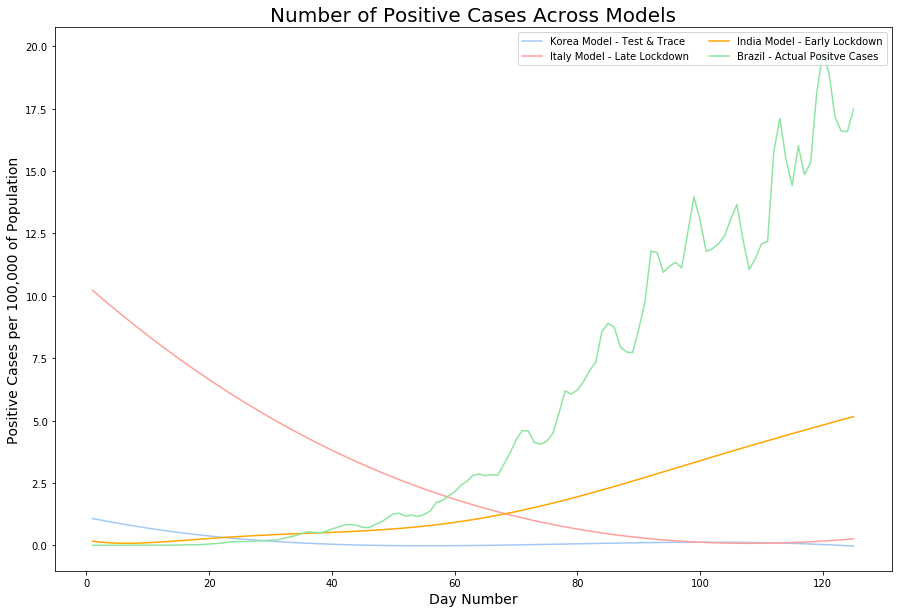

In [112]:
brazil_pred_korea1 = korea_model1.predict(x_test_km1)
brazil_pred_italy1 = italy_model1.predict(x_test_itm1)
brazil_pred_india1 = india_model1.predict(x_test_indm1)


plt.figure(figsize=(15, 10))
plt.plot(brazil_new[['day_count']], brazil_pred_korea1, c='b', label= 'Korea Model - Test & Trace')
plt.plot(brazil_new[['day_count']], brazil_pred_italy1, c='r', label = 'Italy Model - Late Lockdown')
plt.plot(brazil_new[['day_count']], brazil_pred_india1, c='orange', label = 'India Model - Early Lockdown')
plt.plot(brazil_new[['day_count']], brazil_new[['new_cases_std_2daymean']], c='g', label = 'Brazil - Actual Positve Cases')

plt.legend(ncol=2, loc="upper right", frameon=True)
plt.ylabel('Positive Cases per 100,000 of Population', fontsize = 14)
plt.xlabel('Day Number', fontsize = 14)
plt.title('Number of Positive Cases Across Models',fontsize = 20)

**Findings:** When comparing positive cases across models, the Korean Model seems to be working the best in keeping the cases in the same level. Although Italy had a decrease in case to achieve Korea's level, it has significantly taken a longer time. The Indian early lockdown model, managed to keep cases low initially, however as the days progress, the cases have begun to increasing rapidly. 

Text(0.5, 0, 'Model')

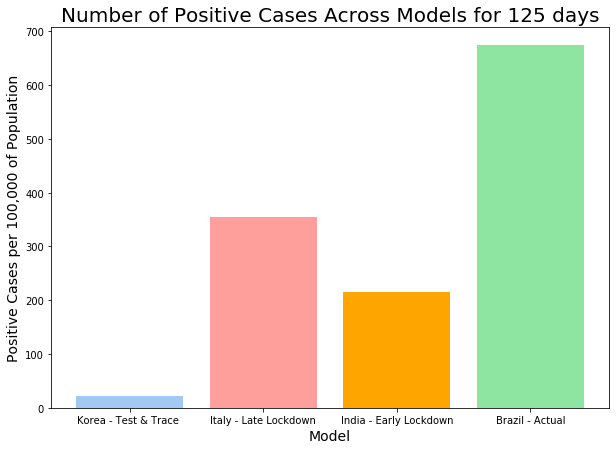

In [113]:
plt.figure(figsize=(10, 7))
plt.bar( "Korea - Test & Trace " , brazil_pred_korea1.sum(), color='b')
plt.bar( "Italy - Late Lockdown" , brazil_pred_italy1.sum(), color ='r')
plt.bar( "India - Early Lockdown" , brazil_pred_india1.sum(), color= 'orange')
plt.bar( "Brazil - Actual" , brazil_new['new_cases_std_2daymean'].sum(), color='g')
plt.title('Number of Positive Cases Across Models for 125 days',fontsize = 20)
plt.ylabel('Positive Cases per 100,000 of Population', fontsize = 14)
plt.xlabel('Model', fontsize = 14)

**Findings:** Looking at the overall number of positive cases for 125 days, the Korean Model has worked the best in controlling the number of positive cases followed by India and then Italy. 

In [114]:
positive_cases = PrettyTable()
positive_cases.field_names = ["Model", "Positive Cases"]
positive_cases.add_row(["Korea: Test & Trace", np.round((brazil_pred_korea1.sum()* brazil_population/100000))])
positive_cases.add_row(["Italy: Late Lockdown", np.round((brazil_pred_italy1.sum()* brazil_population/100000))])
positive_cases.add_row(["India: Early Lockdown", np.round((brazil_pred_india1.sum()* brazil_population/100000))])
positive_cases.add_row(["Brazil - Actual", np.round((brazil_new['new_cases_std_2daymean'].sum()* brazil_population/100000))])

print(positive_cases)

+-----------------------+----------------+
|         Model         | Positive Cases |
+-----------------------+----------------+
|  Korea: Test & Trace  |    44338.0     |
|  Italy: Late Lockdown |    745076.0    |
| India: Early Lockdown |    450292.0    |
|    Brazil - Actual    |   1411997.0    |
+-----------------------+----------------+


**Findings:** The table above shows the number of positive cases with values adjusted to represent the actual numbers in the Brazilian Population.

**Results:** Based on our modelling, India and Korea have lower cases compared to the population. Even though Italy had a higher number of cases initially, the curve is showing a downward trend. India, however, had a lower number of cases intially, but has had a gradual increase in cases over time. Korea has had both a low increases in cases and a consistent curve. 

## 2. Predicting Number of Deaths using Number of Days

## Korea

Text(0.5, 0, 'Date')

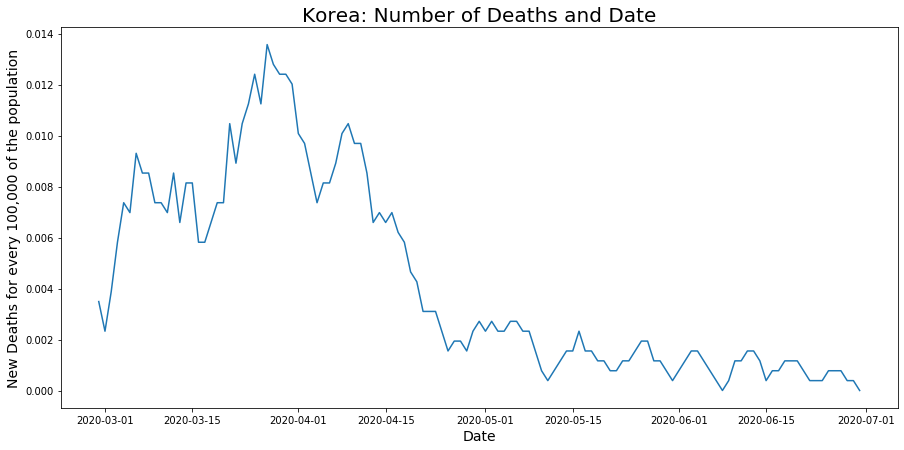

In [115]:
plt.figure(figsize=(15,7))
plt.plot(korea_new.date, korea_new.new_deaths_std_2daymean)
plt.title('Korea: Number of Deaths and Date',fontsize = 20)
plt.ylabel('New Deaths for every 100,000 of the population', fontsize = 14)
plt.xlabel('Date', fontsize = 14)

Korea had high numbers of new deaths intially.  The number of deaths did have sharp decrease like the number of cases, however it seems to have taken them longer. 

In [116]:
#Polynomial Regression 

x = korea_new[['day_count']]
y = korea_new.new_deaths_std_2daymean

maxdeg = 50

training_error, validation_error = [],[]

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.8, random_state = 121)

#Run a for loop through the degrees of the polynomial, fit linear regression, predict y values and calculate the training and testing errors and update it to the list
for d in range(maxdeg):
    
    #Compute the polynomial features for the entire data, train data and validation data
    x_poly_train = PolynomialFeatures(d).fit_transform(x_train)
    x_poly_test = PolynomialFeatures(d).fit_transform(x_test)
    x_poly = PolynomialFeatures(d).fit_transform(x)

    lreg = LinearRegression()
    
    mse_score = cross_validate(lreg, x_poly, y, cv=10, scoring = "neg_mean_squared_error", return_train_score = True )
    
    train_score = (-np.mean(mse_score['train_score']))
    test_score = (-np.mean(mse_score['test_score']))

    #Compute the train and validation MSE
    training_error.append(train_score)
    validation_error.append(test_score)

In [117]:
#The best degree with the lowest validation error
min_mse = min(validation_error)
best_degree_km2 = validation_error.index(min_mse)

print("The best degree of the model using validation is",best_degree_km2, "with MSE=", np.round(min_mse,8))


The best degree of the model using validation is 1 with MSE= 7.19e-06


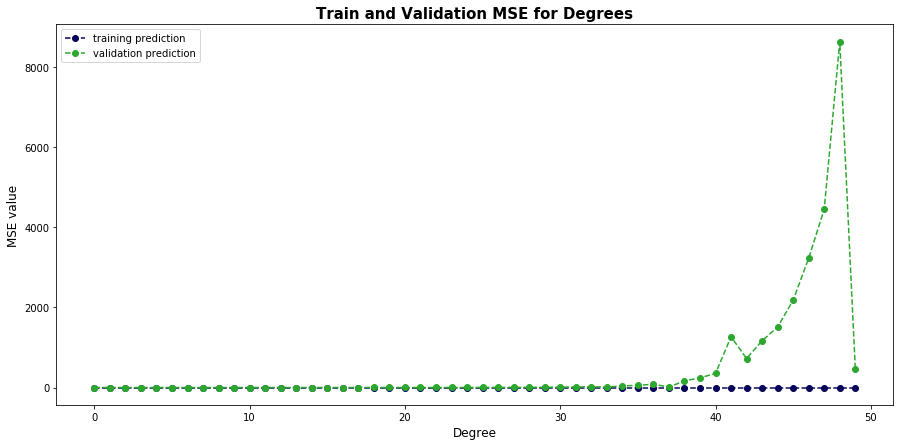

In [118]:
#plotting train vs validation MSE
plt.figure(figsize = (15, 7))
plt.plot(list(range(maxdeg)), training_error, marker = 'o', linestyle = 'dashed', color = "#060459", label = "training prediction")
plt.plot(list(range(maxdeg)), validation_error, marker = 'o', linestyle = 'dashed', color = "#2da82f", label = "validation prediction")
plt.xlabel("Degree", fontsize=12)
plt.ylabel("MSE value", fontsize=12)
plt.title("Train and Validation MSE for Degrees", fontweight="bold", fontsize=15)

plt.legend()

The model with the lowest MSE on the validation data is at degree 1. 

In [119]:
x_train_poly = PolynomialFeatures(best_degree_km2).fit_transform(x_train)
x_test_poly = PolynomialFeatures(best_degree_km2).fit_transform(x_test)

korea_model2 = LinearRegression()

korea_model2.fit(x_train_poly, y_train)

y_train_pred = korea_model2.predict(x_train_poly)
y_test_pred = korea_model2.predict(x_test_poly)

residuals_train = (y_train - y_train_pred)
residuals_test = (y_test - y_test_pred)

In [120]:
print("The MSE Value for", best_degree_km2, "degree model is", np.round(mean_squared_error(y_test, y_test_pred),8))

The MSE Value for 1 degree model is 1.055e-05


In [121]:
idx_train = np.argsort(x_train, axis=0).day_count.values
idx_test = np.argsort(x_test, axis=0).day_count.values

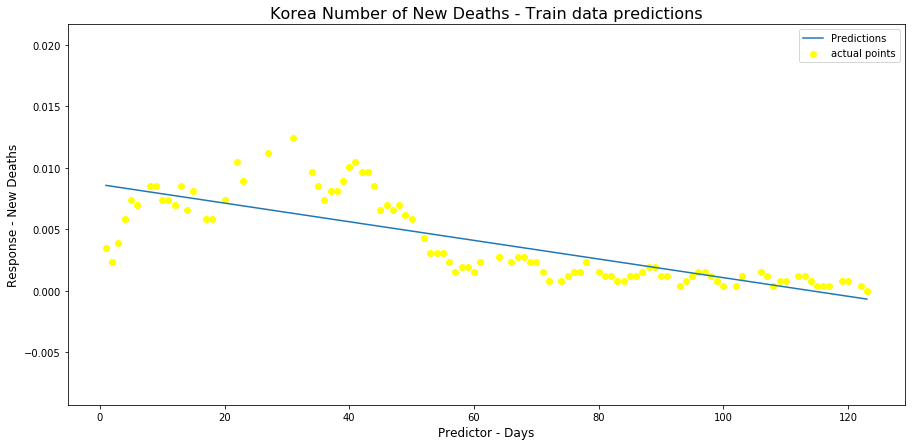

In [122]:
plt.figure(figsize = (15, 7))
plt.scatter(x_train, y_train, c = "yellow", label = "actual points")
plt.plot(x_train.iloc[idx_train].values, y_train_pred[idx_train], label = "Predictions")
plt.title("Korea Number of New Deaths - Train data predictions", fontsize =16)
plt.xlabel("Predictor - Days", fontsize =12)
plt.ylabel("Response - New Deaths", fontsize=12)
plt.legend()
plt.show()

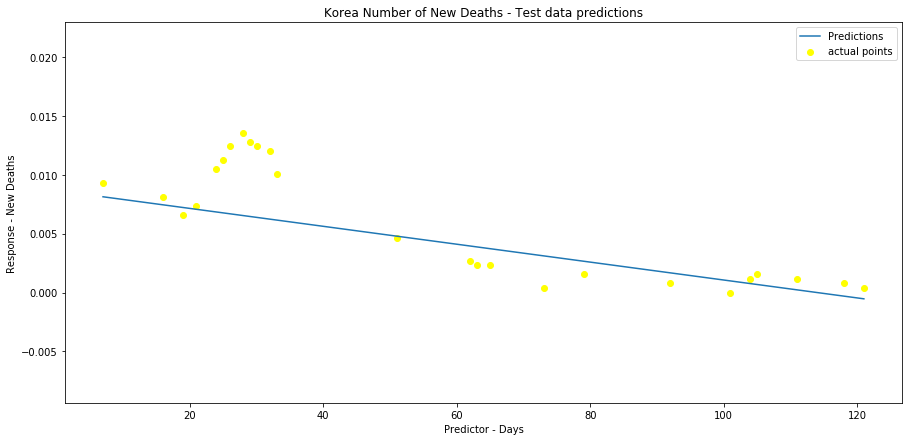

In [123]:
plt.figure(figsize = (15, 7))
plt.scatter(x_test, y_test, c = "yellow", label = "actual points")
plt.plot(x_test.iloc[idx_test].values, y_test_pred[idx_test], label = "Predictions")
plt.title("Korea Number of New Deaths - Test data predictions")
plt.xlabel("Predictor - Days")
plt.ylabel("Response - New Deaths")
plt.legend()
plt.show()

## Italy

Text(0.5, 0, 'Date')

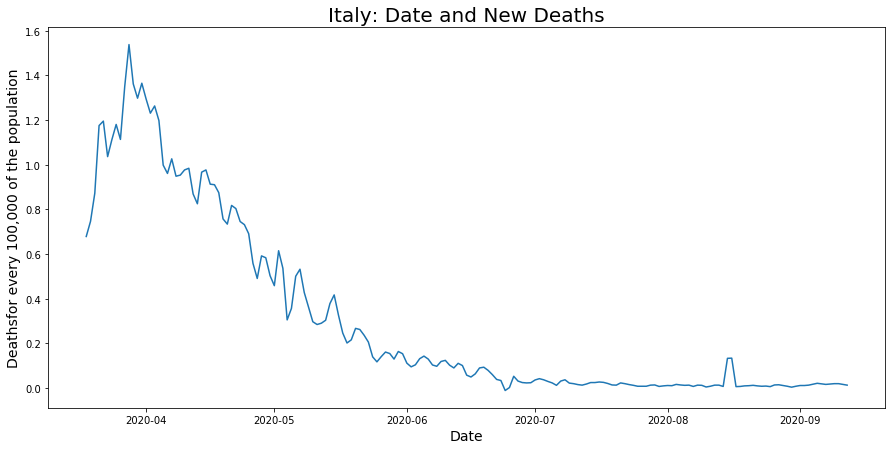

In [124]:
plt.figure(figsize=(15,7))
plt.plot(italy_new.index, italy_new.new_deaths_std_2daymean)
plt.title('Italy: Date and New Deaths',fontsize = 20)
plt.ylabel('Deathsfor every 100,000 of the population', fontsize = 14)
plt.xlabel('Date', fontsize = 14)

New Deaths increased sharply initially and then had rapid decrese. The new deaths started to flatten around June.

In [125]:
#Polynomial Regression 

x = italy_new[['day_count']]
y = italy_new.new_deaths_std_2daymean

maxdeg = 50

training_error, validation_error = [],[]

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.8, random_state = 121)

#Run a for loop through the degrees of the polynomial, fit linear regression, predict y values and calculate the training and testing errors and update it to the list
for d in range(maxdeg):
    
    #Compute the polynomial features for the entire data, train data and validation data
    x_poly_train = PolynomialFeatures(d).fit_transform(x_train)
    x_poly_test = PolynomialFeatures(d).fit_transform(x_test)
    x_poly = PolynomialFeatures(d).fit_transform(x)

    lreg = LinearRegression()
    
    mse_score = cross_validate(lreg, x_poly, y, cv=10, scoring = "neg_mean_squared_error", return_train_score = True )
    
    train_score = (-np.mean(mse_score['train_score']))
    test_score = (-np.mean(mse_score['test_score']))

    #Compute the train and validation MSE
    training_error.append(train_score)
    validation_error.append(test_score)


In [126]:
#The best degree with the lowest validation error
min_mse = min(validation_error)
best_degree_it2 = validation_error.index(min_mse)

print("The best degree of the model using validation is",best_degree_it2, "with MSE=", (np.round(min_mse, 3)))


The best degree of the model using validation is 2 with MSE= 0.017


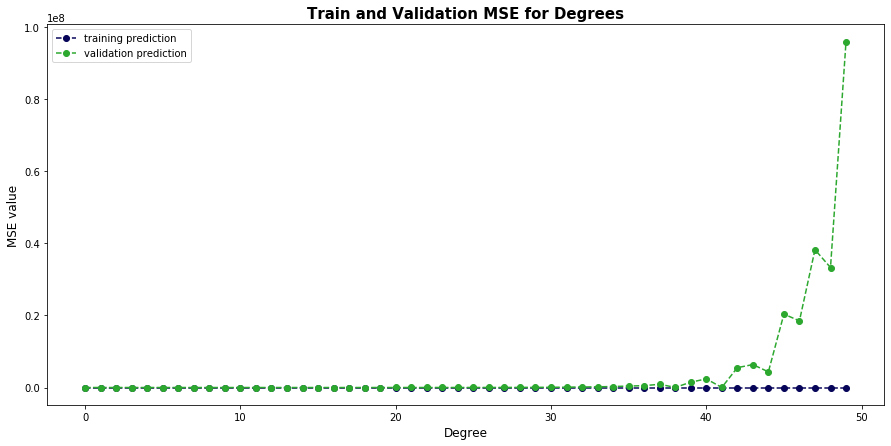

In [127]:
#plotting train vs validation MSE

plt.figure(figsize = (15, 7))
plt.plot(list(range(maxdeg)), training_error, marker = 'o', linestyle = 'dashed', color = "#060459", label = "training prediction")
plt.plot(list(range(maxdeg)), validation_error, marker = 'o', linestyle = 'dashed', color = "#2da82f", label = "validation prediction")
plt.xlabel("Degree", fontsize=12)
plt.ylabel("MSE value", fontsize=12)
plt.title("Train and Validation MSE for Degrees", fontweight="bold", fontsize=15)

plt.legend()

The model with the lowest MSE on the validation data is at degree 2. 

In [128]:
x_train_poly = PolynomialFeatures(best_degree_it2).fit_transform(x_train)
x_test_poly = PolynomialFeatures(best_degree_it2).fit_transform(x_test)

italy_model2 = LinearRegression()

italy_model2.fit(x_train_poly, y_train)

y_train_pred = italy_model2.predict(x_train_poly)
y_test_pred = italy_model2.predict(x_test_poly)

residuals_train = (y_train - y_train_pred)
residuals_test = (y_test - y_test_pred)

In [129]:
print("The best degree of the model using validation is",best_degree_it2, "with MSE=", np.round(min_mse,8))


The best degree of the model using validation is 2 with MSE= 0.01669663


In [130]:
idx_train = np.argsort(x_train, axis=0).day_count.values
idx_test = np.argsort(x_test, axis=0).day_count.values

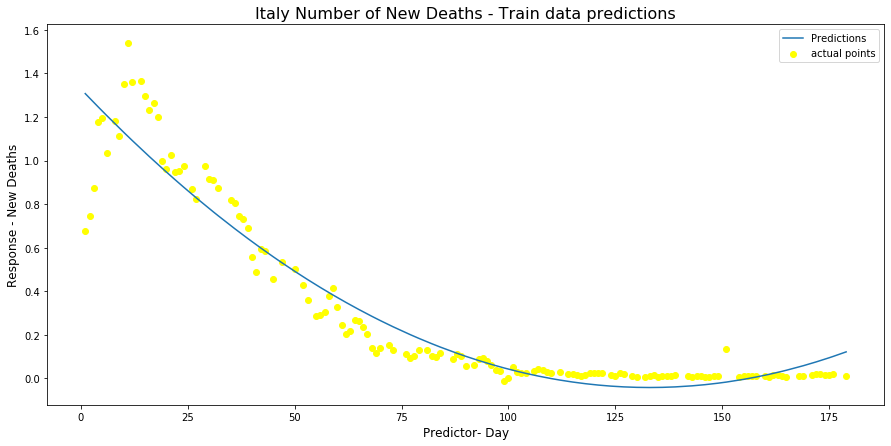

In [131]:
plt.figure(figsize = (15, 7))
plt.scatter(x_train, y_train, c = "yellow", label = "actual points")
plt.plot(x_train.iloc[idx_train].values, y_train_pred[idx_train], label = "Predictions")
plt.title("Italy Number of New Deaths - Train data predictions", fontsize =16)
plt.xlabel("Predictor- Day", fontsize = 12)
plt.ylabel("Response - New Deaths", fontsize =12)
plt.legend()
plt.show()

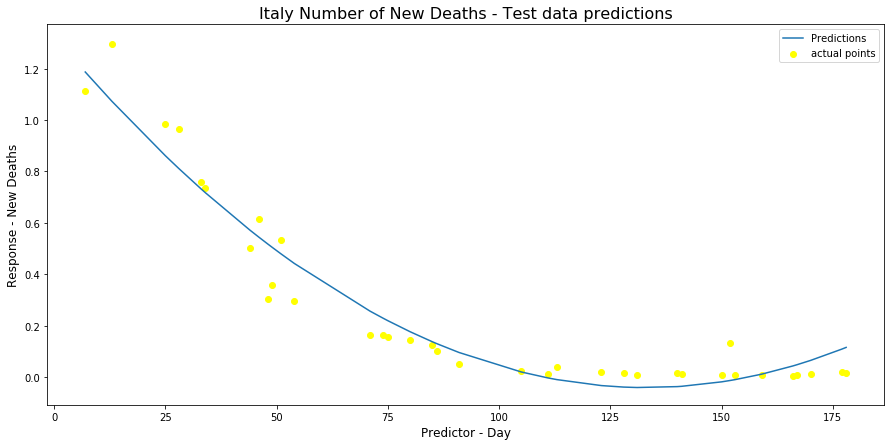

In [132]:
plt.figure(figsize = (15, 7))
plt.scatter(x_test, y_test, c = "yellow", label = "actual points")
plt.plot(x_test.iloc[idx_test].values, y_test_pred[idx_test], label = "Predictions")
plt.title("Italy Number of New Deaths - Test data predictions", fontsize =16)
plt.xlabel("Predictor - Day", fontsize =12)
plt.ylabel("Response - New Deaths", fontsize=12)
plt.legend()
plt.show()

### India

Text(0.5, 0, 'Date')

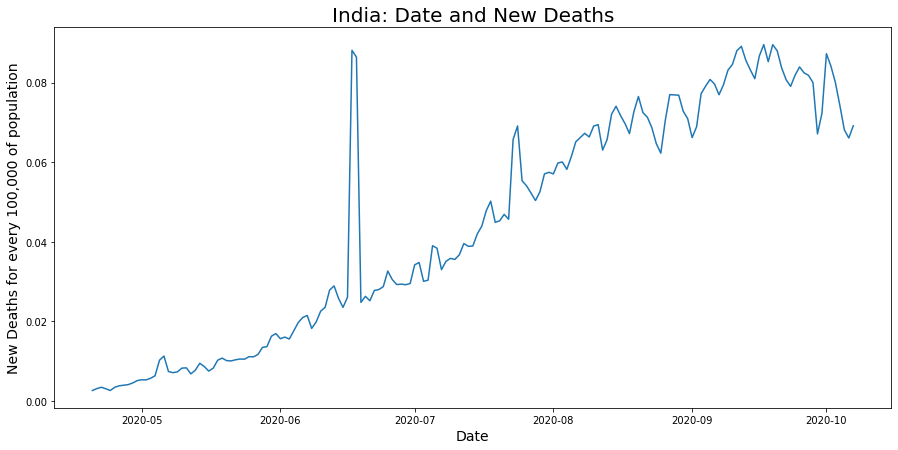

In [133]:
plt.figure(figsize=(15,7))
plt.plot(india_new.index, india_new.new_deaths_std_2daymean)
plt.title('India: Date and New Deaths',fontsize = 20)
plt.ylabel('New Deaths for every 100,000 of population', fontsize = 14)
plt.xlabel('Date', fontsize = 14)

Deaths have been increasing consistently througout May to September, except for a sometime in mid-june where there is sharp rise and decrease. 

In [134]:
#Polynomial Regression 

x = india_new[['day_count']]
y = india_new.new_deaths_std_2daymean

maxdeg = 30

training_error, validation_error = [],[]

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.8, random_state = 121)

#Run a for loop through the degrees of the polynomial, fit linear regression, predict y values and calculate the training and testing errors and update it to the list
for d in range(maxdeg):
    
    #Compute the polynomial features for the entire data, train data and validation data
    x_poly_train = PolynomialFeatures(d).fit_transform(x_train)
    x_poly_test = PolynomialFeatures(d).fit_transform(x_test)
    x_poly = PolynomialFeatures(d).fit_transform(x)

    lreg = LinearRegression()
    
    mse_score = cross_validate(lreg, x_poly, y, cv=10, scoring = "neg_mean_squared_error", return_train_score = True )
    
    train_score = (-np.mean(mse_score['train_score']))
    test_score = (-np.mean(mse_score['test_score']))

    #Compute the train and validation MSE
    training_error.append(train_score)
    validation_error.append(test_score)


In [135]:
#The best degree with the lowest validation error
min_mse = min(validation_error)
best_degree_ind2 = validation_error.index(min_mse)

print("The best degree of the model using validation is",best_degree_ind2, "with MSE=", (np.round(min_mse, 8)))

The best degree of the model using validation is 3 with MSE= 9.346e-05


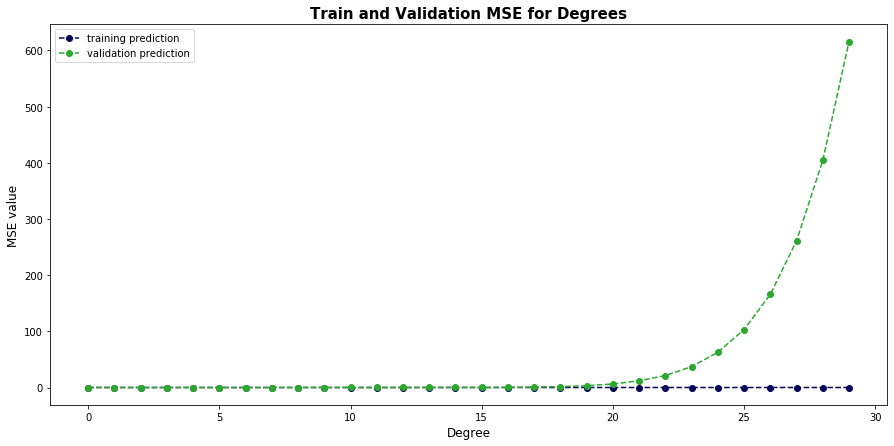

In [136]:
#plotting train vs validation MSE

plt.figure(figsize = (15, 7))
plt.plot(list(range(maxdeg)), training_error, marker = 'o', linestyle = 'dashed', color = "#060459", label = "training prediction")
plt.plot(list(range(maxdeg)), validation_error, marker = 'o', linestyle = 'dashed', color = "#2da82f", label = "validation prediction")
plt.xlabel("Degree", fontsize=12)
plt.ylabel("MSE value", fontsize=12)
plt.title("Train and Validation MSE for Degrees", fontweight="bold", fontsize=15)

plt.legend()

The model with the lowest MSE on the validation data is at degree 3.

In [137]:
x_train_poly = PolynomialFeatures(best_degree_ind2).fit_transform(x_train)
x_test_poly = PolynomialFeatures(best_degree_ind2).fit_transform(x_test)

india_model2 = LinearRegression()

india_model2.fit(x_train_poly, y_train)

y_train_pred = india_model2.predict(x_train_poly)
y_test_pred = india_model2.predict(x_test_poly)

residuals_train = (y_train - y_train_pred)
residuals_test = (y_test - y_test_pred)

In [138]:
print("The best degree of the model using validation is",best_degree_ind2, "with MSE=", np.round(min_mse,8))


The best degree of the model using validation is 3 with MSE= 9.346e-05


In [139]:
idx_train = np.argsort(x_train, axis=0).day_count.values
idx_test = np.argsort(x_test, axis=0).day_count.values

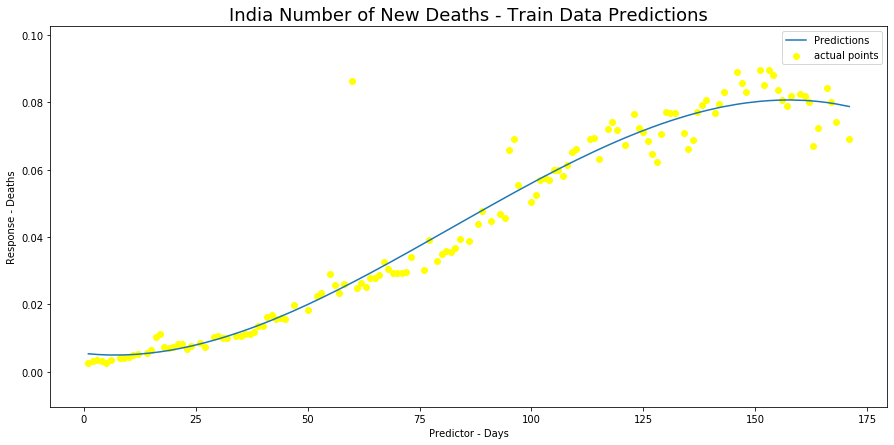

In [140]:
plt.figure(figsize = (15, 7))
plt.scatter(x_train, y_train, c = "yellow", label = "actual points")
plt.plot(x_train.iloc[idx_train].values, y_train_pred[idx_train], label = "Predictions")
plt.title("India Number of New Deaths - Train Data Predictions", fontsize =18)
plt.xlabel("Predictor - Days")
plt.ylabel("Response - Deaths")
plt.legend()
plt.show()

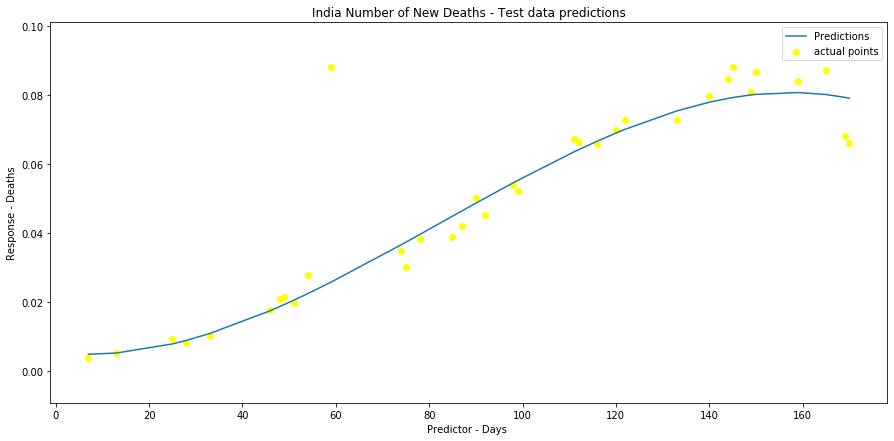

In [141]:
plt.figure(figsize = (15, 7))
plt.scatter(x_test, y_test, c = "yellow", label = "actual points")
plt.plot(x_test.iloc[idx_test].values, y_test_pred[idx_test], label = "Predictions")
plt.title("India Number of New Deaths - Test data predictions")
plt.xlabel("Predictor - Days ")
plt.ylabel("Response - Deaths")
plt.legend()
plt.show()

## Brazil Predictions

In [142]:
x_test = brazil_new[['day_count']]

x_test_km2 = PolynomialFeatures(best_degree_km2).fit_transform(x_test)
x_test_itm2 = PolynomialFeatures(best_degree_it2).fit_transform(x_test)
x_test_indm2 = PolynomialFeatures(best_degree_ind2).fit_transform(x_test)


brazil_pred_korea2 = korea_model2.predict(x_test_km2)
brazil_pred_italy2 = italy_model2.predict(x_test_itm2)
brazil_pred_india2 = india_model2.predict(x_test_indm2)


Text(0.5, 1.0, 'Number of Deaths Cases Across Models')

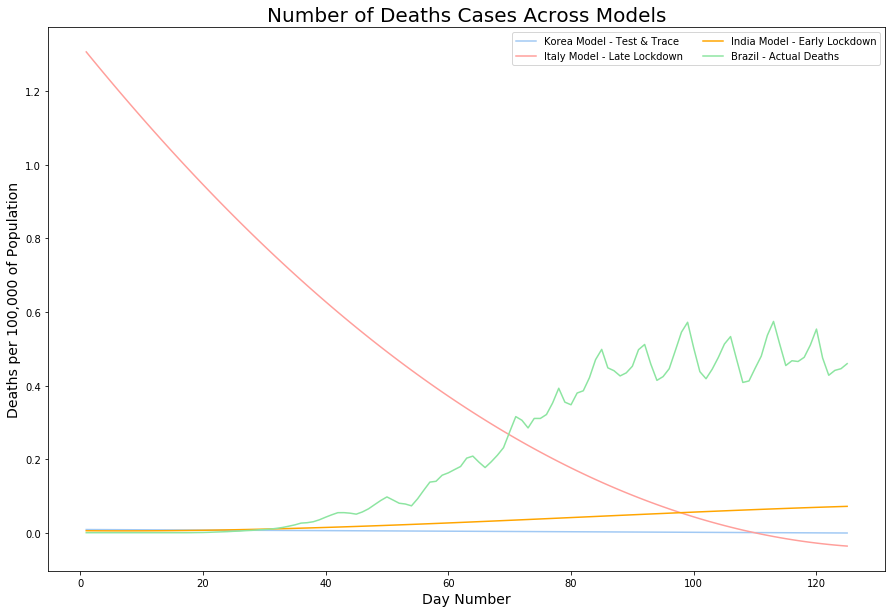

In [143]:
plt.figure(figsize=(15, 10))
plt.plot(brazil_new[['day_count']], brazil_pred_korea2, c='b', label= 'Korea Model - Test & Trace')
plt.plot(brazil_new[['day_count']], brazil_pred_italy2, c='r', label = 'Italy Model - Late Lockdown')
plt.plot(brazil_new[['day_count']], brazil_pred_india2, c='orange', label = 'India Model - Early Lockdown')
plt.plot(brazil_new[['day_count']], brazil_new[['new_deaths_std_2daymean']], c='g', label = 'Brazil - Actual Deaths')

plt.legend(ncol=2, loc="upper right", frameon=True)
plt.ylabel('Deaths per 100,000 of Population', fontsize = 14)
plt.xlabel('Day Number', fontsize = 14)
plt.title('Number of Deaths Cases Across Models',fontsize = 20)

**Findings:** When comparing the number of deaths cases across models, the Korean model has again worked the best in terms of both sustainace as well as low numbers. Although the Indian model has also been good, it has however had an increase in death as the days have progressed. The Italy model has had very high numbers of deaths, and it has taken over 100 days to reach the korean model levels. 


Text(0.5, 0, 'Model')

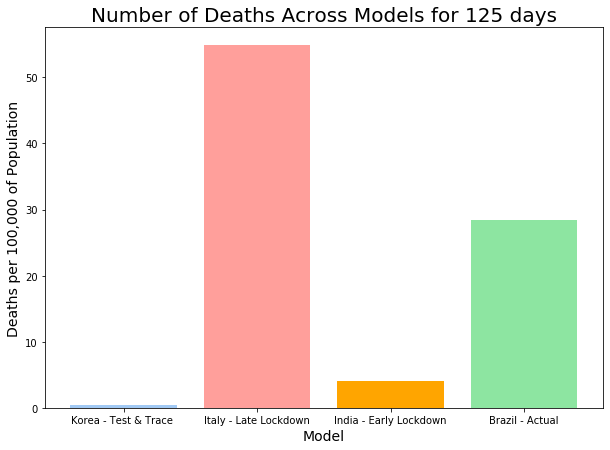

In [144]:
plt.figure(figsize=(10, 7))
plt.bar( "Korea - Test & Trace " , brazil_pred_korea2.sum(), color='b')
plt.bar( "Italy - Late Lockdown" , brazil_pred_italy2.sum(), color ='r')
plt.bar( "India - Early Lockdown" , brazil_pred_india2.sum(), color = 'orange')
plt.bar( "Brazil - Actual" , brazil_new['new_deaths_std_2daymean'].sum(), color = 'g')
plt.title('Number of Deaths Across Models for 125 days',fontsize = 20)
plt.ylabel('Deaths per 100,000 of Population', fontsize = 14)
plt.xlabel('Model', fontsize = 14)

**Findings:** The Korean model has had the lowest number of deaths for 125 days, followed by India. The Italy model has had the highest number of deaths, higher than the actual numbers in brazil. 

In [145]:
deaths = PrettyTable()
deaths.field_names = ["Model", "Deaths"]
deaths.add_row(["Korea: Test & Trace", np.round((brazil_pred_korea2.sum()* brazil_population/100000))])
deaths.add_row(["Italy: Late Lockdown", np.round((brazil_pred_italy2.sum()* brazil_population/100000))])
deaths.add_row(["India: Early Lockdown", np.round((brazil_pred_india2.sum()* brazil_population/100000))])
deaths.add_row(["Brazil - Actual", np.round((brazil_new['new_deaths_std_2daymean'].sum()* brazil_population/100000))])

print(deaths)

+-----------------------+----------+
|         Model         |  Deaths  |
+-----------------------+----------+
|  Korea: Test & Trace  |  1013.0  |
|  Italy: Late Lockdown | 114893.0 |
| India: Early Lockdown |  8368.0  |
|    Brazil - Actual    | 59609.0  |
+-----------------------+----------+


**Findings:** The table above shows the number of deaths that have been adjusted to represent the actual numbers in the Brazilian Populations

**Result:**  Based on the previous disccussion, the Korea Model has worked the best in terms of low death numbers as well as consistency in maintaining the same value. Although the India model is in par with the Korea model, it has had slight surge in cases as the days progress. The Italy model has a downward curve, and reaches korea model's death levels. However, it has taken the model over 100 days for it do so. 

### Daily Lives Saved per Day by Model

We will be looking at daily lives saved (or lives lost) if Brazil were to adopt each of the three models. This is done on a per day basis. 

Lives saved is defined as the additional lives that are saved per day  compared to the brazil's actual death numbers. Lives lost is the additional death numbers compared to the Brazil's actual number of deaths per day.

In [146]:
day_wise = pd.DataFrame({"korea_model_deaths":brazil_pred_korea2, "italy_model_deaths":brazil_pred_italy2, "india_model_deaths":brazil_pred_india2})
day_wise['brazil_actual_deaths'] = brazil_new['new_deaths_std_2daymean']

day_wise['korea_lives_saved'] = (day_wise['brazil_actual_deaths'].sub(day_wise['korea_model_deaths'], axis = 0) * brazil_population/100000)
day_wise['italy_lives_saved'] = (day_wise['brazil_actual_deaths'].sub(day_wise['italy_model_deaths'], axis = 0) * brazil_population/100000) 
day_wise['india_lives_saved'] = (day_wise['brazil_actual_deaths'].sub(day_wise['india_model_deaths'], axis = 0) * brazil_population/100000)

day_wise['day_count'] = range(1, 1 + len(day_wise))


In [147]:
#Using color coding to differeniate between lives saved and lives lost
def bar_color(df,color1,color2):
    return np.where(df.values>0,color1,color2).T

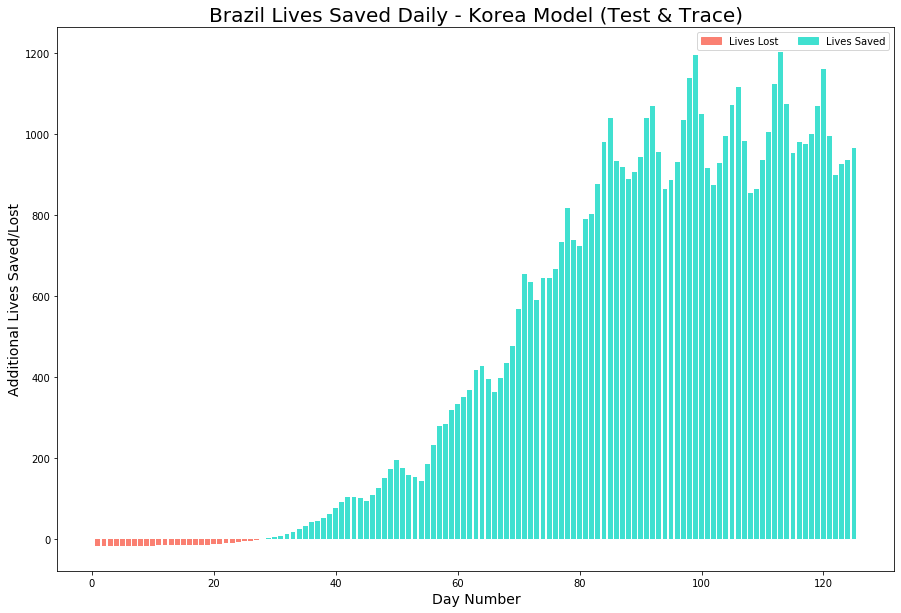

In [148]:
plt.figure(figsize=(15, 10))
plt.bar(day_wise['day_count'], day_wise['korea_lives_saved'], color=bar_color(day_wise['korea_lives_saved'],'turquoise','salmon') )
plt.ylabel('Additional Lives Saved/Lost', fontsize = 14)
plt.xlabel('Day Number', fontsize = 14)
plt.title('Brazil Lives Saved Daily - Korea Model (Test & Trace)',fontsize = 20)
red_patch = mpatches.Patch(color='salmon', label='Lives Lost')
blue_patch = mpatches.Patch(color='turquoise', label='Lives Saved')
plt.legend(handles=[red_patch, blue_patch], ncol=2, loc="upper right", frameon=True)

**Findings:** The Korean Test & Trace model has had a few additional deaths initially, but the model is quick to save lives. It takes around 25 days to realise lives saved. 

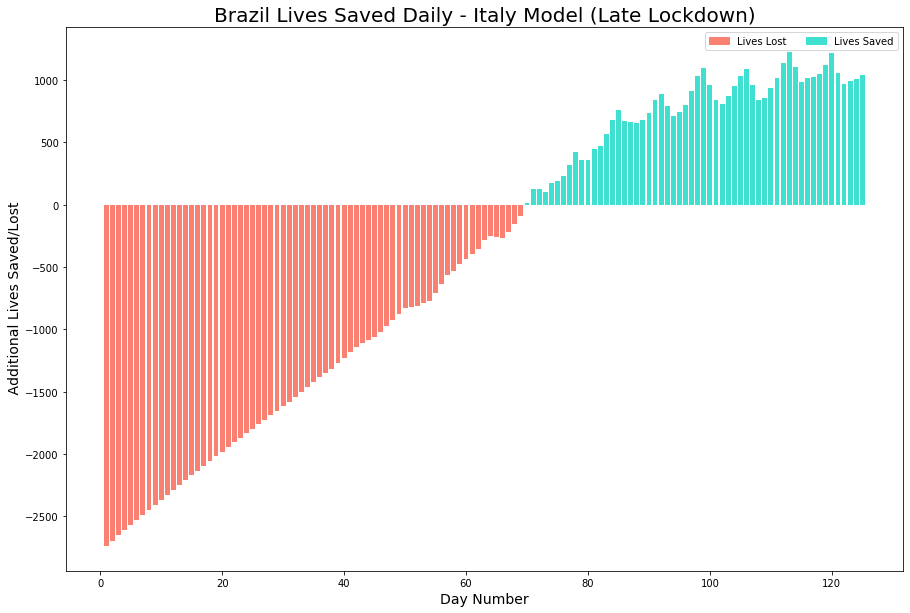

In [149]:
plt.figure(figsize=(15, 10))
plt.bar(day_wise['day_count'], day_wise['italy_lives_saved'], color=bar_color(day_wise['italy_lives_saved'],'turquoise','salmon') )
plt.ylabel(' Additional Lives Saved/Lost', fontsize = 14)
plt.xlabel('Day Number', fontsize = 14)
plt.title('Brazil Lives Saved Daily - Italy Model (Late Lockdown)',fontsize = 20)
red_patch = mpatches.Patch(color='salmon', label='Lives Lost')
blue_patch = mpatches.Patch(color='turquoise', label='Lives Saved')
plt.legend(handles=[red_patch, blue_patch], ncol=2, loc="upper right", frameon=True)

**Findings:** The Italy Late Lockdown model there are a high numbers deaths during the early days and the model takes a long time to start saving lives. It takes around 70 days to realiise lives saved. 

<Figure size 1080x720 with 0 Axes>

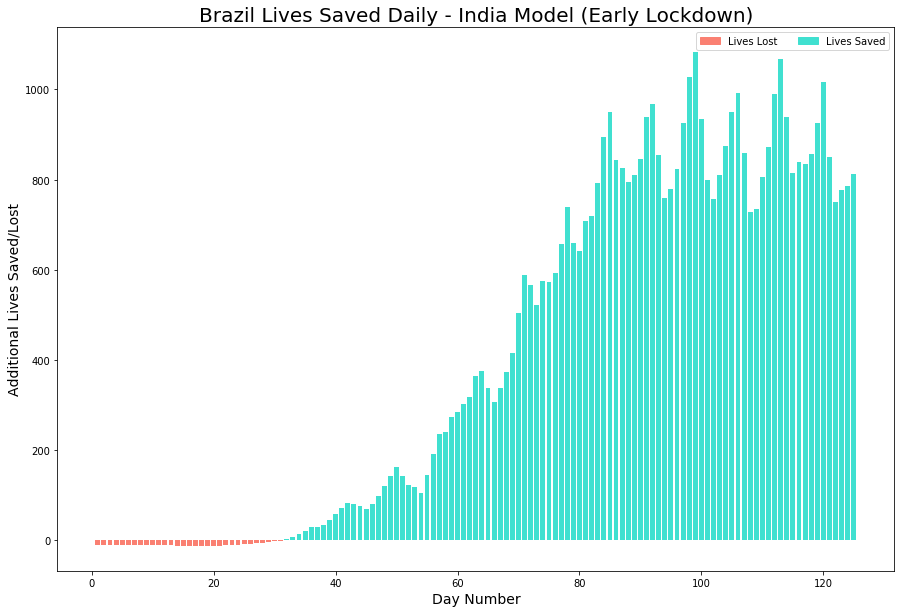

In [150]:
plt.figure(figsize=(15, 10))

plt.figure(figsize=(15, 10))
plt.bar(day_wise['day_count'], day_wise['india_lives_saved'], color= bar_color(day_wise['india_lives_saved'],'turquoise','salmon') )
plt.ylabel('Additional Lives Saved/Lost', fontsize = 14)
plt.xlabel('Day Number', fontsize = 14)
plt.title('Brazil Lives Saved Daily - India Model (Early Lockdown)',fontsize = 20)
red_patch = mpatches.Patch(color='salmon', label='Lives Lost')
blue_patch = mpatches.Patch(color='turquoise', label='Lives Saved')
plt.legend(handles=[red_patch, blue_patch], ncol=2, loc="upper right", frameon=True)

**Findings:** The Indian Early Lockdown model has had a few additional deaths initially, but the model is also very quick to save lives. It takes around 25 days to realise lives saved. 

**Result:** When comparing between the three models, it is evident the that the Italy model has performed the worst. It has not only saved the fewest lives, but also has taken the longest to move from the lives lost phase to the lives saved phase. The Indian and Korean models have taken similar amounts of time to start seeing lives saved, however,the Korean model has had a higher number overall lives saved compared to India. 

## 3. Predicting Death Rate using Number of Days

## Korea

Text(0.5, 0, 'Date')

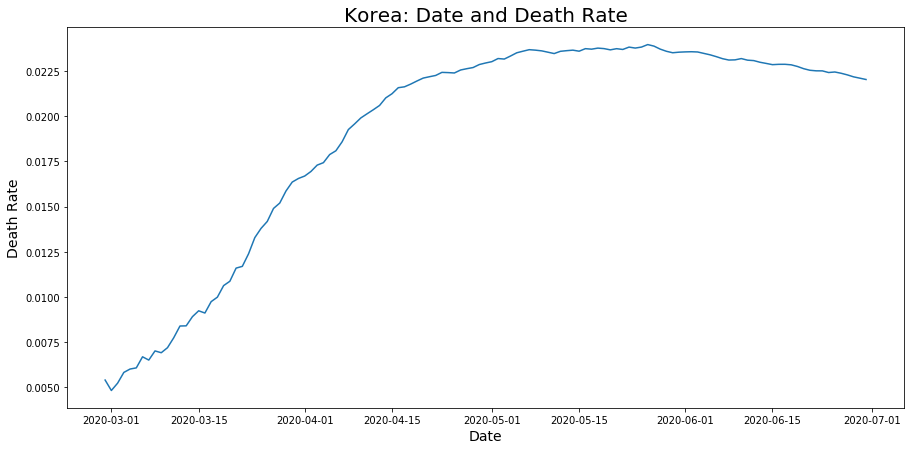

In [151]:
plt.figure(figsize=(15,7))
plt.plot(korea_new.date, korea_new.death_rate)
plt.title('Korea: Date and Death Rate',fontsize = 20)
plt.ylabel('Death Rate', fontsize = 14)
plt.xlabel('Date', fontsize = 14)

The death rate increased at an increasing rate initially, but after May the curve has flattened and the death rate has remained somewhat consistent. 

In [152]:
#Polynomial Regression 

x = korea_new[['day_count']]
y = korea_new.death_rate

maxdeg = 50

training_error, validation_error = [],[]

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.8, random_state = 121)

#Run a for loop through the degrees of the polynomial, fit linear regression, predict y values and calculate the training and testing errors and update it to the list
for d in range(maxdeg):
    
    #Compute the polynomial features for the entire data, train data and validation data
    x_poly_train = PolynomialFeatures(d).fit_transform(x_train)
    x_poly_test = PolynomialFeatures(d).fit_transform(x_test)
    x_poly = PolynomialFeatures(d).fit_transform(x)

    lreg = LinearRegression()
    
    mse_score = cross_validate(lreg, x_poly, y, cv=10, scoring = "neg_mean_squared_error", return_train_score = True )
    
    train_score = (-np.mean(mse_score['train_score']))
    test_score = (-np.mean(mse_score['test_score']))

    #Compute the train and validation MSE
    training_error.append(train_score)
    validation_error.append(test_score)


In [153]:
#The best degree with the lowest validation error
min_mse = min(validation_error)
best_degree_km3 = validation_error.index(min_mse)
print("The best degree of the model using validation is",best_degree_km3, "with MSE=", np.round(min_mse,8))


The best degree of the model using validation is 6 with MSE= 2.9e-07


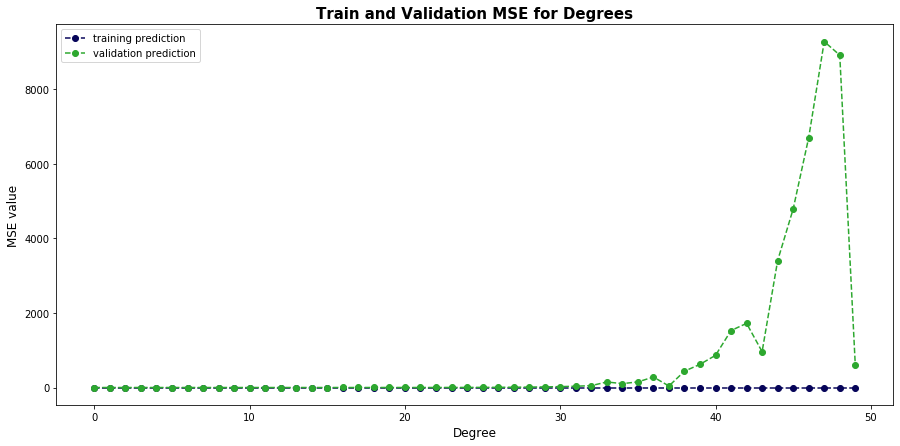

In [154]:
#plotting train vs validation MSE
plt.figure(figsize = (15, 7))
plt.plot(list(range(maxdeg)), training_error, marker = 'o', linestyle = 'dashed', color = "#060459", label = "training prediction")
plt.plot(list(range(maxdeg)), validation_error, marker = 'o', linestyle = 'dashed', color = "#2da82f", label = "validation prediction")
plt.xlabel("Degree", fontsize=12)
plt.ylabel("MSE value", fontsize=12)
plt.title("Train and Validation MSE for Degrees", fontweight="bold", fontsize=15)

plt.legend()

The model with the lowest MSE on the validation data is at degree 6. 

In [155]:
x_train_poly = PolynomialFeatures(best_degree_km3).fit_transform(x_train)
x_test_poly = PolynomialFeatures(best_degree_km3).fit_transform(x_test)

korea_model3 = LinearRegression()

korea_model3.fit(x_train_poly, y_train)

y_train_pred = korea_model3.predict(x_train_poly)
y_test_pred = korea_model3.predict(x_test_poly)

residuals_train = (y_train - y_train_pred)
residuals_test = (y_test - y_test_pred)

In [156]:
print("The best degree of the model using validation is",best_degree_km3, "with MSE=", np.round(min_mse,3))


The best degree of the model using validation is 6 with MSE= 0.0


In [157]:
idx_train = np.argsort(x_train, axis=0).day_count.values
idx_test = np.argsort(x_test, axis=0).day_count.values

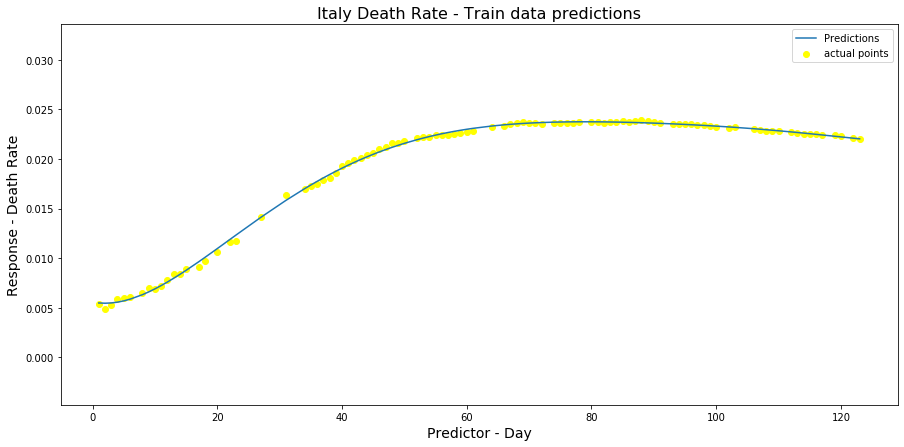

In [158]:
plt.figure(figsize = (15, 7))
plt.scatter(x_train, y_train, c = "yellow", label = "actual points")
plt.plot(x_train.iloc[idx_train].values, y_train_pred[idx_train], label = "Predictions")
plt.title("Italy Death Rate - Train data predictions", fontsize = 16)
plt.xlabel("Predictor - Day", fontsize= 14)
plt.ylabel("Response - Death Rate", fontsize=14)
plt.legend()
plt.show()

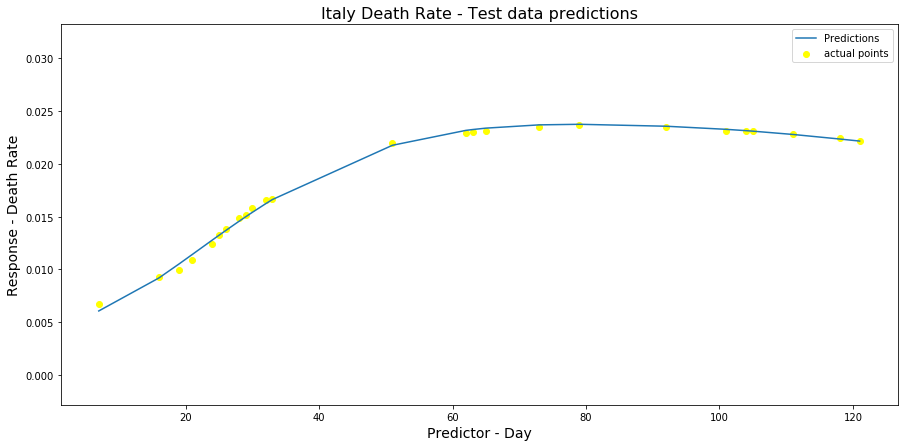

In [159]:
plt.figure(figsize = (15, 7))
plt.scatter(x_test, y_test, c = "yellow", label = "actual points")
plt.plot(x_test.iloc[idx_test].values, y_test_pred[idx_test], label = "Predictions")
plt.title("Italy Death Rate - Test data predictions", fontsize=16)
plt.xlabel("Predictor - Day", fontsize=14)
plt.ylabel("Response - Death Rate", fontsize=14)
plt.legend()
plt.show()

## Italy

Text(0.5, 0, 'Date')

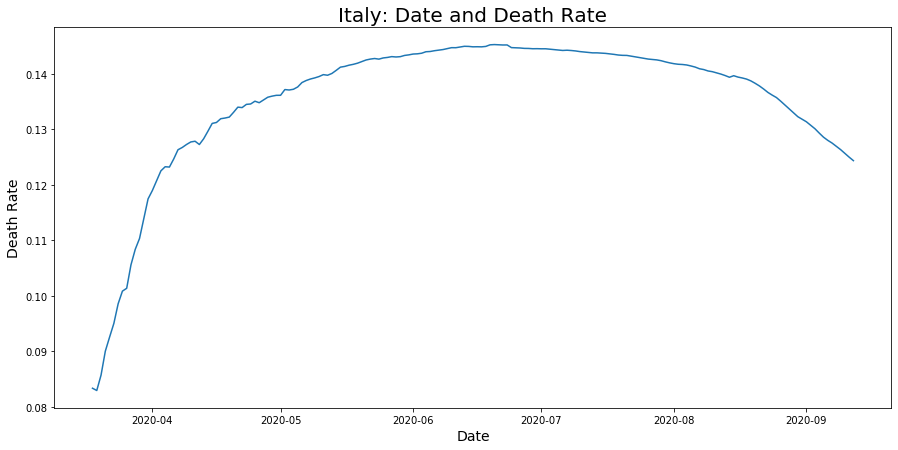

In [160]:
plt.figure(figsize=(15,7))
plt.plot(italy_new.index, italy_new.death_rate)
plt.title('Italy: Date and Death Rate',fontsize = 20)
plt.ylabel('Death Rate', fontsize = 14)
plt.xlabel('Date', fontsize = 14)


The death rate increased rapidly initially and started to flatten around May and then has started to decreased around August. 

In [161]:
#Polynomial Regression 

x = italy_new[['day_count']]
y = italy_new.death_rate

maxdeg = 30

training_error, validation_error = [],[]

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.8, random_state = 121)

#Run a for loop through the degrees of the polynomial, fit linear regression, predict y values and calculate the training and testing errors and update it to the list
for d in range(maxdeg):
    
    #Compute the polynomial features for the entire data, train data and validation data
    x_poly_train = PolynomialFeatures(d).fit_transform(x_train)
    x_poly_test = PolynomialFeatures(d).fit_transform(x_test)
    x_poly = PolynomialFeatures(d).fit_transform(x)

    lreg = LinearRegression()
    
    mse_score = cross_validate(lreg, x_poly, y, cv=10, scoring = "neg_mean_squared_error", return_train_score = True )
    
    train_score = (-np.mean(mse_score['train_score']))
    test_score = (-np.mean(mse_score['test_score']))

    #Compute the train and validation MSE
    training_error.append(train_score)
    validation_error.append(test_score)


In [162]:
#The best degree with the lowest validation error
min_mse = min(validation_error)
best_degree_it3 = validation_error.index(min_mse)

print("The best degree of the model using validation is",best_degree_it3, "with MSE=", (np.round(min_mse, 3)))


The best degree of the model using validation is 4 with MSE= 0.0


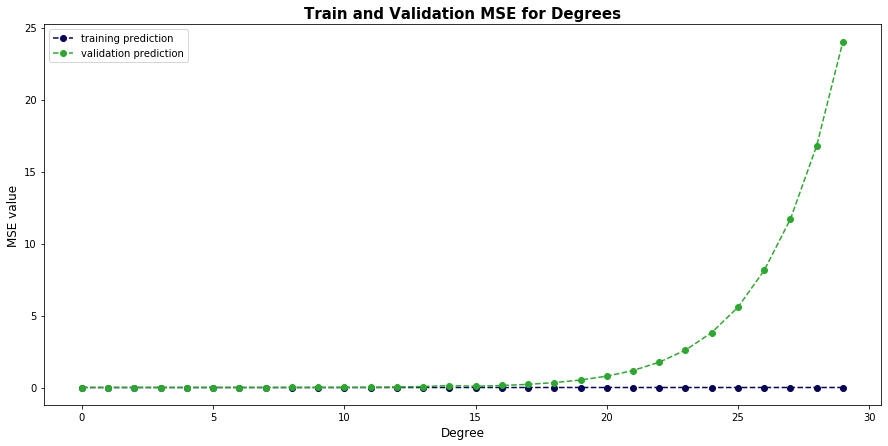

In [163]:
#plotting train vs validation MSE
plt.figure(figsize = (15, 7))
plt.plot(list(range(maxdeg)), training_error, marker = 'o', linestyle = 'dashed', color = "#060459", label = "training prediction")
plt.plot(list(range(maxdeg)), validation_error, marker = 'o', linestyle = 'dashed', color = "#2da82f", label = "validation prediction")
plt.xlabel("Degree", fontsize=12)
plt.ylabel("MSE value", fontsize=12)
plt.title("Train and Validation MSE for Degrees", fontweight="bold", fontsize=15)

plt.legend()

The model with the lowest MSE on the validation data is at degree 4. 

In [164]:
x_train_poly = PolynomialFeatures(best_degree_it3).fit_transform(x_train)
x_test_poly = PolynomialFeatures(best_degree_it3).fit_transform(x_test)

italy_model3 = LinearRegression()

italy_model3.fit(x_train_poly, y_train)

y_train_pred = italy_model3.predict(x_train_poly)
y_test_pred = italy_model3.predict(x_test_poly)

residuals_train = (y_train - y_train_pred)
residuals_test = (y_test - y_test_pred)

In [165]:
print("The best degree of the model using validation is",best_degree_it3, "with MSE=", np.round(min_mse,3))


The best degree of the model using validation is 4 with MSE= 0.0


In [166]:
idx_train = np.argsort(x_train, axis=0).day_count.values
idx_test = np.argsort(x_test, axis=0).day_count.values

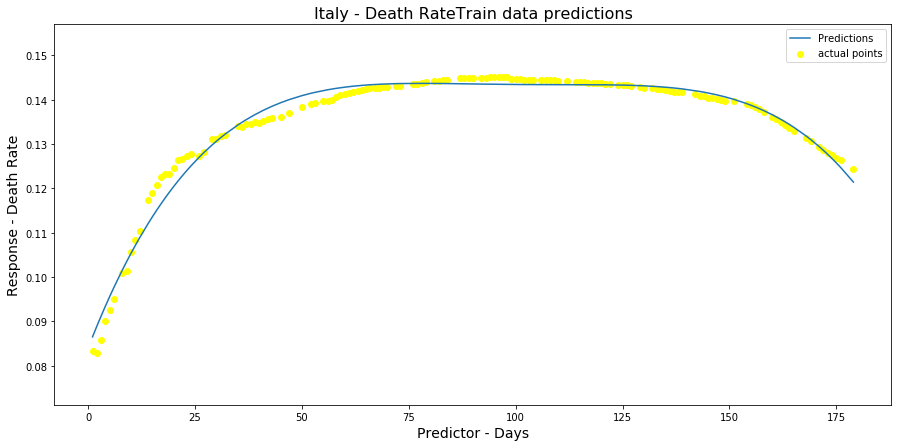

In [167]:
plt.figure(figsize = (15, 7))
plt.scatter(x_train, y_train, c = "yellow", label = "actual points")
plt.plot(x_train.iloc[idx_train].values, y_train_pred[idx_train], label = "Predictions")
plt.title("Italy - Death RateTrain data predictions", fontsize = 16)
plt.xlabel("Predictor - Days", fontsize = 14)
plt.ylabel("Response - Death Rate", fontsize = 14)
plt.legend()
plt.show()

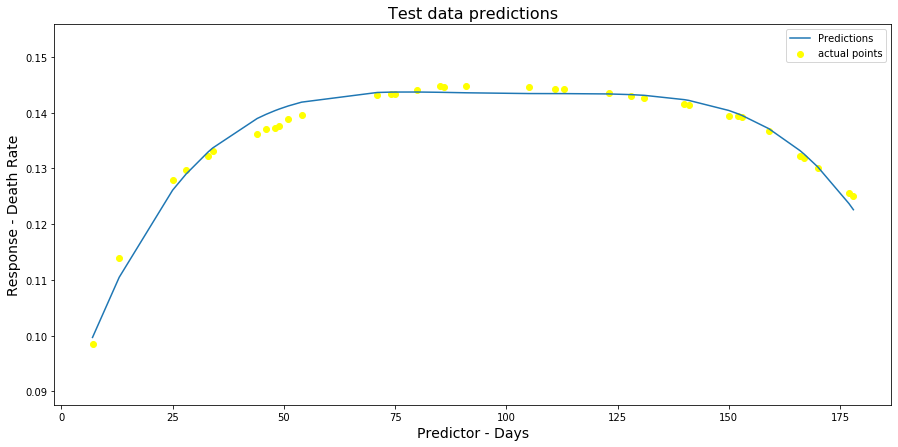

In [168]:
plt.figure(figsize = (15, 7))
plt.scatter(x_test, y_test, c = "yellow", label = "actual points")
plt.plot(x_test.iloc[idx_test].values, y_test_pred[idx_test], label = "Predictions")
plt.title("Test data predictions",fontsize = 16)
plt.xlabel("Predictor - Days",fontsize = 14)
plt.ylabel("Response - Death Rate", fontsize = 14)
plt.legend()
plt.show()

## India

Text(0.5, 0, 'Date')

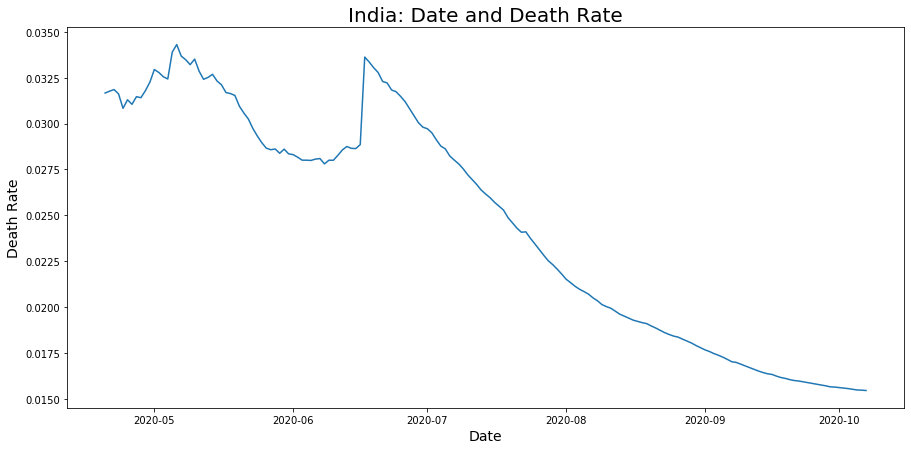

In [169]:
plt.figure(figsize=(15,7))
plt.plot(india_new.index, india_new.death_rate)
plt.title('India: Date and Death Rate',fontsize = 20)
plt.ylabel('Death Rate', fontsize = 14)
plt.xlabel('Date', fontsize = 14)

Increase and Decrease patterns in the death rate are visible until June, after which there is a sharp decrease. 

In [170]:
x = india_new[['day_count']]
y = india_new.death_rate

maxdeg = 30

training_error, validation_error = [],[]

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.8, random_state = 121)

#Run a for loop through the degrees of the polynomial, fit linear regression, predict y values and calculate the training and testing errors and update it to the list
for d in range(maxdeg):
    
    #Compute the polynomial features for the entire data, train data and validation data
    x_poly_train = PolynomialFeatures(d).fit_transform(x_train)
    x_poly_test = PolynomialFeatures(d).fit_transform(x_test)
    x_poly = PolynomialFeatures(d).fit_transform(x)

    lreg = LinearRegression()
    
    mse_score = cross_validate(lreg, x_poly, y, cv=10, scoring = "neg_mean_squared_error", return_train_score = True )
    
    train_score = (-np.mean(mse_score['train_score']))
    test_score = (-np.mean(mse_score['test_score']))

    #Compute the train and validation MSE
    training_error.append(train_score)
    validation_error.append(test_score)


In [171]:
#The best degree with the lowest validation error
min_mse = min(validation_error)
best_degree_ind3 = validation_error.index(min_mse)

print("The best degree of the model using validation is",best_degree_ind3, "with MSE=", (np.round(min_mse, 8)))


The best degree of the model using validation is 3 with MSE= 4.51e-06


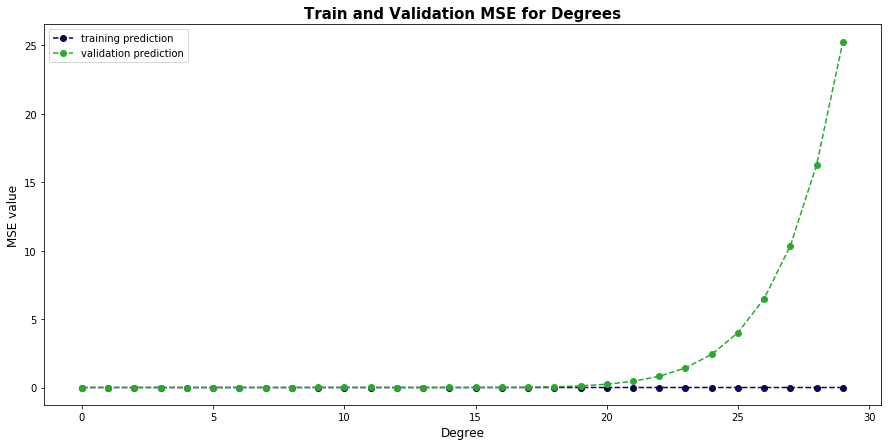

In [172]:
#plotting train vs validation MSE

plt.figure(figsize = (15, 7))
plt.plot(list(range(maxdeg)), training_error, marker = 'o', linestyle = 'dashed', color = "#060459", label = "training prediction")
plt.plot(list(range(maxdeg)), validation_error, marker = 'o', linestyle = 'dashed', color = "#2da82f", label = "validation prediction")
plt.xlabel("Degree", fontsize=12)
plt.ylabel("MSE value", fontsize=12)
plt.title("Train and Validation MSE for Degrees", fontweight="bold", fontsize=15)

plt.legend()

The model with the lowest MSE on the validation data is at degree 3. 

In [173]:
x_train_poly = PolynomialFeatures(best_degree_ind3).fit_transform(x_train)
x_test_poly = PolynomialFeatures(best_degree_ind3).fit_transform(x_test)

india_model3 = LinearRegression()

india_model3.fit(x_train_poly, y_train)

y_train_pred = india_model3.predict(x_train_poly)
y_test_pred = india_model3.predict(x_test_poly)

residuals_train = (y_train - y_train_pred)
residuals_test = (y_test - y_test_pred)

In [174]:
print("The best degree of the model using validation is",best_degree_ind3, "with MSE=", np.round(min_mse,8))


The best degree of the model using validation is 3 with MSE= 4.51e-06


In [175]:
idx_train = np.argsort(x_train, axis=0).day_count.values
idx_test = np.argsort(x_test, axis=0).day_count.values

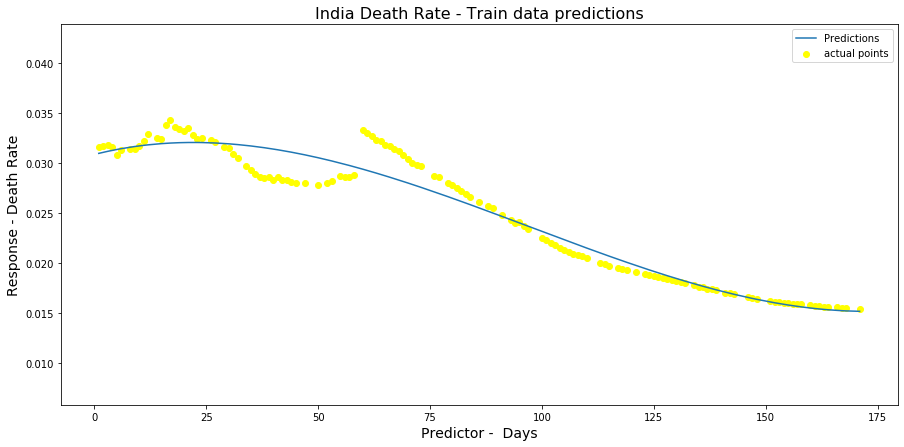

In [176]:
plt.figure(figsize = (15, 7))
plt.scatter(x_train, y_train, c = "yellow", label = "actual points")
plt.plot(x_train.iloc[idx_train].values, y_train_pred[idx_train], label = "Predictions")
plt.title("India Death Rate - Train data predictions", fontsize = 16)
plt.xlabel("Predictor -  Days", fontsize = 14)
plt.ylabel("Response - Death Rate", fontsize = 14)
plt.legend()
plt.show()

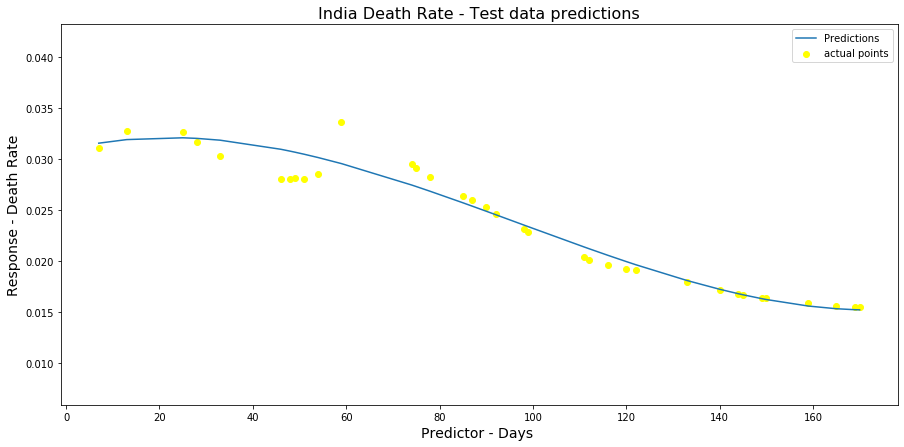

In [177]:
plt.figure(figsize = (15, 7))
plt.scatter(x_test, y_test, c = "yellow", label = "actual points")
plt.plot(x_test.iloc[idx_test].values, y_test_pred[idx_test], label = "Predictions")
plt.title("India Death Rate - Test data predictions", fontsize =16)
plt.xlabel("Predictor - Days ", fontsize = 14)
plt.ylabel("Response - Death Rate", fontsize = 14)
plt.legend()
plt.show()

## Brazil Predictions

In [178]:
x_test = brazil_new[['day_count']]

x_test_km3 = PolynomialFeatures(best_degree_km3).fit_transform(x_test)
x_test_itm3 = PolynomialFeatures(best_degree_it3).fit_transform(x_test)
x_test_indm3 = PolynomialFeatures(best_degree_ind3).fit_transform(x_test)

In [179]:
brazil_pred_korea3 = korea_model3.predict(x_test_km3)
brazil_pred_italy3 = italy_model3.predict(x_test_itm3)
brazil_pred_india3 = india_model3.predict(x_test_indm3)

Text(0.5, 1.0, 'Death Rates Across Models')

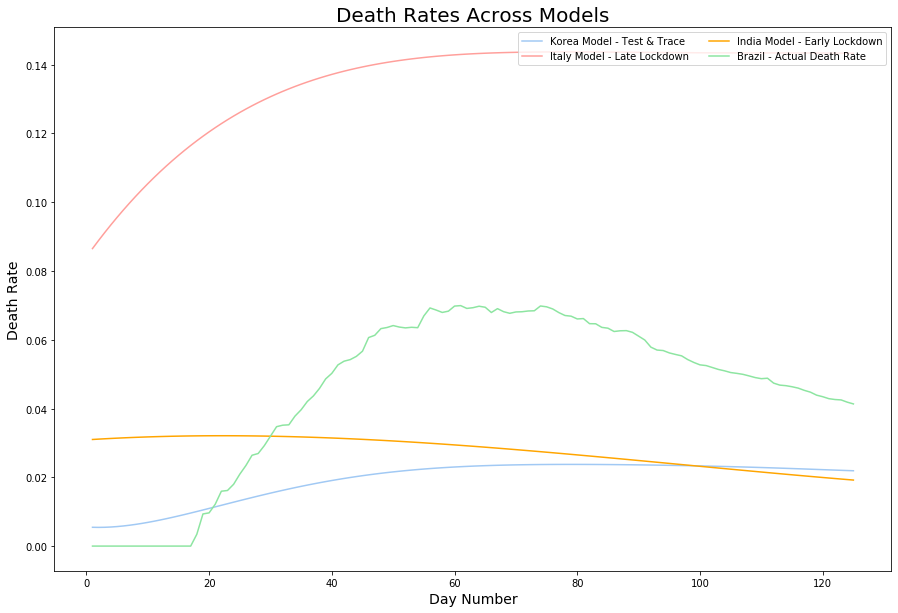

In [180]:
plt.figure(figsize=(15, 10))
plt.plot(brazil_new[['day_count']], brazil_pred_korea3, c='b', label= 'Korea Model - Test & Trace')
plt.plot(brazil_new[['day_count']], brazil_pred_italy3, c='r', label = 'Italy Model - Late Lockdown')
plt.plot(brazil_new[['day_count']], brazil_pred_india3, c='orange', label = 'India Model - Early Lockdown')
plt.plot(brazil_new[['day_count']], brazil_new[['death_rate']], c='g', label = 'Brazil - Actual Death Rate')

plt.legend(ncol=2, loc="upper right", frameon=True)
plt.ylabel('Death Rate', fontsize = 14)
plt.xlabel('Day Number', fontsize = 14)
plt.title('Death Rates Across Models',fontsize = 20)

**Findings:** When comparing the death rates across models, it is evident that the Italy model has the highest death rate, even higher than the actual death rate of Brazil. India and Korea seem to comparitively lower death rates. India started off with a high death rate and it graduallly decreased, while Korea started off with a low death rate and it gradually increased. Overall, based on low death rate, the Korean model seems to be the best. 


# 4. Predicting Rate of Decrease using Death Rate

## Korea

Korea strategy was close contact tracing through technology and quarantining inffected patients in government facilities. For most parts, the number of cases in Korea was increasing in single digits until sudden spike in the number of covid cases starting on Febuary 21st. This spike is attributed to Patient 31, who attened a religious event. The members of Shincheonji Church refused to co-operate with goverment officials. On 10th March, the Korean goverment was finally able to contact and test most of the Shincheonji Church members. 

Since Korea's close contact tracing was stably put together from March 10th, we index starting from that date to see how fast they were able to recover.

Refer: https://en.wikipedia.org/wiki/COVID-19_pandemic_in_South_Korea

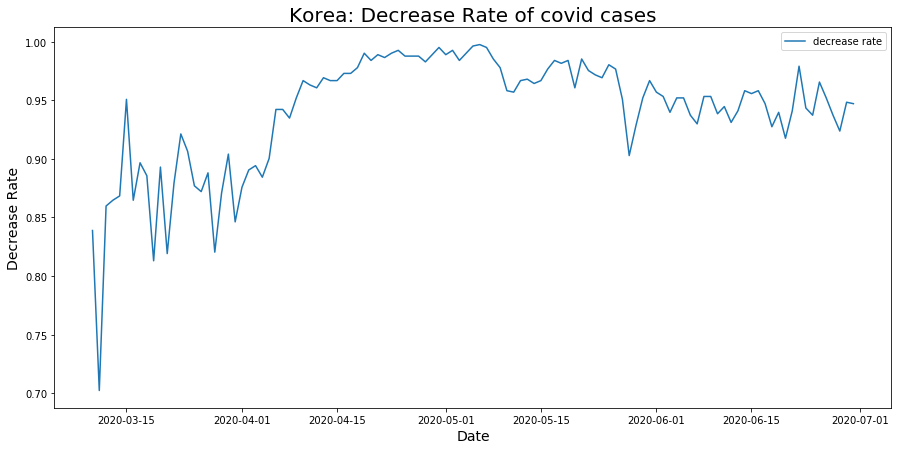

In [181]:
plt.figure(figsize=(15,7))
plt.plot(korea_strategy_analysis.date, korea_strategy_analysis.decrease_rate, label = "decrease rate")
plt.title('Korea: Decrease Rate of covid cases',fontsize = 20)
plt.ylabel('Decrease Rate', fontsize = 14)
plt.xlabel('Date', fontsize = 14)
plt.legend()

On 25th of march, we can see that the decrease rate is at 95% and continuous to increase showing a rapid decline in covid cases.

#### Finding best degree using cross validation

In [182]:
x = korea_strategy_analysis[['day_count']]
y = korea_strategy_analysis.decrease_rate

maxdeg = 30

training_error, validation_error = [],[]

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.8, random_state = 5)

#Run a for loop through the degrees of the polynomial, fit linear regression, predict y values and calculate the training and testing errors and update it to the list
for d in range(maxdeg):
    
    #Compute the polynomial features for the entire data, train data and validation data
    x_poly_train = PolynomialFeatures(d).fit_transform(x_train)
    x_poly_test = PolynomialFeatures(d).fit_transform(x_test)
    x_poly = PolynomialFeatures(d).fit_transform(x)

    lreg = LinearRegression()
    
    mse_score = cross_validate(lreg, x_poly, y, cv=10, scoring = "neg_mean_squared_error", return_train_score = True )
    
    train_score = (-np.mean(mse_score['train_score']))
    test_score = (-np.mean(mse_score['test_score']))

    #Compute the train and validation MSE
    training_error.append(train_score)
    validation_error.append(test_score)

In [183]:
min_mse = min(validation_error)
best_degree_sk = validation_error.index(min_mse)
print("The best degree of the model using validation is",best_degree_sk, "with MSE=", np.round(min_mse,8))

The best degree of the model using validation is 4 with MSE= 0.00107582


In [184]:
x_train_poly = PolynomialFeatures(best_degree_sk).fit_transform(x_train) #Take polynomial features
x_test_poly = PolynomialFeatures(best_degree_sk).fit_transform(x_test)
x_test_sk = x_test.copy() #to plot later

sk_lreg_model = LinearRegression()  #Fit the model

sk_lreg_model.fit(x_train_poly, y_train)

y_train_pred_sk = sk_lreg_model.predict(x_train_poly) #Predict the values
y_test_pred_sk = sk_lreg_model.predict(x_test_poly)

mse = mean_squared_error(y_test, y_test_pred_sk) #Evaluate

residuals_train = (y_train - y_train_pred_sk)
residuals_test = (y_test - y_test_pred_sk)

In [186]:
print("The best degree of the model using bootstrap is",best_degree_sk, "with MSE=", (np.round(mse, 8)))

The best degree of the model using bootstrap is 4 with MSE= 0.00023761


In [187]:
idx_train_sk = np.argsort(x_train, axis=0).day_count.values
idx_test_sk = np.argsort(x_test, axis=0).day_count.values

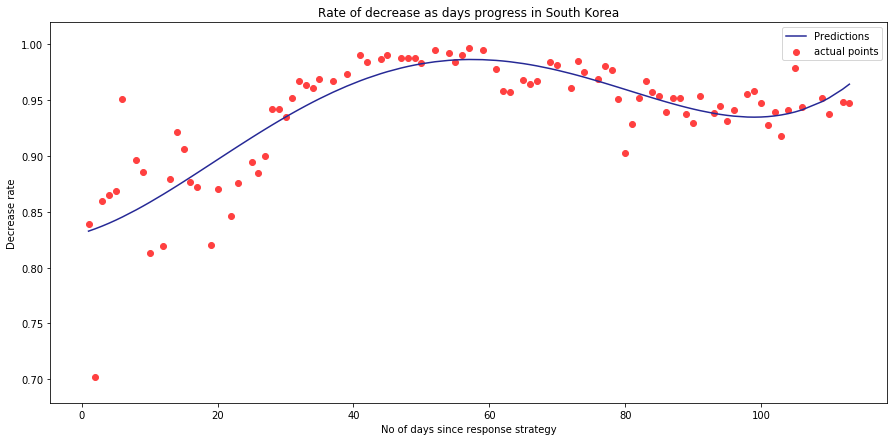

In [188]:
plt.figure(figsize = (15, 7))
plt.scatter(x_train, y_train, c = "#ff4040", label = "actual points")
plt.plot(x_train.iloc[idx_train_sk].values, y_train_pred_sk[idx_train_sk], c = "#262996", label = "Predictions")
plt.title("Rate of decrease as days progress in South Korea")
plt.xlabel("No of days since response strategy")
plt.ylabel("Decrease rate")
plt.legend()
plt.show()

**Findings:** On March 10th, which is the day one since we analyse, Korea has already achieved a 85% decrease in the number of covid cases since the highest number of one day cases recorded on Febuary 29th. We also observe that there is consistency in their strategy. On about 50 days from March 10th, that number goes up to over 97% and we don't notice and sudden steep drops which would indicate an increase in the number of cases.

## Italy

Italy implemented a late lockdown on the 9th of March when the country already had soring rise in covid19 cases. Italy suffered many deaths, but this is also mainly associated with the country's higher elderly population. We begin analysing from two weeks post lockdown to study it's effects, which is on 23rd March.

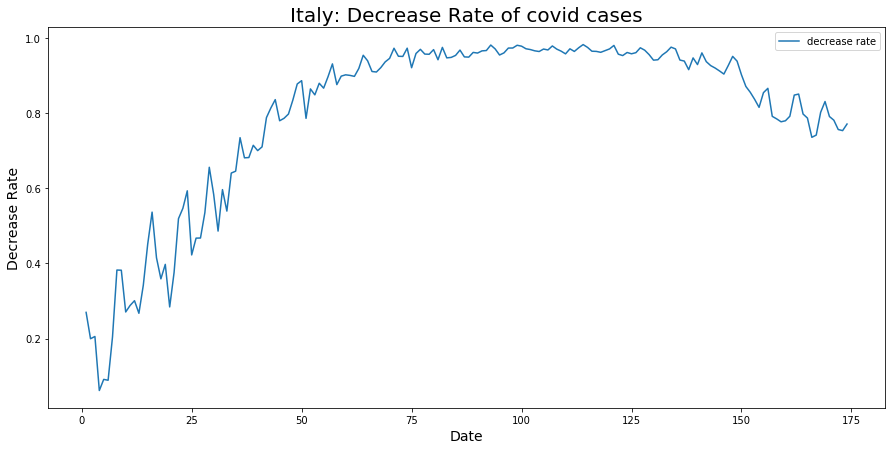

In [189]:
plt.figure(figsize=(15,7))
plt.plot(italy_strategy_analysis[['day_count']], italy_strategy_analysis.decrease_rate, label = "decrease rate")
plt.title('Italy: Decrease Rate of covid cases',fontsize = 20)
plt.ylabel('Decrease Rate', fontsize = 14)
plt.xlabel('Date', fontsize = 14)
plt.legend()

#### Finding best degree using cross validation

In [190]:
x = italy_strategy_analysis[['day_count']]
y = italy_strategy_analysis.decrease_rate

maxdeg = 30

training_error, validation_error = [],[]

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.8, random_state = 5)

#Run a for loop through the degrees of the polynomial, fit linear regression, predict y values and calculate the training and testing errors and update it to the list
for d in range(maxdeg):
    
    #Compute the polynomial features for the entire data, train data and validation data
    x_poly_train = PolynomialFeatures(d).fit_transform(x_train)
    x_poly_test = PolynomialFeatures(d).fit_transform(x_test)
    x_poly = PolynomialFeatures(d).fit_transform(x)

    lreg = LinearRegression()
    
    mse_score = cross_validate(lreg, x_poly, y, cv=10, scoring = "neg_mean_squared_error", return_train_score = True )
    
    train_score = (-np.mean(mse_score['train_score']))
    test_score = (-np.mean(mse_score['test_score']))

    #Compute the train and validation MSE
    training_error.append(train_score)
    validation_error.append(test_score)

In [191]:
min_mse = min(validation_error)
best_degree_it = validation_error.index(min_mse)
print("The best degree of the model using validation is",best_degree_it, "with MSE=", np.round(min_mse,8))

The best degree of the model using validation is 3 with MSE= 0.00310277


In [192]:
x_train_poly = PolynomialFeatures(best_degree_it).fit_transform(x_train) #Take polynomial features
x_test_poly = PolynomialFeatures(best_degree_it).fit_transform(x_test)
x_test_it = x_test.copy() #to plot later

italy_lreg_model = LinearRegression() #Polynomial model

italy_lreg_model.fit(x_train_poly, y_train) #fit the model

y_train_pred_it = italy_lreg_model.predict(x_train_poly) #Predict the values
y_test_pred_it = italy_lreg_model.predict(x_test_poly)

mse = mean_squared_error(y_test, y_test_pred_it) #evaluate

residuals_train = (y_train - y_train_pred_it)
residuals_test = (y_test - y_test_pred_it)

In [193]:
print("The best degree of the model using bootstrap is",best_degree_it, "with MSE=", (np.round(mse, 8)))

The best degree of the model using bootstrap is 3 with MSE= 0.00206558


In [194]:
idx_train_it = np.argsort(x_train, axis=0).day_count.values
idx_test_it = np.argsort(x_test, axis=0).day_count.values

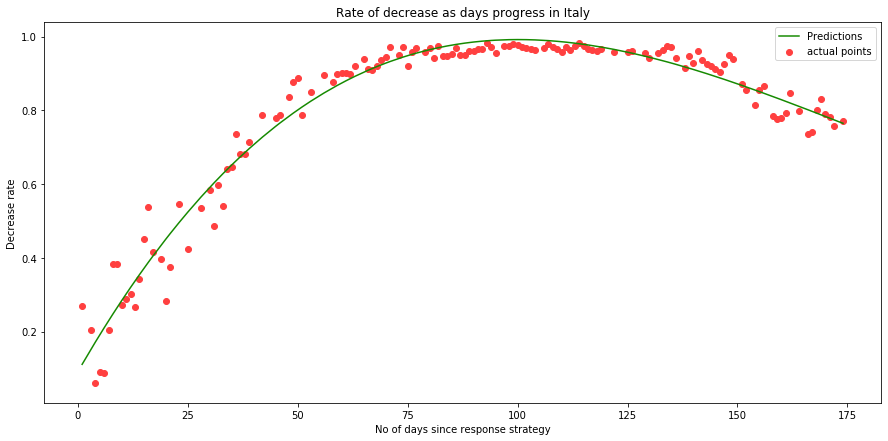

In [195]:
plt.figure(figsize = (15, 7))
plt.scatter(x_train, y_train, c = "#ff4040", label = "actual points")
plt.plot(x_train.iloc[idx_train_it].values, y_train_pred_it[idx_train_it], c = "#168a01", label = "Predictions")
plt.title("Rate of decrease as days progress in Italy")
plt.xlabel("No of days since response strategy")
plt.ylabel("Decrease rate")
plt.legend()
plt.show()

**Findings:** Two weeks after imposing lockdown, we see that on 23rd March Italy has managed to decrease the number of cases by 20% of the highest number of daily cases. A gradual upward curve shows that there is a steady decline in the number of cases recorded. 60 days since lockdown, we see that the number of covid cases recorded is down by 95% and the results are consistent with no dramatic drop.

## India

In [196]:
x = india_strategy_analysis[['day_count']]
y = india_strategy_analysis.decrease_rate

maxdeg = 30

training_error, validation_error = [],[]

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.8, random_state = 5)

#Run a for loop through the degrees of the polynomial, fit linear regression, predict y values and calculate the training and testing errors and update it to the list
for d in range(maxdeg):
    
    #Compute the polynomial features for the entire data, train data and validation data
    x_poly_train = PolynomialFeatures(d).fit_transform(x_train)
    x_poly_test = PolynomialFeatures(d).fit_transform(x_test)
    x_poly = PolynomialFeatures(d).fit_transform(x)

    lreg = LinearRegression()
    
    mse_score = cross_validate(lreg, x_poly, y, cv=10, scoring = "neg_mean_squared_error", return_train_score = True )
    
    train_score = (-np.mean(mse_score['train_score']))
    test_score = (-np.mean(mse_score['test_score']))

    #Compute the train and validation MSE
    training_error.append(train_score)
    validation_error.append(test_score)

In [197]:
min_mse = min(validation_error)
best_degree_in = validation_error.index(min_mse)
print("The best degree of the model using validation is",best_degree_in, "with MSE=", np.round(min_mse,8))

The best degree of the model using validation is 5 with MSE= 0.00749456


In [198]:
x_train_poly = PolynomialFeatures(best_degree_in).fit_transform(x_train) #Take polynomial features
x_test_poly = PolynomialFeatures(best_degree_in).fit_transform(x_test)
x_test_in = x_test.copy() #to plot lates

india_model_cases = LinearRegression()

india_model_cases.fit(x_train_poly, y_train) #Fit the mmodel

y_train_pred_in = india_model_cases.predict(x_train_poly) #Predict the model
y_test_pred_in = india_model_cases.predict(x_test_poly)

mse = mean_squared_error(y_test, y_test_pred_in) #Evaluate

residuals_train = (y_train - y_train_pred_in)
residuals_test = (y_test - y_test_pred_in)

In [199]:
print("The best degree of the model using bootstrap is",best_degree_in, "with MSE=", (np.round(mse, 8)))

The best degree of the model using bootstrap is 5 with MSE= 0.00205163


In [200]:
idx_train_in = np.argsort(x_train, axis=0).day_count.values
idx_test_in = np.argsort(x_test, axis=0).day_count.values

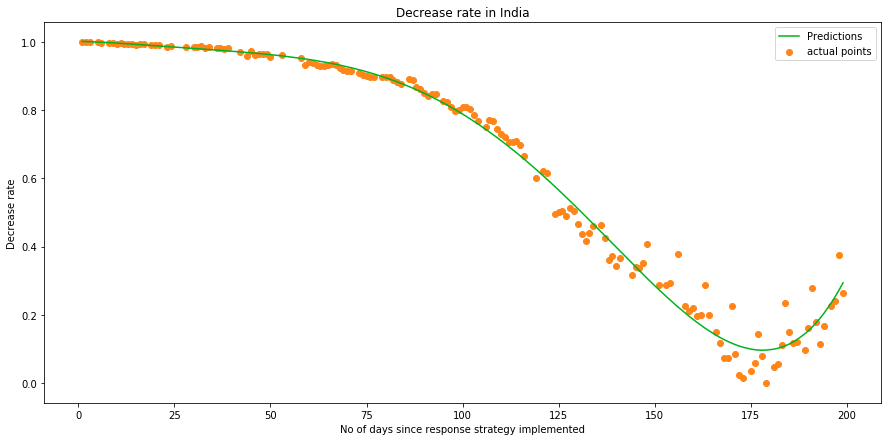

In [201]:
plt.figure(figsize = (15, 7))
plt.scatter(x_train, y_train, c = "#ff8519", label = "actual points")
plt.plot(x_train.iloc[idx_train_in].values, y_train_pred_in[idx_train_in], c = "#00b31e", label = "Predictions")
plt.title("Decrease rate in India")
plt.xlabel("No of days since response strategy implemented")
plt.ylabel("Decrease rate")
plt.legend()
plt.show()

It is important to note that unlike Korea and Brazil, India hit it's worst case after implementing it's response strategy. We can observe that by how the curve is bending down and approching worst hit day, around september. It's worth noting that although lockdown helped contain cases initially, it fails to be a consistent solution when implemented in its own. As soon as the lockdown is released, the cases begin to surge.

## Brazil

In [202]:
x = brazil_strategy_analysis[['day_count']]
y = brazil_strategy_analysis.decrease_rate

maxdeg = 30

training_error, validation_error = [],[]

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.8, random_state = 5)

#Run a for loop through the degrees of the polynomial, fit linear regression, predict y values and calculate the training and testing errors and update it to the list
for d in range(maxdeg):
    
    #Compute the polynomial features for the entire data, train data and validation data
    x_poly_train = PolynomialFeatures(d).fit_transform(x_train)
    x_poly_test = PolynomialFeatures(d).fit_transform(x_test)
    x_poly = PolynomialFeatures(d).fit_transform(x)

    lreg = LinearRegression()
    
    mse_score = cross_validate(lreg, x_poly, y, cv=10, scoring = "neg_mean_squared_error", return_train_score = True )
    
    train_score = (-np.mean(mse_score['train_score']))
    test_score = (-np.mean(mse_score['test_score']))

    #Compute the train and validation MSE
    training_error.append(train_score)
    validation_error.append(test_score)

In [203]:
min_mse = min(validation_error)
best_degree_br = validation_error.index(min_mse)
print("The best degree of the model using validation is",best_degree_br, "with MSE=", np.round(min_mse,8))

The best degree of the model using validation is 7 with MSE= 0.01871117


In [204]:
x_train_poly = PolynomialFeatures(best_degree_br).fit_transform(x_train) #Take polynomial features
x_test_poly = PolynomialFeatures(best_degree_br).fit_transform(x_test)

brazil_lreg_model = LinearRegression() #Polynomial model

brazil_lreg_model.fit(x_train_poly, y_train) #Fit the model

y_train_pred_br = brazil_lreg_model.predict(x_train_poly) #Predict the model
y_test_pred_br = brazil_lreg_model.predict(x_test_poly)

residuals_train = (y_train - y_train_pred_br)
residuals_test = (y_test - y_test_pred_br)

In [205]:
x_test_br = x_test.copy()#to plot later

In [206]:
mse = mean_squared_error(y_test, y_test_pred_br) #Evaluate the model

In [207]:
print("The best degree of the model using bootstrap is",best_degree_br, "with MSE=", (np.round(mse, 8)))

The best degree of the model using bootstrap is 7 with MSE= 0.01107393


In [208]:
idx_train_br = np.argsort(x_train, axis=0).day_count.values
idx_test_br = np.argsort(x_test, axis=0).day_count.values

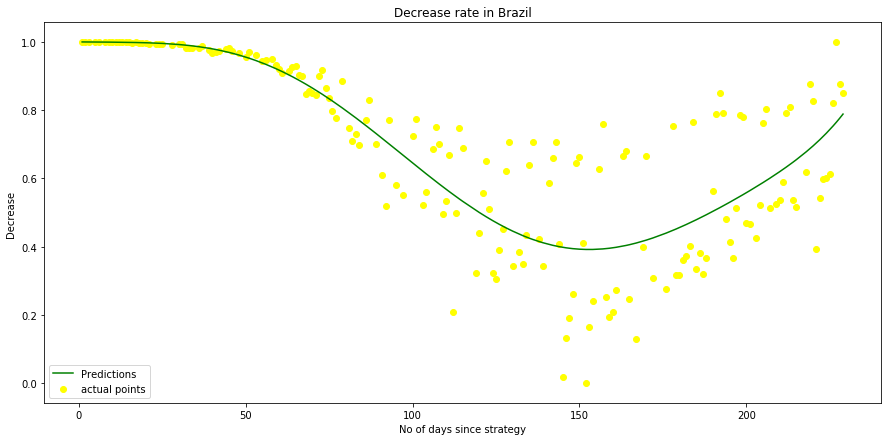

In [209]:
plt.figure(figsize = (15, 7))
plt.scatter(x_train, y_train, c = "yellow", label = "actual points")
plt.plot(x_train.iloc[idx_train_br].values, y_train_pred_br[idx_train_br], c = 'green', label = "Predictions")
plt.title("Decrease rate in Brazil")
plt.xlabel("No of days since strategy")
plt.ylabel("Decrease ")
plt.legend()
plt.show()

Brazil is modelled from day 1. We notice that there isn't any consistency and the curve decreases and increases but again begins to decrease.

## Comparison of Models

**What to look for:** <br>
1) We care if the curve progresses upward. Higher the decrease rate, lower the daily cases recorded.

2) We care how fast the curve trends upwards, this show how soon they were able to get results from the strategy.

#### Decrease rate of India

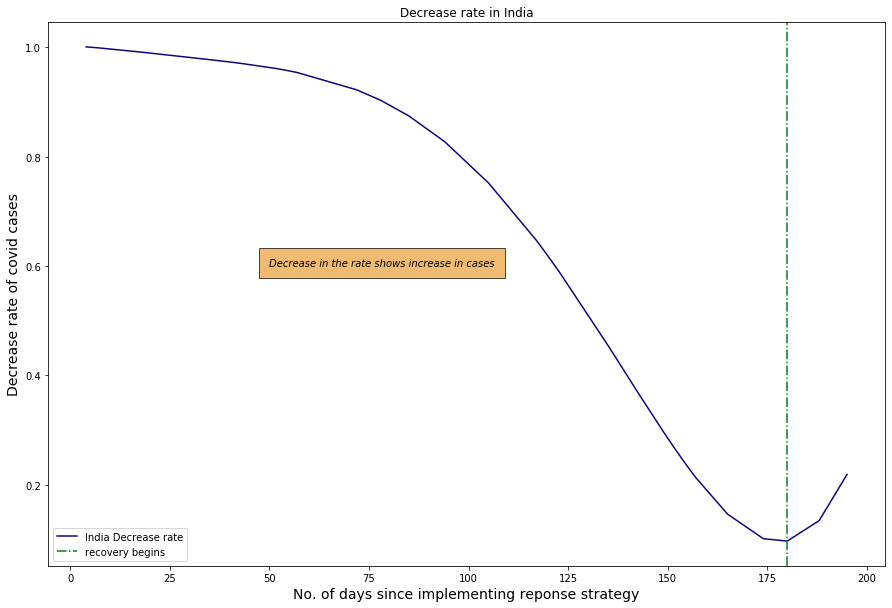

In [210]:
plt.figure(figsize=(15, 10))
plt.plot(x_test_in.iloc[idx_test_in].values, y_test_pred_in[idx_test_in], color = "#10047a", linestyle = '-', label = "India Decrease rate")
plt.text(50, 0.6, 'Decrease in the rate shows increase in cases', style='italic',
        bbox={'facecolor': '#eb9e34', 'alpha': 0.7, 'pad': 10})
plt.axvline(x=180, linestyle = '-.', color = "#008216", label = "recovery begins")
plt.title("Decrease rate in India")
plt.ylabel('Decrease rate of covid cases', fontsize = 14)
plt.xlabel('No. of days since implementing reponse strategy', fontsize = 14)
plt.legend(loc="lower left")

There is an increase in the number of cases in india since lifting lockdown. Initially lockdown works, but after lifting the cases seems to peek again

#### Decrease rate in Korea

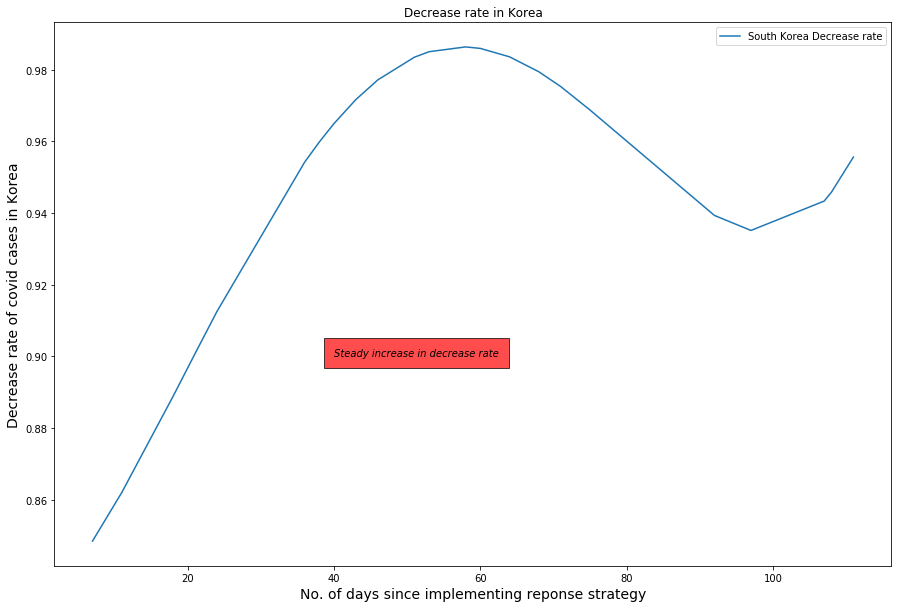

In [211]:
plt.figure(figsize=(15, 10))
plt.plot(x_test_sk.iloc[idx_test_sk].values, y_test_pred_sk[idx_test_sk], label = "South Korea Decrease rate")
plt.text(40, 0.90, 'Steady increase in decrease rate', style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.7, 'pad': 10})
#plt.axvline(x=180, linestyle = '-.', color = "#008216")
plt.title("Decrease rate in Korea")
plt.ylabel('Decrease rate of covid cases in Korea', fontsize = 14)
plt.xlabel('No. of days since implementing reponse strategy', fontsize = 14)
plt.legend(loc="best")

Since Korea started implementing close contact tracing since day one, we see that as of 10th march they already achieve a 86% decrease rate and the rate varies from 86% to 98% which is great

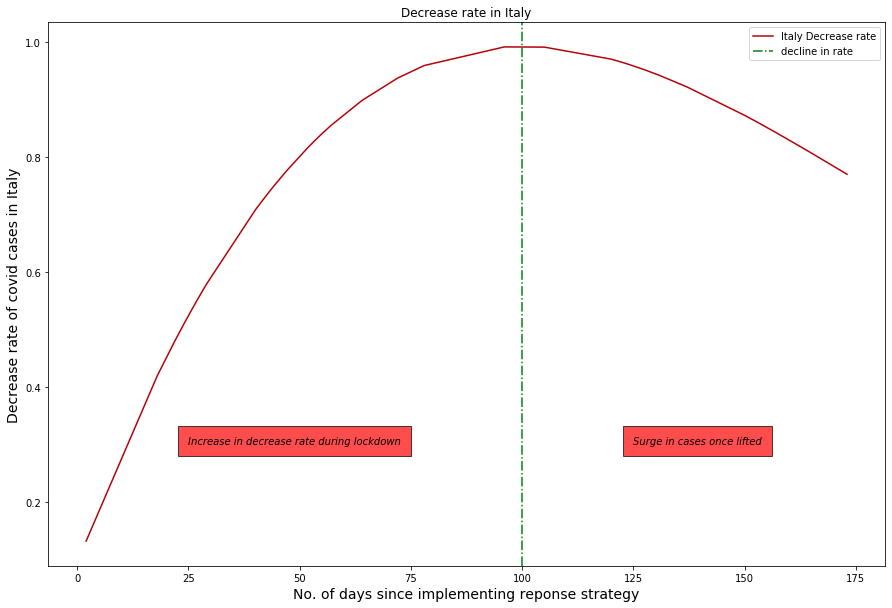

In [212]:
plt.figure(figsize=(15, 10))
plt.plot(x_test_it.iloc[idx_test_it].values, y_test_pred_it[idx_test_it], color = "#b30208", label = "Italy Decrease rate")
plt.text(25, 0.3, 'Increase in decrease rate during lockdown', style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.7, 'pad': 10})
plt.text(125, 0.3, 'Surge in cases once lifted', style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.7, 'pad': 10})
plt.axvline(x=100, linestyle = '-.', color = "#008216", label = "decline in rate")
plt.title("Decrease rate in Italy")
plt.ylabel('Decrease rate of covid cases in Italy', fontsize = 14)
plt.xlabel('No. of days since implementing reponse strategy', fontsize = 14)
plt.legend(loc="best")

The lockdown in Italy is initially successful with 20% decrease in just two weeks since lockdown, but the cases peak again ones it's lifted. It is clear that lockdown is effective in delaying the virus but it is not a concrete solution when implemented on it's own.

Decrease rate gives us very important information on the robustness of the solution. South Korea has the most consistent solution. Even though India and Italy implemented lockdown, it looks like Italy enforced it much better. India has downward drooping inconsistent curve even though it implement lockdown too. This is shows that either it wasn't the right choice of solution or that it was poorly implemented.

# Conclusion

To summarize, based on our analysis we propose a two phase solution for brazil. Keeping in mind that a solution is only as good as how well it's enforced and the amount of resources and time required to pull of a successful strategy we phase the response in two phases for ease of implementation. 

**Phase 1:** Around the 30th of march we see a spike in the number of deaths in Brazil. Implementing an early lockdown will delay the spread of virus. We propose that Brazil implement lockdown on 30th of March for 30 days until 29th of April. We observed in India's model that implementing the lockdown slowed down the spread. However, it's also important to note that lockdown is not a consistent solution. We notice a reoccuring spike in both Italy and India once they released the lockdown. In order to combat the temporary effects of lockdown, we combine it with a much more consistent solution. This will give Brazil time to prepare itself for phase two response - Close Contact Tracing. 

**Phase 2:** During the month long lockdown, we expect brazil to be fully prepared to enforce close contact tracing. After this, we will allow the people to relieve their pandemic fatigue from the lockdown and help continuation of the economy while rapdily testing and tracing cases. This will prevent a spike in cases once the lockdown is lifted and it will also significantly reduce the number of cases and deaths in Brazil. When we analysed Korea's data, we discovered that close contact tracing is the most consistent of all solution.

**In case of sudden increase (which we expect almost definitely from brazil)**: Covid responses work well when they are enforced well. However, there are many uncertainities that we cannot control and we most definitely cannot predict with a machine learning model. In the unfortunate event that there is a sudden spike due to unforeseen reasons, we advice Brazil to implement an emergency lockdown and contact trace the source of spike before lifting again. 


In [213]:
lives_saved = pd.concat([-day_wise['brazil_actual_deaths'][:29], day_wise['india_lives_saved'][30:61], day_wise['korea_lives_saved'][61:]], axis = 0)

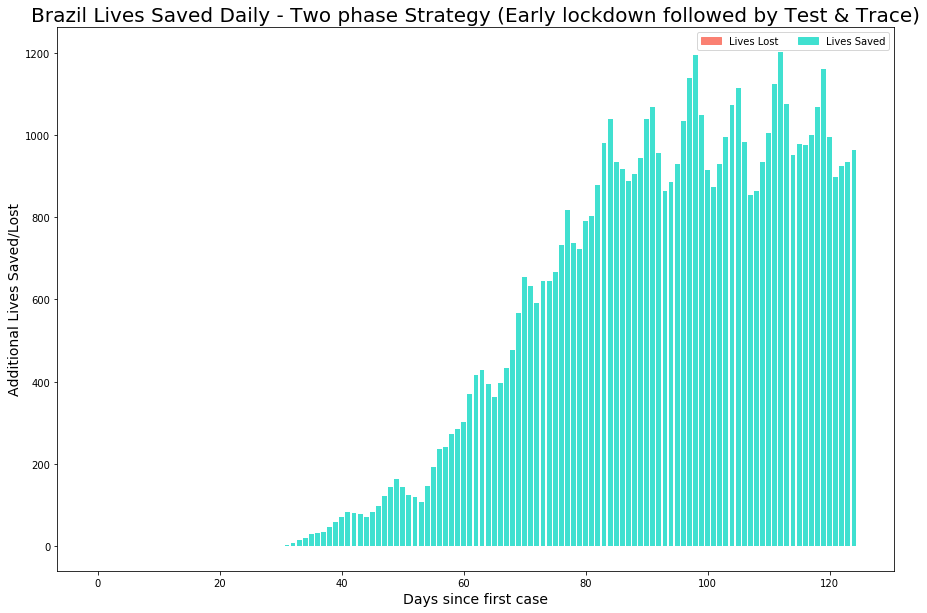

In [214]:
plt.figure(figsize=(15, 10))
plt.bar(lives_saved.index, lives_saved, color=bar_color(lives_saved,'turquoise','salmon') )
plt.ylabel('Additional Lives Saved/Lost', fontsize = 14)
plt.xlabel('Days since first case', fontsize = 14)
plt.title('Brazil Lives Saved Daily - Two phase Strategy (Early lockdown followed by Test & Trace)',fontsize = 20)
red_patch = mpatches.Patch(color='salmon', label='Lives Lost')
blue_patch = mpatches.Patch(color='turquoise', label='Lives Saved')
plt.legend(handles=[red_patch, blue_patch], ncol=2, loc="upper right", frameon=True)